In [1]:
!pip install git+https://github.com/jensengroup/UQ_validation_methods


  Cloning https://github.com/jensengroup/UQ_validation_methods to /tmp/pip-req-build-8e_2bgwi
  Running command git clone --filter=blob:none --quiet https://github.com/jensengroup/UQ_validation_methods /tmp/pip-req-build-8e_2bgwi
  Resolved https://github.com/jensengroup/UQ_validation_methods to commit 984730d26b9ddd5f900ff9fe390363686632d4a2
  Preparing metadata (setup.py) ... done
  Created wheel for UQ_validation_methods: filename=UQ_validation_methods-0.0.0-py3-none-any.whl size=4848 sha256=1fed68be769128bcb8f88f3fea498dcbca78d52543a0bcb2f153a69c684d207c
  Stored in directory: /tmp/pip-ephem-wheel-cache-qcvbhnu3/wheels/90/b4/6c/a81a9b55bf789b1a05ef96e1973c7c1f4b8c4ce0ad76ddf399
Successfully built UQ_validation_methods


In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from UQtools import get_slope_metric, spearman_rank_corr, calibration_curve, calibration_area, NLL
from UQtools import order_sig_and_errors, get_slope_metric, spearman_rank_corr, expected_rho, calibration_curve, calibration_area, plot_calibration_curve, plot_Z_scores, NLL




In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Colab Notebooks/moldais/'



Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/moldais


In [49]:

def get_UQ(dfi):
  df = pd.DataFrame()
  df['target']  = dfi['target']
  df['uq']      = dfi['std']
  df['y_pred']  = dfi['predicted']
  df['error']   = dfi['predicted'] - df['target']

  #Order uncertainties and errors according to uncertainties
  ordered_df = order_sig_and_errors(df.uq, df.error)

  #calculate rho_rank
  rho_rank, _ = spearman_rank_corr(np.abs(df.error), df.uq)
  print(f'rho_rank = {rho_rank:.2f}')

  #Calculate the miscalibration area
  gaus_pred, errors_observed = calibration_curve(ordered_df.abs_z)
  mis_cal = calibration_area(errors_observed, gaus_pred)
  print(f'miscalibration area = {mis_cal:.2f}')


  #generate error-based calibration plot
  fig, slope, R_sq, intercept = get_slope_metric(ordered_df.uq, ordered_df.errors, Nbins=25)
  del fig
  return R_sq, rho_rank, rho_rank_sim, mis_cal, _NLL, NLL_sim, slope, intercept

Processing: Lipophilicity | BOS_Str | run 0
rho_rank = 0.14
miscalibration area = 0.13
R squared: 0.542562531515266
intercept: 0.39494698981262766
slope: 0.9210882549380066



Processing: Lipophilicity | BOS_Str | run 1
rho_rank = 0.12
miscalibration area = 0.20
R squared: 0.5365740699707947
intercept: 0.4595365648763253
slope: 1.0984387574342815



Processing: Lipophilicity | BOS_Str | run 2
rho_rank = 0.16
miscalibration area = 0.11
R squared: 0.7827961331879568
intercept: 0.2698479010658813
slope: 1.0313028164903675



Processing: Lipophilicity | BOS_Str | run 3
rho_rank = 0.13
miscalibration area = 0.14
R squared: 0.6976405331164421
intercept: 0.2436256318911738
slope: 1.1923636481683584



Processing: Lipophilicity | BOS_Str | run 4
rho_rank = 0.18
miscalibration area = 0.12
R squared: 0.7653903670409506
intercept: 0.3448438379413491
slope: 0.9365964110281828



Processing: Lipophilicity | BOS_Str | run 5
rho_rank = 0.14
miscalibration area = 0.13
R squared: 0.7243872162952808
int

/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.13
R squared: 0.7621914104880358
intercept: 0.43875494923141023
slope: 0.7532555761303329



Processing: Lipophilicity | MolDAIS_SAAS | run 4
rho_rank = 0.11
miscalibration area = 0.25
R squared: 0.6729335929371636
intercept: 0.5781641692451018
slope: 0.721512905803743



Processing: Lipophilicity | MolDAIS_SAAS | run 5
rho_rank = 0.17
miscalibration area = 0.11
R squared: 0.7802758551256409
intercept: 0.40035126931118076
slope: 0.702887829505147



Processing: Lipophilicity | MolDAIS_SAAS | run 6
rho_rank = 0.22
miscalibration area = 0.08
R squared: 0.8815311134595086
intercept: 0.35686969150527037
slope: 0.7078768125534629



Processing: Lipophilicity | MolDAIS_SAAS | run 7
rho_rank = 0.19
miscalibration area = 0.15
R squared: 0.6558705014459518
intercept: 0.5265593904982185
slope: 0.5643228111810485



Processing: Lipophilicity | MolDAIS_SAAS | run 8
rho_rank = 0.19


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.21
R squared: 0.9159926544162958
intercept: 0.34935481512828664
slope: 1.1473642779603213



Processing: Lipophilicity | MolDAIS_SAAS | run 9
rho_rank = 0.21
miscalibration area = 0.12
R squared: 0.7880033044818546
intercept: 0.32748869613746423
slope: 0.9183734616303539



Processing: Lipophilicity | Mord_Mat | run 0
rho_rank = 0.03
miscalibration area = 0.18
R squared: 0.06526199374654895
intercept: -3.0009070054466704
slope: 5.939483476887628



Processing: Lipophilicity | Mord_Mat | run 1
rho_rank = 0.02


/usr/local/lib/python3.11/dist-packages/UQtools.py:206: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 5))


miscalibration area = 0.17
R squared: 0.07152692481855116
intercept: -12.141062242481572
slope: 18.89926860056076



Processing: Lipophilicity | Mord_Mat | run 2
rho_rank = 0.03
miscalibration area = 0.18
R squared: 0.014610290462915065
intercept: -0.3795285668150854
slope: 2.2339212298172826



Processing: Lipophilicity | Mord_Mat | run 3
rho_rank = 0.03


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.17
R squared: 0.02003749875830374
intercept: -1.267331043850448
slope: 3.508122795109309



Processing: Lipophilicity | Mord_Mat | run 4
rho_rank = 0.04
miscalibration area = 0.18
R squared: 0.019322052697161918
intercept: -1.3164050092919677
slope: 3.568982092752459



Processing: Lipophilicity | Mord_Mat | run 5
rho_rank = 0.04
miscalibration area = 0.18
R squared: 0.051761841128354025
intercept: -3.713771965526295
slope: 6.949915738163572



Processing: Lipophilicity | Mord_Mat | run 6
rho_rank = 0.03
miscalibration area = 0.17
R squared: 1.5989313141506756e-05
intercept: 1.299647390097322
slope: -0.13092967771808423



Processing: Lipophilicity | Mord_Mat | run 7
rho_rank = 0.02
miscalibration area = 0.18
R squared: 0.019385947674816495
intercept: 3.9216827085052928
slope: -3.8562491547806315



Processing: Lipophilicity | Mord_Mat | run 8
rho_rank = 0.01
miscalibration area = 0.17
R squared: 0.13434536211999337
intercept: -7.606351710810337
slope: 12.470039

/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.17
R squared: 0.020074036501055215
intercept: -1.275354895506102
slope: 3.519470673926395



Processing: Lipophilicity | Mord_Mat_PCA | run 4
rho_rank = 0.04
miscalibration area = 0.18
R squared: 0.019312571152926505
intercept: -1.2879227216261993
slope: 3.5287004993894695



Processing: Lipophilicity | Mord_Mat_PCA | run 5
rho_rank = 0.04
miscalibration area = 0.18
R squared: 0.05187265303288702
intercept: -3.637119513695251
slope: 6.841508607555881



Processing: Lipophilicity | Mord_Mat_PCA | run 6
rho_rank = 0.03
miscalibration area = 0.17
R squared: 8.780344292524944e-06
intercept: 1.2728644426562694
slope: -0.09305140491735489



Processing: Lipophilicity | Mord_Mat_PCA | run 7
rho_rank = 0.02
miscalibration area = 0.18
R squared: 0.019979804967770742
intercept: 3.781437713467987
slope: -3.65790511979369



Processing: Lipophilicity | Mord_Mat_PCA | run 8
rho_rank = 0.01
miscalibration area = 0.17
R squared: 0.13548980871703487
intercept: -7.53554506489427

/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.20
R squared: 0.6338814929813382
intercept: 0.01390496562374599
slope: 1.9976937658371632



Processing: ESOL | BOS_Str | run 2
rho_rank = 0.21
miscalibration area = 0.18
R squared: 0.5736586766111254
intercept: -0.0006258663115399354
slope: 2.0653025981082656



Processing: ESOL | BOS_Str | run 3
rho_rank = 0.10


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.17
R squared: 0.3005635135770225
intercept: 0.609512567422804
slope: 0.9281117660343373



Processing: ESOL | BOS_Str | run 4
rho_rank = 0.10
miscalibration area = 0.18
R squared: 0.38528051642953465
intercept: 0.5507666520367406
slope: 1.1563051488865612



Processing: ESOL | BOS_Str | run 5
rho_rank = 0.11
miscalibration area = 0.17
R squared: 0.5497430266073227
intercept: 0.6302305725930042
slope: 0.8414258206203644



Processing: ESOL | BOS_Str | run 6
rho_rank = 0.14
miscalibration area = 0.20
R squared: 0.4720004168298335
intercept: 0.5613064307611985
slope: 1.1574692860343792



Processing: ESOL | BOS_Str | run 7
rho_rank = 0.08


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.18
R squared: 0.23325252382492057
intercept: 0.9119307299127839
slope: 0.6256882107799305



Processing: ESOL | BOS_Str | run 8
rho_rank = 0.23


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.24
R squared: 0.745939252569892
intercept: 0.27683587475759963
slope: 1.7657324647153423



Processing: ESOL | BOS_Str | run 9
rho_rank = 0.17
miscalibration area = 0.18
R squared: 0.5034248819426399
intercept: 0.4217505868508714
slope: 1.2331546508799085



Processing: ESOL | MolDAIS_SAAS | run 0
rho_rank = 0.35
miscalibration area = 0.09
R squared: 0.6848496062313283
intercept: 0.4813476071829938
slope: 0.5052572443083154



Processing: ESOL | MolDAIS_SAAS | run 1
rho_rank = 0.31
miscalibration area = 0.11
R squared: 0.4574260256040076
intercept: 0.5728447068045363
slope: 0.3870906951292314



Processing: ESOL | MolDAIS_SAAS | run 2
rho_rank = 0.41
miscalibration area = 0.02
R squared: 0.8362718661203364
intercept: 0.4841288985657266
slope: 0.39408303962059393



Processing: ESOL | MolDAIS_SAAS | run 3
rho_rank = 0.16
miscalibration area = 0.16
R squared: 0.2697009189718491
intercept: 0.6792467598393361
slope: 0.3380344703590218



Processing: ESOL | MolDAIS_S

/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.29
R squared: 0.02995088999554596
intercept: 59.234255938482555
slope: -80.87196792951296



Processing: ESOL | Mord_Mat | run 3
rho_rank = -0.05
miscalibration area = 0.29
R squared: 0.22312190276941446
intercept: 255835.483188889
slope: -361817.1408302417



Processing: ESOL | Mord_Mat | run 4
rho_rank = 0.00


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.29
R squared: 0.044295399778091604
intercept: 61.07718881683158
slope: -83.43637466318042



Processing: ESOL | Mord_Mat | run 5
rho_rank = -0.04
miscalibration area = 0.29
R squared: 0.0487186216018356
intercept: 55.76227063288093
slope: -75.97465799279482



Processing: ESOL | Mord_Mat | run 6
rho_rank = -0.08


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.30
R squared: 0.04282183111905136
intercept: 27.496515078689303
slope: -35.942644710789004



Processing: ESOL | Mord_Mat | run 7
rho_rank = -0.08


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.29
R squared: 0.20308193729438895
intercept: 69.35893277257821
slope: -95.19089187651218



Processing: ESOL | Mord_Mat | run 8
rho_rank = -0.07
miscalibration area = 0.30
R squared: 0.0006932901939320502
intercept: 9.263473076349714
slope: -10.144606039534223



Processing: ESOL | Mord_Mat | run 9
rho_rank = -0.03


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.29
R squared: 0.2012036168766521
intercept: 139.36411136343287
slope: -194.20168333777247



Processing: ESOL | Mord_Mat_PCA | run 0
rho_rank = 0.01
miscalibration area = 0.29
R squared: 0.0933664174688823
intercept: 37.82997639514105
slope: -50.59738555483468



Processing: ESOL | Mord_Mat_PCA | run 1
rho_rank = -0.04
miscalibration area = 0.30
R squared: 0.06629691720436637
intercept: 207138.25818808607
slope: -292946.7439573857



Processing: ESOL | Mord_Mat_PCA | run 2
rho_rank = 0.01


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.29
R squared: 0.022713079259698343
intercept: 45.21183547012028
slope: -61.02432228146668



Processing: ESOL | Mord_Mat_PCA | run 3
rho_rank = 0.03
miscalibration area = 0.29
R squared: 0.10120635137161893
intercept: 443824.4240595858
slope: -627683.8926184777



Processing: ESOL | Mord_Mat_PCA | run 4
rho_rank = 0.01


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.29
R squared: 0.009379727406441107
intercept: 23.74512128212089
slope: -30.61274291867835



Processing: ESOL | Mord_Mat_PCA | run 5
rho_rank = 0.03
miscalibration area = 0.29
R squared: 0.14381027161225168
intercept: 90.0846110315957
slope: -124.52531891438929



Processing: ESOL | Mord_Mat_PCA | run 6
rho_rank = -0.03


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.30
R squared: 0.07321783995142983
intercept: 27.346018926949004
slope: -35.73203952020503



Processing: ESOL | Mord_Mat_PCA | run 7
rho_rank = -0.05


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.29
R squared: 0.08059412598379312
intercept: 34.3096852134629
slope: -45.58116263019274



Processing: ESOL | Mord_Mat_PCA | run 8
rho_rank = -0.04
miscalibration area = 0.30
R squared: 0.2566123580108819
intercept: 140.54436160678478
slope: -195.8557251783328



Processing: ESOL | Mord_Mat_PCA | run 9
rho_rank = -0.03


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.29
R squared: 0.0018507232706448384
intercept: 8.539854682547237
slope: -9.122466373744082



Processing: ESOL | FP_TM | run 0
rho_rank = 0.15
miscalibration area = 0.20
R squared: 0.22529867805464765
intercept: -0.07038061129585893
slope: 2.078840555020047



Processing: ESOL | FP_TM | run 1
rho_rank = 0.16
miscalibration area = 0.19
R squared: 0.4705106948235148
intercept: -0.28690710113618834
slope: 2.1857823631726214



Processing: ESOL | FP_TM | run 2
rho_rank = 0.22
miscalibration area = 0.16
R squared: 0.6638576429684051
intercept: -0.9972388908625116
slope: 3.1183623895462507



Processing: ESOL | FP_TM | run 3
rho_rank = 0.13
miscalibration area = 0.14
R squared: 0.08494273400460839
intercept: 0.8837965749605434
slope: 0.5787603044475954



Processing: ESOL | FP_TM | run 4
rho_rank = 0.11
miscalibration area = 0.15
R squared: 0.08072074250193206
intercept: 1.0299709708413003
slope: 0.5380004080284744



Processing: ESOL | FP_TM | run 5
rho_rank = 0.22


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.13
R squared: 0.5074076019935703
intercept: -0.2970160805311268
slope: 1.9020721129062876



Processing: ESOL | FP_TM | run 6
rho_rank = 0.21


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.22
R squared: 0.7205695713563112
intercept: -0.8124739595829609
slope: 3.1404148392303393



Processing: ESOL | FP_TM | run 7
rho_rank = 0.11


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.17
R squared: 0.13936659716752564
intercept: 0.252824733756736
slope: 1.655286459798294



Processing: ESOL | FP_TM | run 8
rho_rank = 0.12
miscalibration area = 0.21
R squared: 0.3276326375193277
intercept: 0.027229952786853584
slope: 2.0281307190432254



Processing: ESOL | FP_TM | run 9
rho_rank = 0.19
miscalibration area = 0.18
R squared: 0.44035543738415506
intercept: -0.25279486727652745
slope: 2.2401417749478187



Processing: ESOL | Graph_WL | run 0
rho_rank = 0.74
miscalibration area = 0.24
R squared: 0.9525196104908967
intercept: 0.12812251203158587
slope: 1.4558436508847201



Processing: ESOL | Graph_WL | run 1
rho_rank = 0.74
miscalibration area = 0.26
R squared: 0.9629538459352278
intercept: 0.0418834284071532
slope: 1.5979056922076769



Processing: ESOL | Graph_WL | run 2
rho_rank = 0.73
miscalibration area = 0.16
R squared: 0.9621984323917075
intercept: -0.21896814474217585
slope: 1.3772126826595883



Processing: ESOL | Graph_WL | run 3
rho_ran

/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.35
R squared: 0.3074411076204099
intercept: -1.3625431603958686
slope: 7.476956222984705



Processing: FreeSolv | BOS_Str | run 1
rho_rank = 0.19
miscalibration area = 0.35
R squared: 0.5955753870813933
intercept: -1.3443086696337319
slope: 6.298856961741104



Processing: FreeSolv | BOS_Str | run 2
rho_rank = 0.16


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.39
R squared: 0.5081934984503232
intercept: -3.960198606593375
slope: 14.085398277776358



Processing: FreeSolv | BOS_Str | run 3
rho_rank = 0.21


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.37
R squared: 0.5118105785736593
intercept: -0.22120615302459345
slope: 4.10332970694038



Processing: FreeSolv | BOS_Str | run 4
rho_rank = 0.19
miscalibration area = 0.35
R squared: 0.37799310632875094
intercept: 0.850828624557499
slope: 2.8606760662252246



Processing: FreeSolv | BOS_Str | run 5
rho_rank = 0.35
miscalibration area = 0.36
R squared: 0.6258227830373689
intercept: -0.2721669045105646
slope: 4.672868600970406



Processing: FreeSolv | BOS_Str | run 6
rho_rank = 0.14
miscalibration area = 0.33
R squared: 0.3849703412724236
intercept: 0.9178598243461851
slope: 3.1326972893676324



Processing: FreeSolv | BOS_Str | run 7
rho_rank = 0.34
miscalibration area = 0.36
R squared: 0.525699310180592
intercept: -0.4305549510864277
slope: 4.587818652629794



Processing: FreeSolv | BOS_Str | run 8
rho_rank = 0.17


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.40
R squared: 0.6032378082386392
intercept: -3.468414970997033
slope: 13.61734907807712



Processing: FreeSolv | BOS_Str | run 9
rho_rank = 0.20
miscalibration area = 0.35
R squared: 0.44663195554896673
intercept: -1.4786263981590464
slope: 6.319059323626278



Processing: FreeSolv | MolDAIS_SAAS | run 0
rho_rank = 0.40
miscalibration area = 0.05
R squared: 0.8045246771978949
intercept: 0.6530498348712117
slope: 0.6538524569336085



Processing: FreeSolv | MolDAIS_SAAS | run 1
rho_rank = 0.52


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.12
R squared: 0.7470656097610481
intercept: 1.1414617728426177
slope: 0.6484615373148804



Processing: FreeSolv | MolDAIS_SAAS | run 2
rho_rank = 0.44
miscalibration area = 0.03
R squared: 0.9404312442852124
intercept: 0.09331829207159559
slope: 0.9289202989381393



Processing: FreeSolv | MolDAIS_SAAS | run 3
rho_rank = 0.44
miscalibration area = 0.06
R squared: 0.6834040725226433
intercept: 0.9009156478416064
slope: 0.5230898197932842



Processing: FreeSolv | MolDAIS_SAAS | run 4
rho_rank = 0.31


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.12
R squared: 0.9378884128519397
intercept: 0.4098951157800119
slope: 1.3633620125465666



Processing: FreeSolv | MolDAIS_SAAS | run 5
rho_rank = 0.52
miscalibration area = 0.10
R squared: 0.7711065592399051
intercept: 0.7645608576553053
slope: 1.0505647468552892



Processing: FreeSolv | MolDAIS_SAAS | run 6
rho_rank = 0.45
miscalibration area = 0.07
R squared: 0.7587768670415134
intercept: 1.122871891100036
slope: 0.3046010389680475



Processing: FreeSolv | MolDAIS_SAAS | run 7
rho_rank = 0.51
miscalibration area = 0.06
R squared: 0.14638036204201355
intercept: 1.5156105613410609
slope: 0.12135946627971919



Processing: FreeSolv | MolDAIS_SAAS | run 8
rho_rank = 0.57
miscalibration area = 0.06
R squared: 0.8534930185790555
intercept: 0.34699038562282625
slope: 0.6437323258379035



Processing: FreeSolv | MolDAIS_SAAS | run 9
rho_rank = 0.36
miscalibration area = 0.02
R squared: 0.38380974689346636
intercept: 1.0890094989949362
slope: 0.288251274339217



Pr

/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.36
R squared: 0.10084047242313166
intercept: 174.09128180719767
slope: -241.05024647782258



Processing: FreeSolv | Mord_Mat | run 1
rho_rank = 0.05
miscalibration area = 0.35
R squared: 0.04501906716520665
intercept: -86.2384711985645
slope: 127.34082865100919



Processing: FreeSolv | Mord_Mat | run 2
rho_rank = 0.01


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.36
R squared: 0.006765771152416167
intercept: 607464.6364829398
slope: -859112.611613799



Processing: FreeSolv | Mord_Mat | run 3
rho_rank = -0.02


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.36
R squared: 0.013346023780031135
intercept: -636861.8646877095
slope: 900698.8797104546



Processing: FreeSolv | Mord_Mat | run 4
rho_rank = -0.09
miscalibration area = 0.36
R squared: 0.004531411253711037
intercept: 31.603816389847733
slope: -39.374040519583005



Processing: FreeSolv | Mord_Mat | run 5
rho_rank = 0.03


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.35
R squared: 0.0035834076096538103
intercept: -211758.53604514163
slope: 299489.29646887636



Processing: FreeSolv | Mord_Mat | run 6
rho_rank = -0.02


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.36
R squared: 0.006574861373754404
intercept: -433973.0675832976
slope: 613759.6394317679



Processing: FreeSolv | Mord_Mat | run 7
rho_rank = -0.03


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.35
R squared: 0.0015614530588669018
intercept: -177390.1192290361
slope: 250882.49001260323



Processing: FreeSolv | Mord_Mat | run 8
rho_rank = 0.03


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.36
R squared: 0.0395137970963958
intercept: -87.48458068675566
slope: 129.24761744654606



Processing: FreeSolv | Mord_Mat | run 9
rho_rank = -0.00
miscalibration area = 0.36
R squared: 0.01421600357532038
intercept: -16.974206077057378
slope: 29.394877662223628



Processing: FreeSolv | Mord_Mat_PCA | run 0
rho_rank = -0.01


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.36
R squared: 0.012453983572005112
intercept: 49.122943753388945
slope: -64.1483998313314



Processing: FreeSolv | Mord_Mat_PCA | run 1
rho_rank = 0.02
miscalibration area = 0.35
R squared: 0.026927802415925406
intercept: -67.12833927509097
slope: 100.25338244821984



Processing: FreeSolv | Mord_Mat_PCA | run 2
rho_rank = -0.10


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.36
R squared: 0.05874947257012908
intercept: 3950422.597209796
slope: -5586952.066219785



Processing: FreeSolv | Mord_Mat_PCA | run 3
rho_rank = -0.03


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.36
R squared: 0.005902664611410979
intercept: -942029.8700788722
slope: 1332288.3067938061



Processing: FreeSolv | Mord_Mat_PCA | run 4
rho_rank = -0.03
miscalibration area = 0.36
R squared: 0.05615486920743529
intercept: -92.35110484196288
slope: 136.04641162820585



Processing: FreeSolv | Mord_Mat_PCA | run 5
rho_rank = 0.04


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.35
R squared: 0.048437741526578426
intercept: -1790056.2491112014
slope: 2531630.9137391923



Processing: FreeSolv | Mord_Mat_PCA | run 6
rho_rank = -0.07


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.36
R squared: 7.109358366508278e-05
intercept: 140926.29700167637
slope: -199302.24137580208



Processing: FreeSolv | Mord_Mat_PCA | run 7
rho_rank = 0.07


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.35
R squared: 0.06272576194305568
intercept: -2970505.126429811
slope: 4201096.508769969



Processing: FreeSolv | Mord_Mat_PCA | run 8
rho_rank = 0.04


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.36
R squared: 0.0009746770279476236
intercept: -7.435434822184506
slope: 15.959739226796108



Processing: FreeSolv | Mord_Mat_PCA | run 9
rho_rank = 0.03
miscalibration area = 0.36
R squared: 0.02979658794524498
intercept: -35.078872491438865
slope: 54.944531237703586



Processing: FreeSolv | FP_TM | run 0
rho_rank = 0.25
miscalibration area = 0.27
R squared: 0.2665032447428167
intercept: -3.1651283995758126
slope: 7.058348417059688



Processing: FreeSolv | FP_TM | run 1
rho_rank = 0.32
miscalibration area = 0.27
R squared: 0.3628129507981709
intercept: -3.684684647872615
slope: 8.015789469496942



Processing: FreeSolv | FP_TM | run 2
rho_rank = 0.28
miscalibration area = 0.30
R squared: 0.2691445763273219
intercept: -3.9540327625490517
slope: 8.797378208089254



Processing: FreeSolv | FP_TM | run 3
rho_rank = 0.08
miscalibration area = 0.30
R squared: 0.1072138374847249
intercept: -0.271004798961874
slope: 3.6733886252273678



Processing: FreeSolv | FP_TM

/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.34
R squared: 0.3390500937222759
intercept: -2.890914823928265
slope: 7.2001911995829895



Processing: FreeSolv | FP_TM | run 5
rho_rank = 0.28


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.30
R squared: 0.29953692617956384
intercept: -4.5612390244157535
slope: 9.935622639128255



Processing: FreeSolv | FP_TM | run 6
rho_rank = 0.37


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.30
R squared: 0.3608611179904355
intercept: -3.7484291941796464
slope: 7.627304975089639



Processing: FreeSolv | FP_TM | run 7
rho_rank = 0.28


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.28
R squared: 0.3562618724529355
intercept: -5.170423723609646
slope: 9.256185083430658



Processing: FreeSolv | FP_TM | run 8
rho_rank = 0.32
miscalibration area = 0.29
R squared: 0.40504442320626766
intercept: -5.581371373292036
slope: 10.77510685876737



Processing: FreeSolv | FP_TM | run 9
rho_rank = 0.39


/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.28
R squared: 0.29001625778188733
intercept: -5.072260248471785
slope: 9.799775312088308



Processing: FreeSolv | Graph_WL | run 0
rho_rank = 0.04
miscalibration area = 0.49
R squared: 0.0063900349226792
intercept: 3.0941445017067437
slope: 46.33815502096922



Processing: FreeSolv | Graph_WL | run 1
rho_rank = 0.12
miscalibration area = 0.08
R squared: 0.13033909909254449
intercept: 2.873814649931276
slope: 0.2111970503322676



Processing: FreeSolv | Graph_WL | run 2
rho_rank = 0.13
miscalibration area = 0.01
R squared: 0.12767469303117618
intercept: 3.03322265394712
slope: 0.25622482655328016



Processing: FreeSolv | Graph_WL | run 3
rho_rank = 0.07
miscalibration area = 0.07
R squared: 0.06560994635039863
intercept: 2.9348770298332316
slope: 0.16637694122369664



Processing: FreeSolv | Graph_WL | run 4
rho_rank = 0.03
miscalibration area = 0.08
R squared: 0.011548973697100284
intercept: 3.3067363774692997
slope: 0.06057725500423192



Processing: FreeSolv

/usr/local/lib/python3.11/dist-packages/UQtools.py:157: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  temp, _ = quad(area_function, x, x+0.001, args=(observed, predicted))


miscalibration area = 0.06
R squared: 0.5903744119624583
intercept: -4.108854369744222
slope: 1.8656133614814736



Processing: Photoswitch | MolDAIS_SAAS | run 4
rho_rank = 0.37
miscalibration area = 0.09
R squared: 0.5808888951396821
intercept: -25.41486800217813
slope: 1.3329535231451093



Processing: Photoswitch | MolDAIS_SAAS | run 5
rho_rank = 0.30
miscalibration area = 0.09
R squared: 0.5442339535822487
intercept: -7.3342568082253905
slope: 0.8783058021713142



Processing: Photoswitch | MolDAIS_SAAS | run 6
rho_rank = 0.41
miscalibration area = 0.14
R squared: 0.7258838332328698
intercept: 19.181138447863262
slope: 0.928621008689065



Processing: Photoswitch | MolDAIS_SAAS | run 7
rho_rank = 0.44
miscalibration area = 0.01
R squared: 0.6229862084782651
intercept: 0.9930806799236862
slope: 0.9602549661218325



Processing: Photoswitch | MolDAIS_SAAS | run 8
rho_rank = 0.49
miscalibration area = 0.03
R squared: 0.8116194858666935
intercept: 0.22257289708558403
slope: 1.07845082

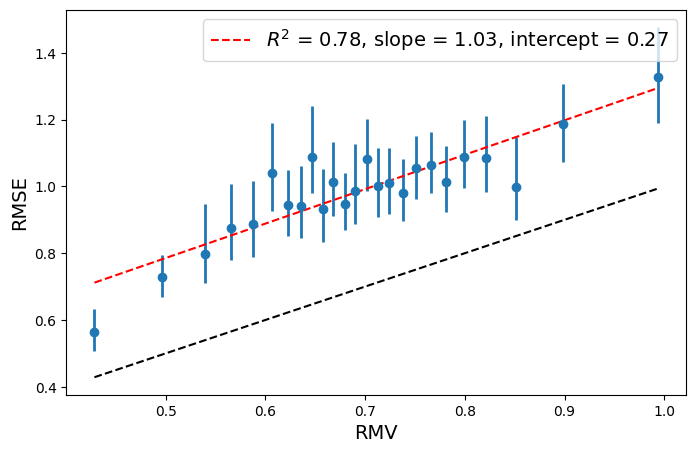

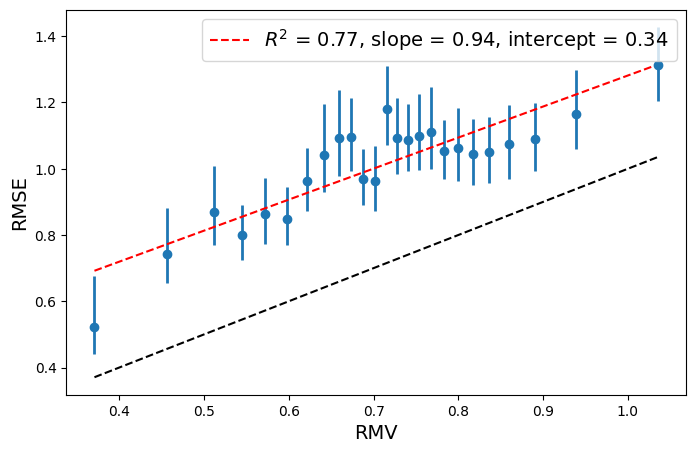

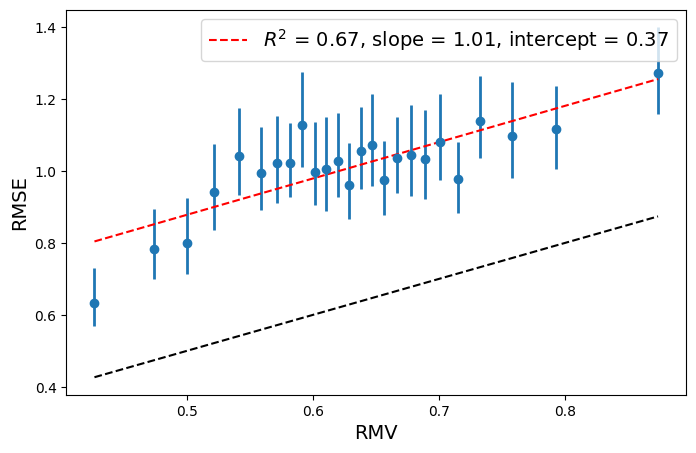

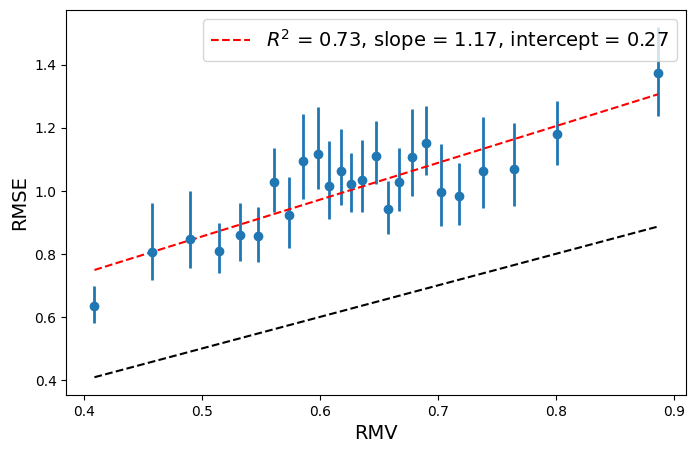

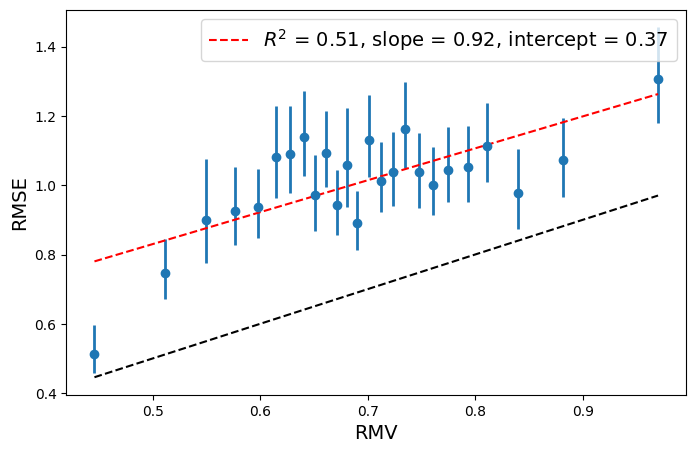

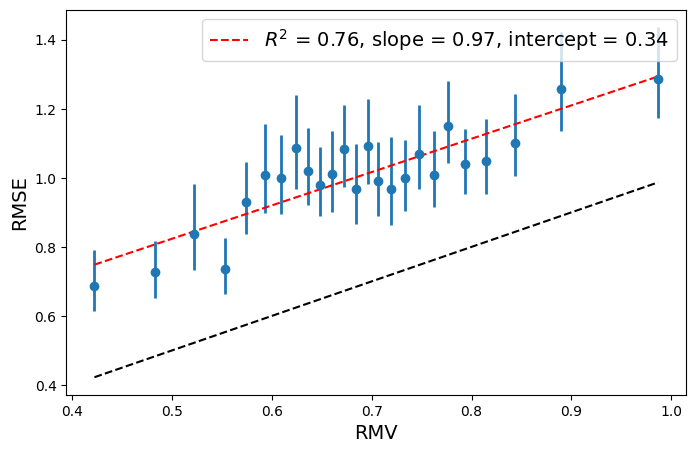

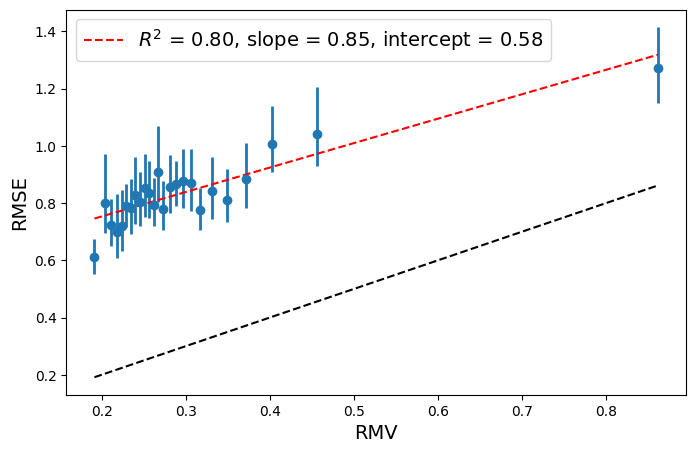

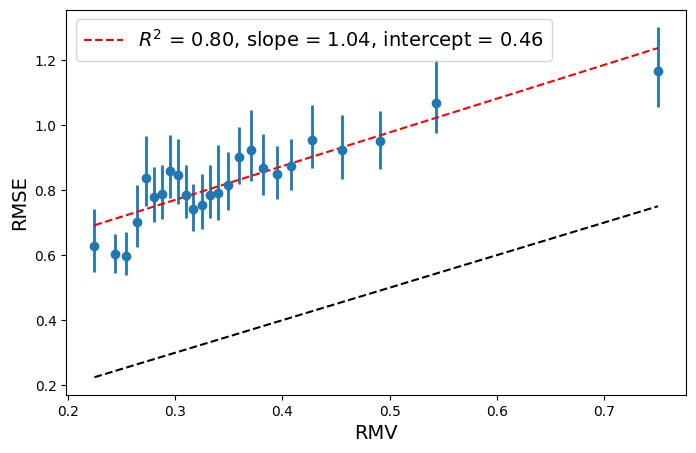

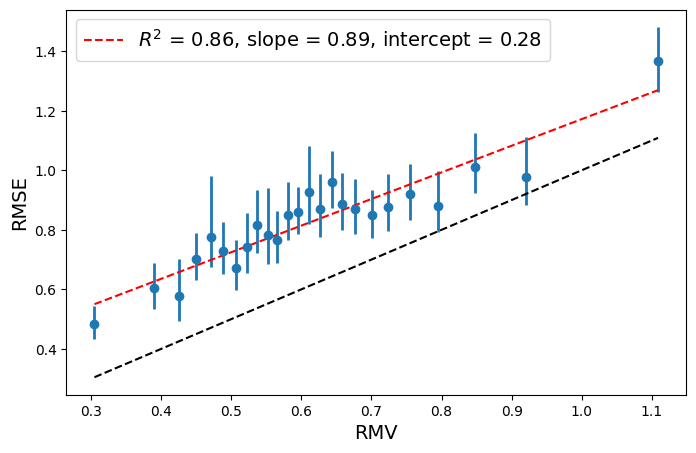

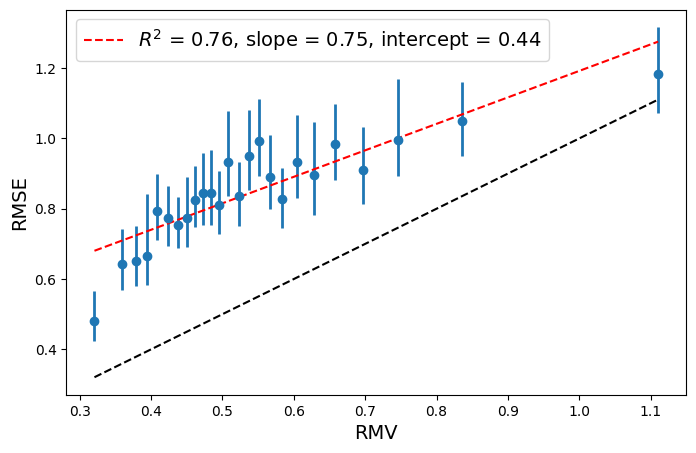

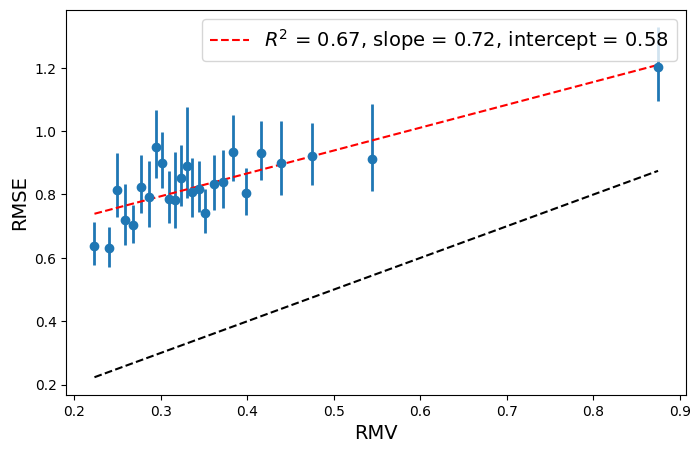

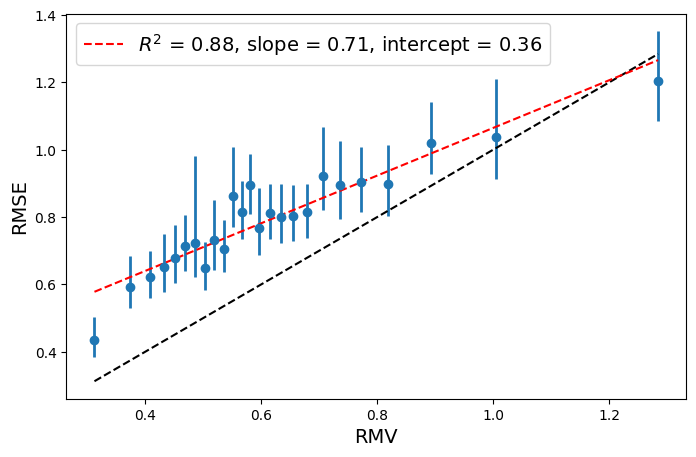

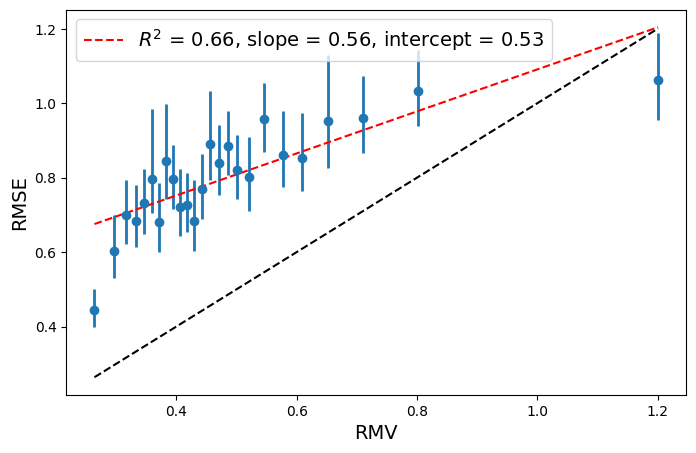

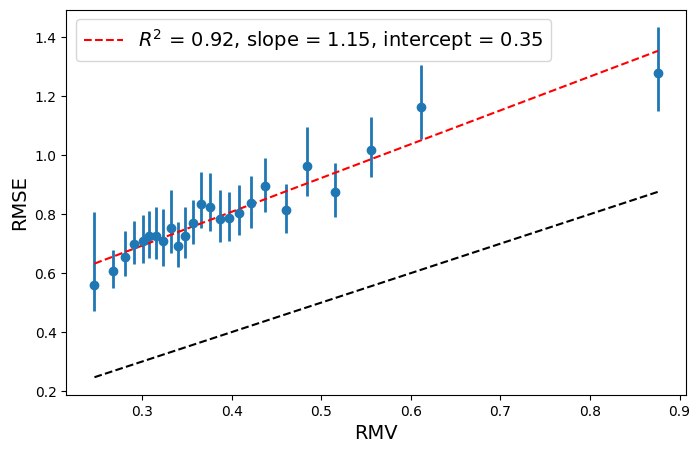

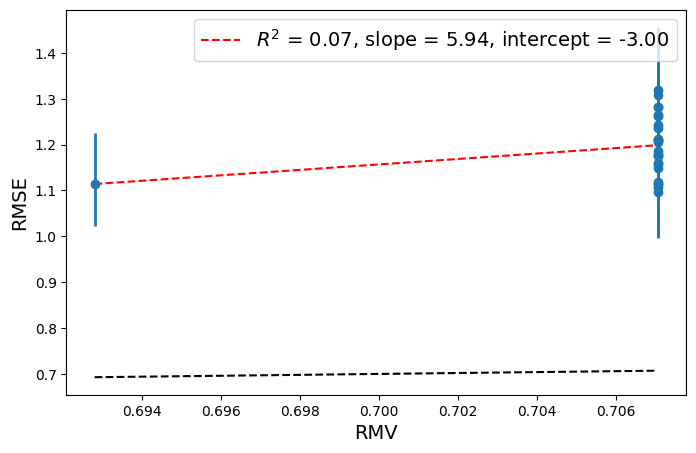

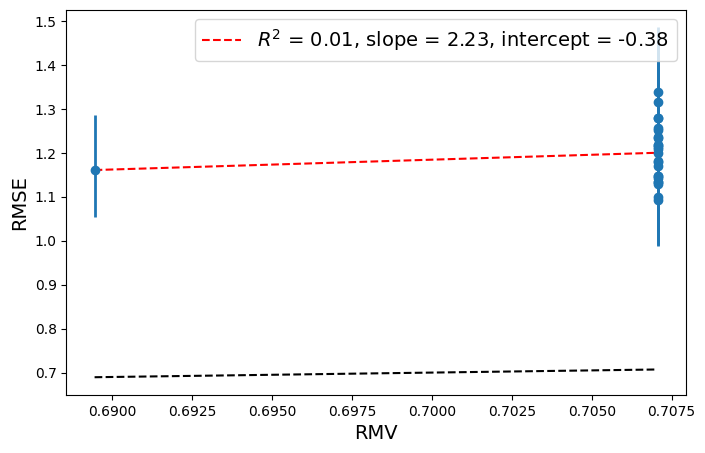

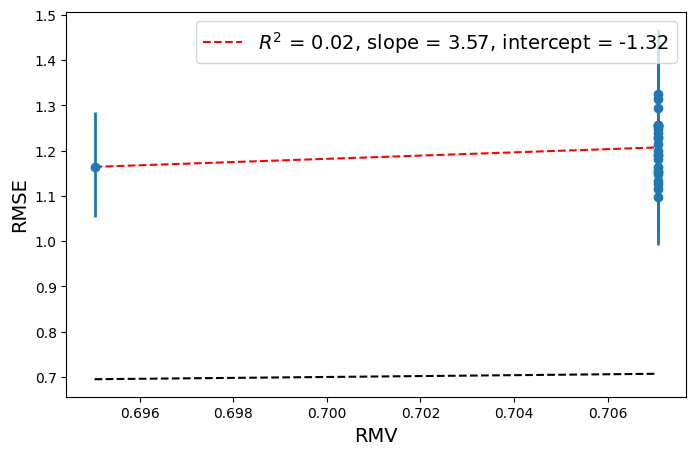

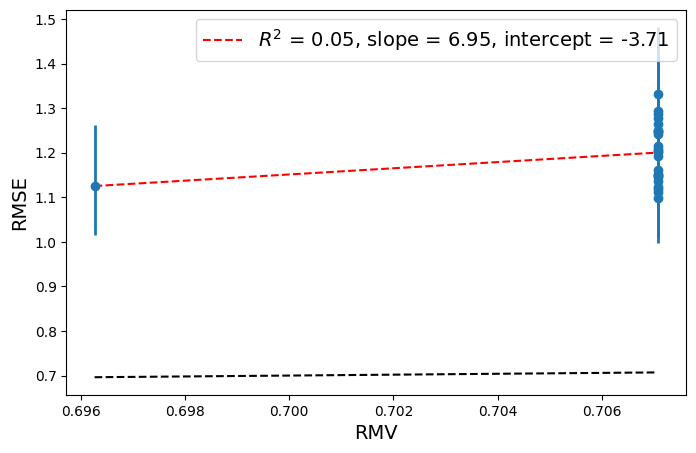

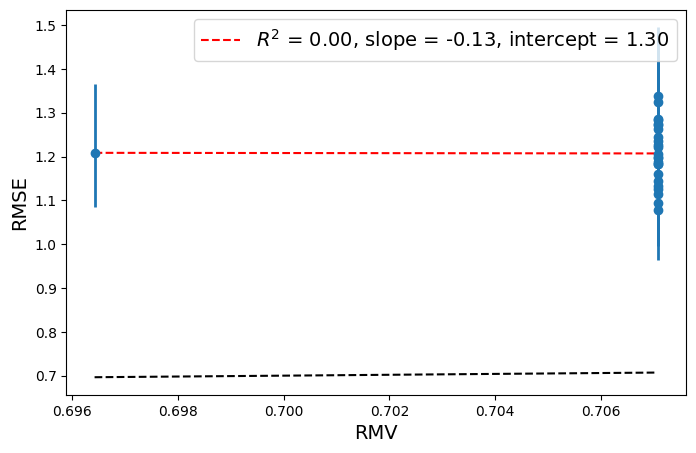

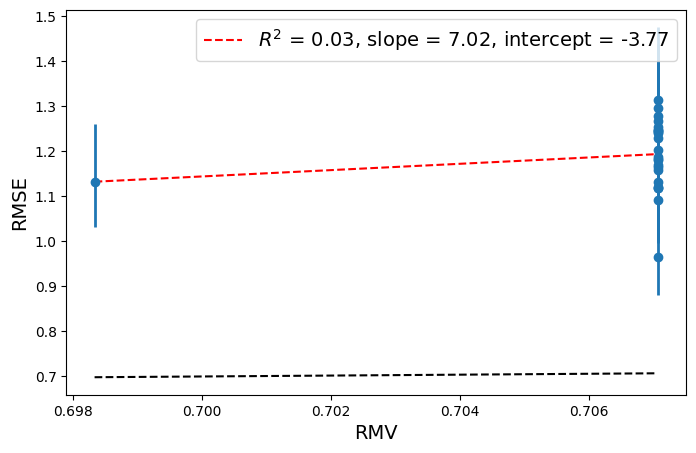

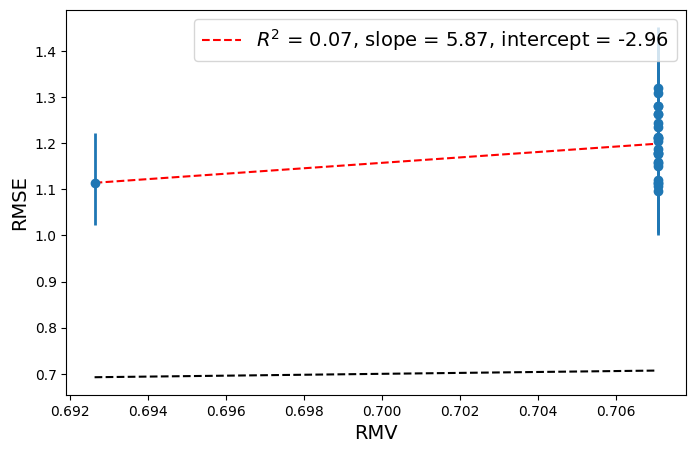

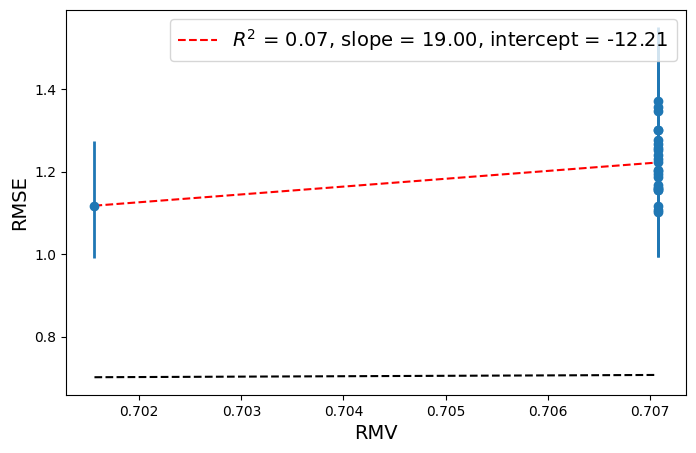

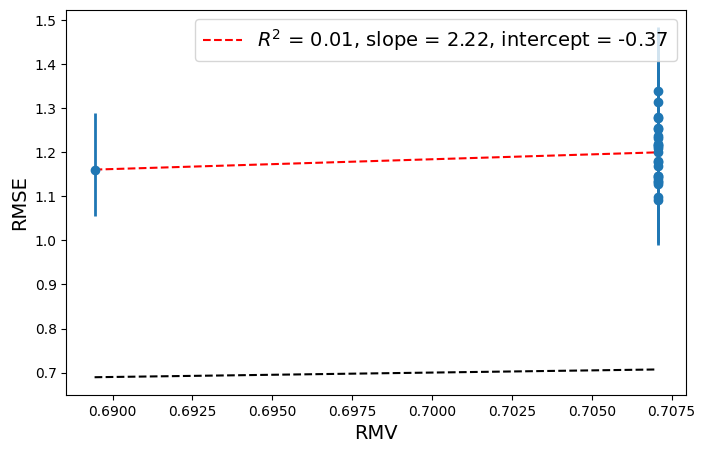

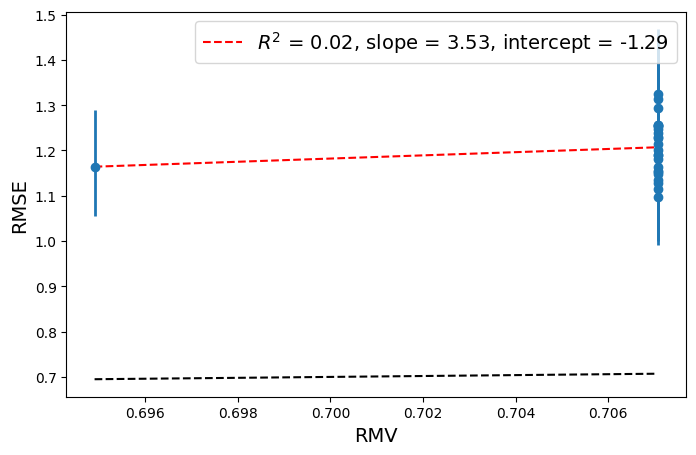

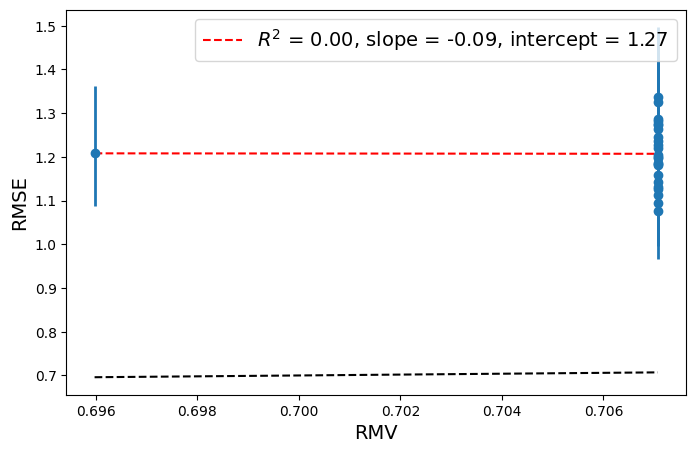

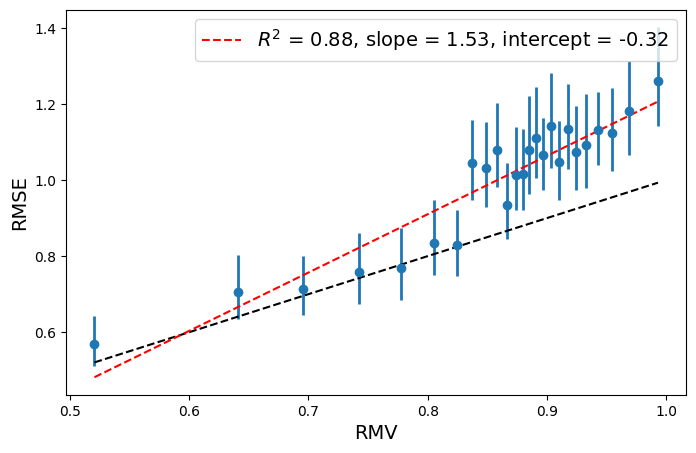

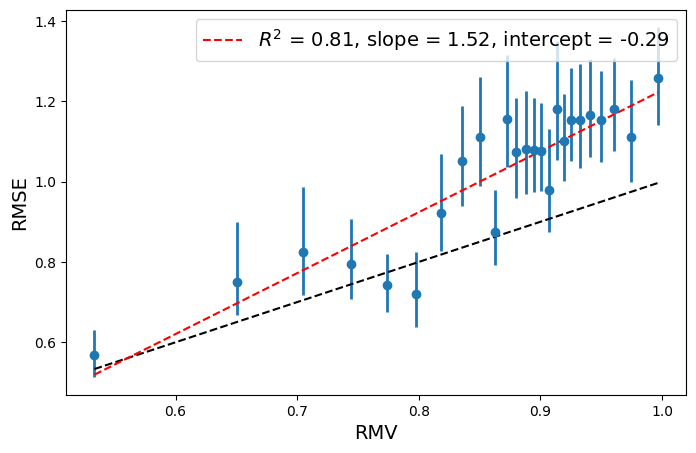

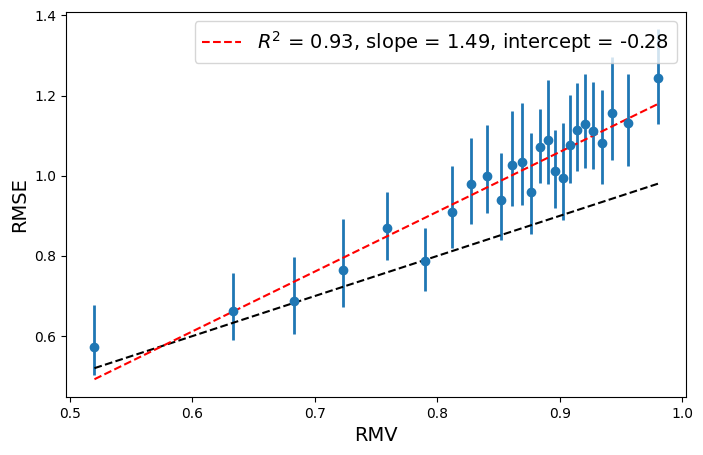

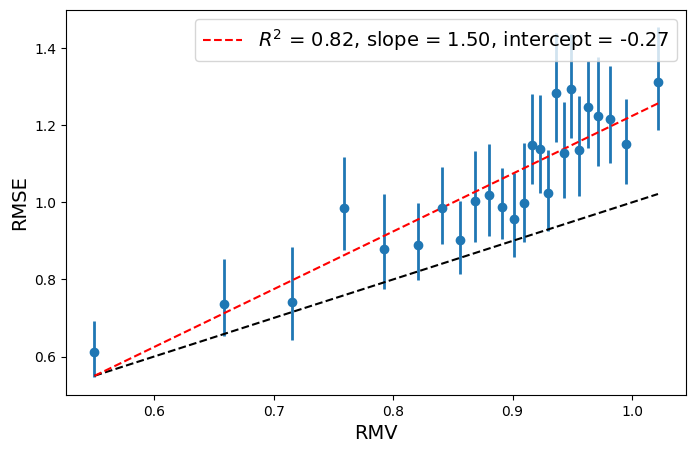

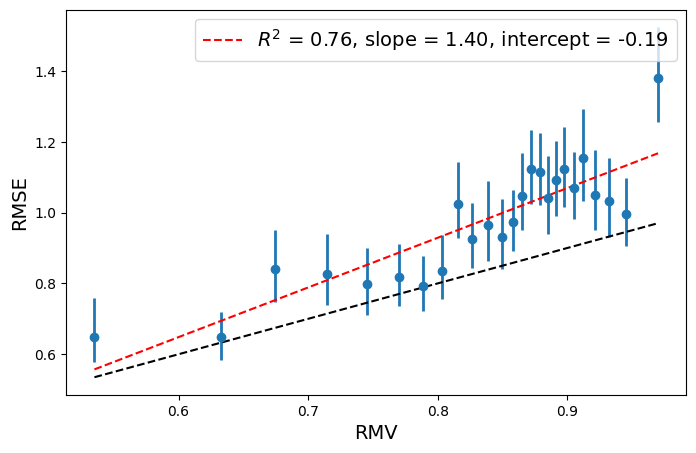

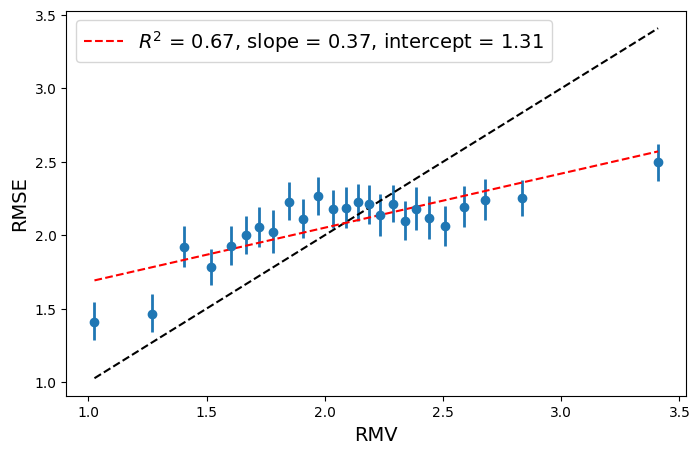

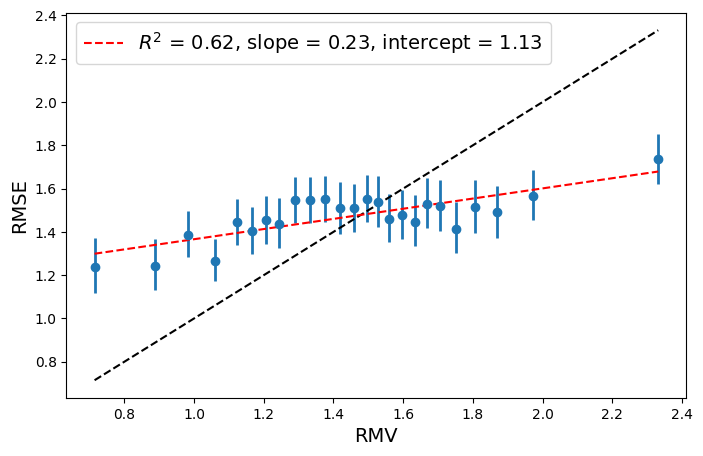

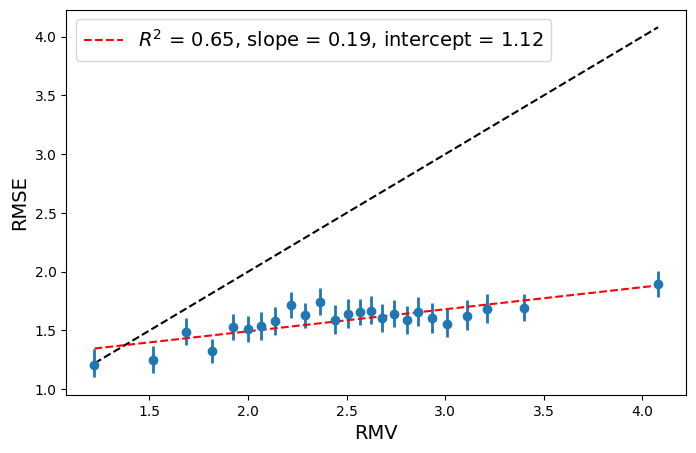

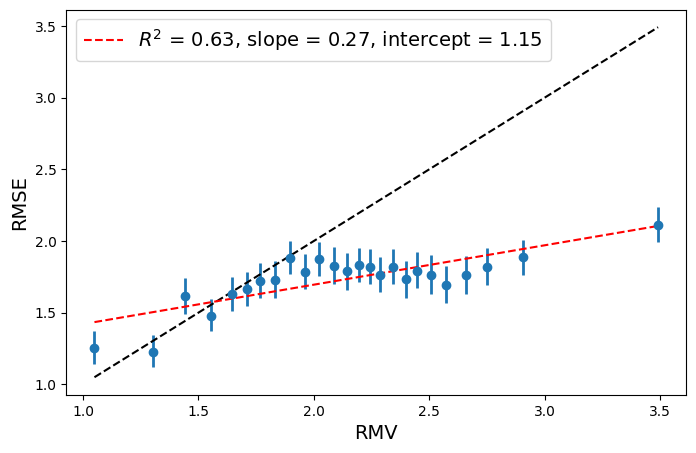

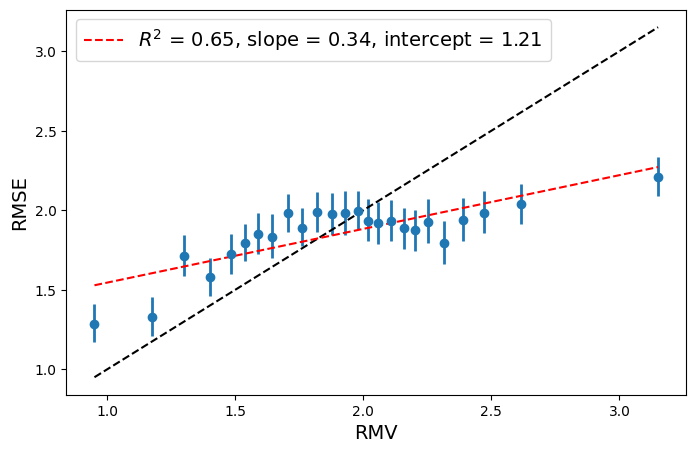

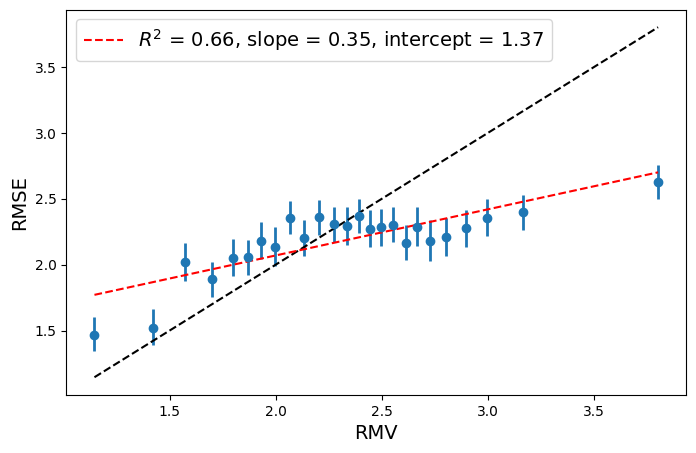

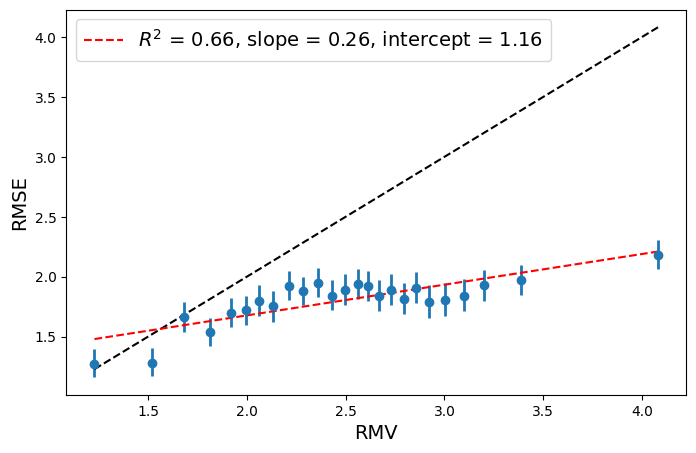

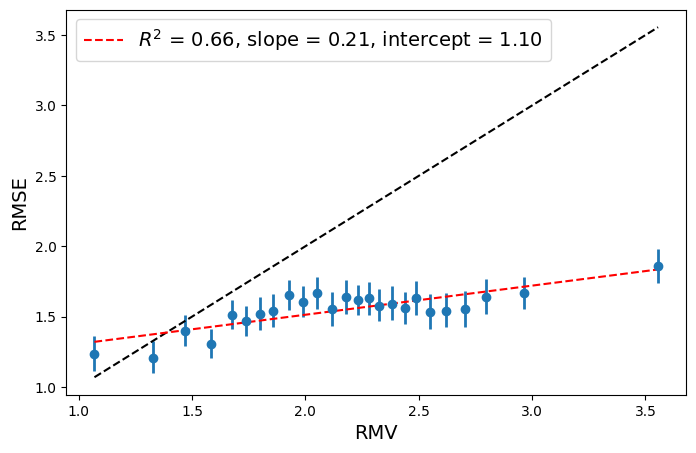

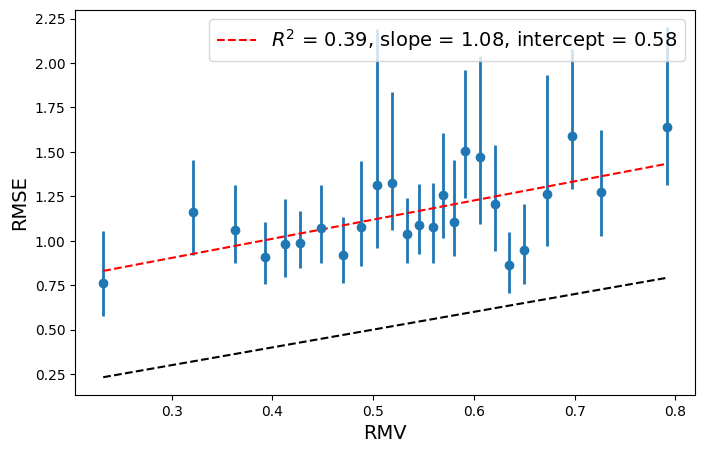

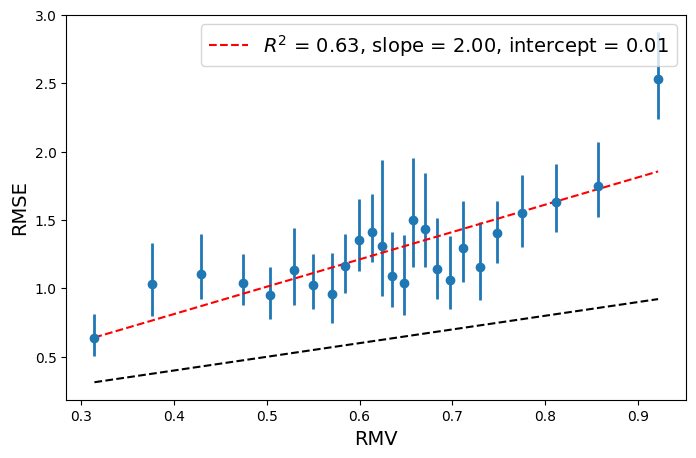

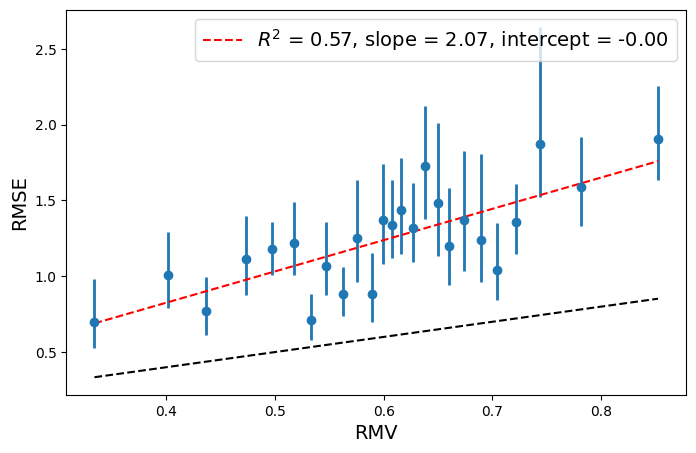

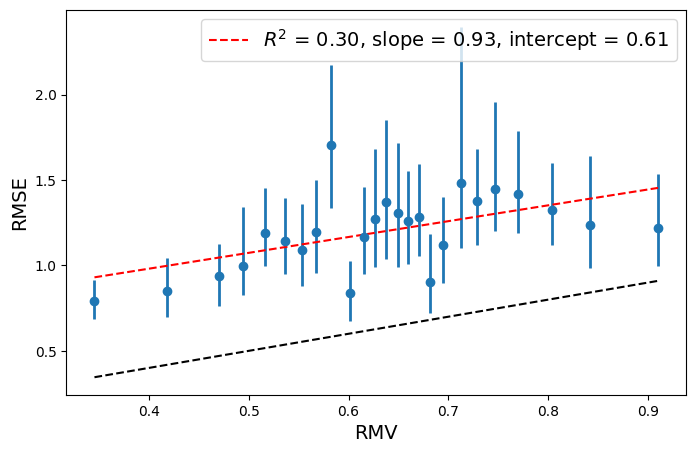

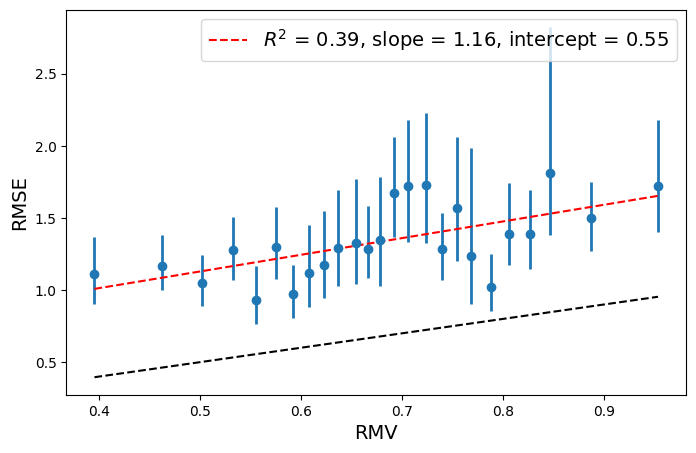

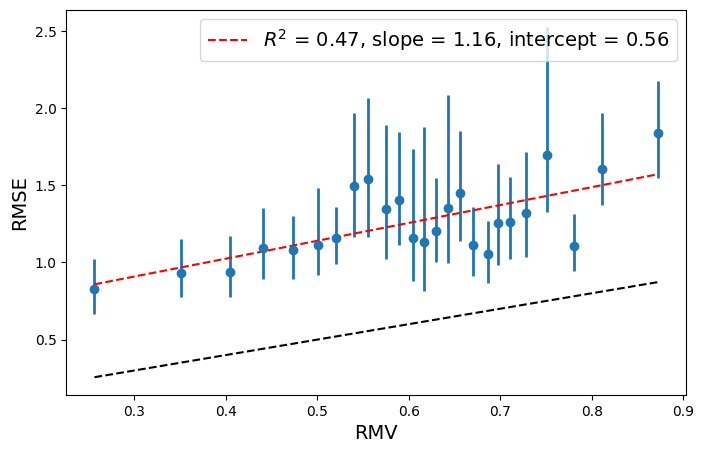

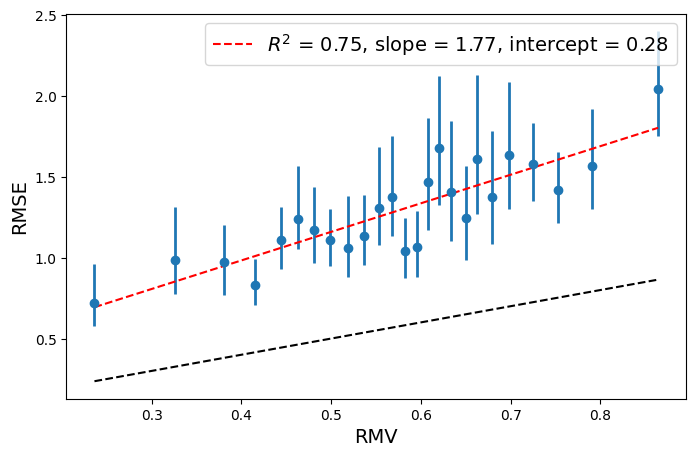

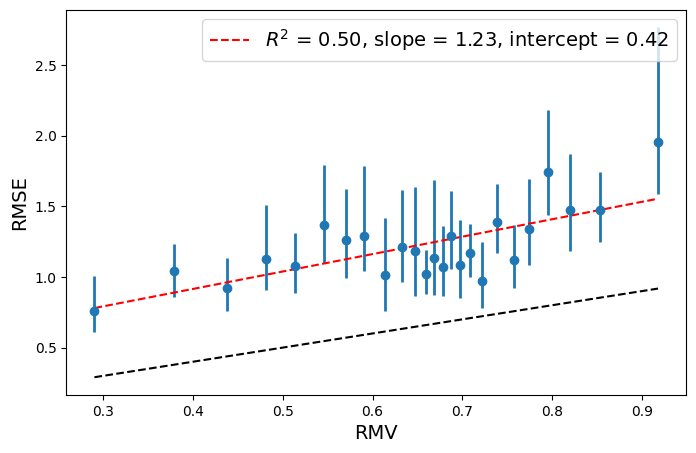

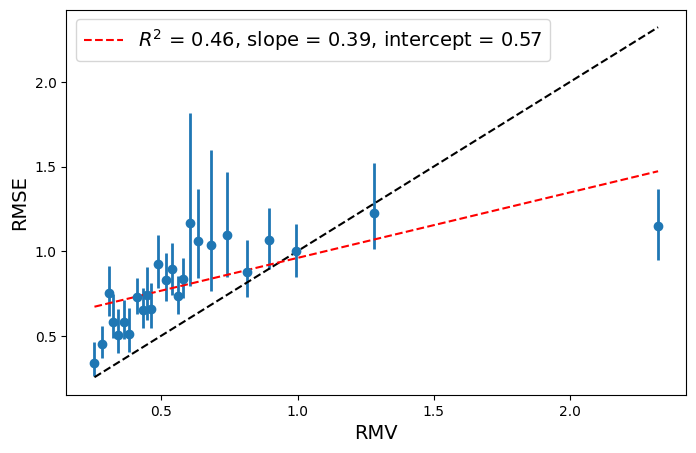

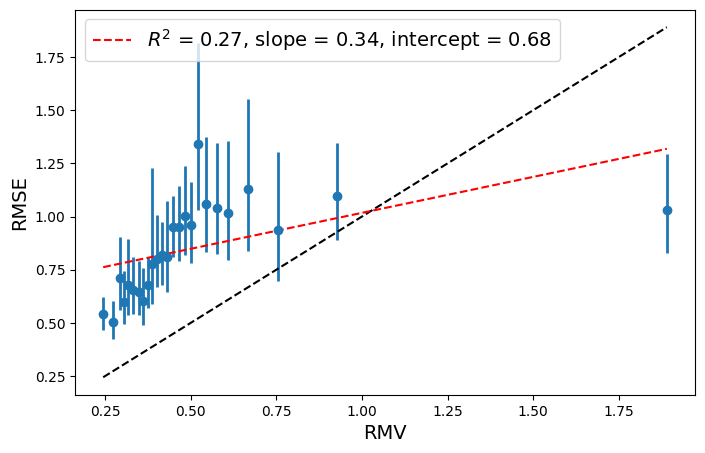

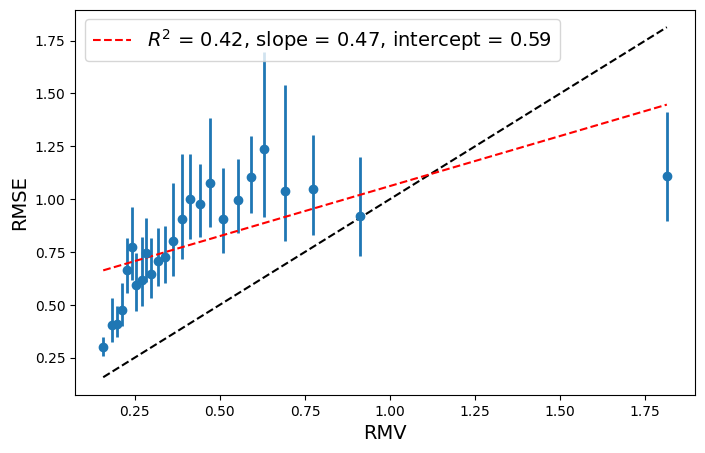

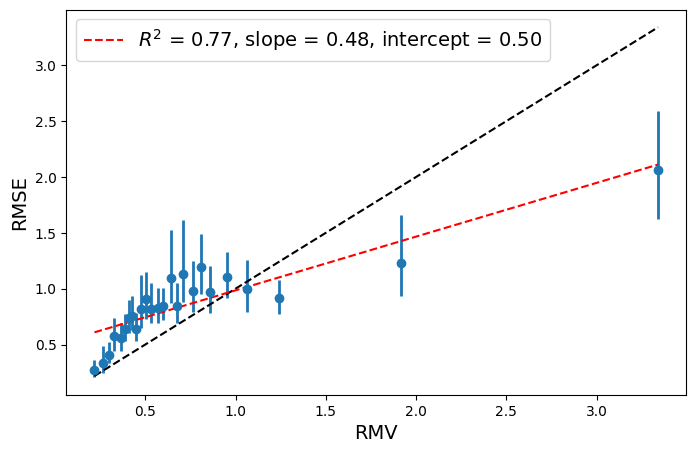

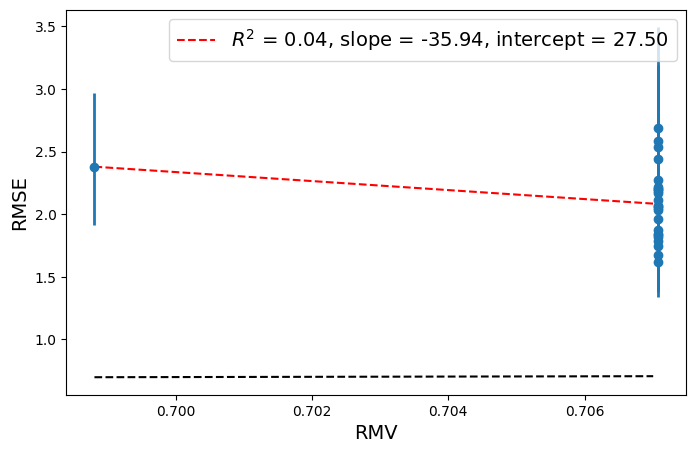

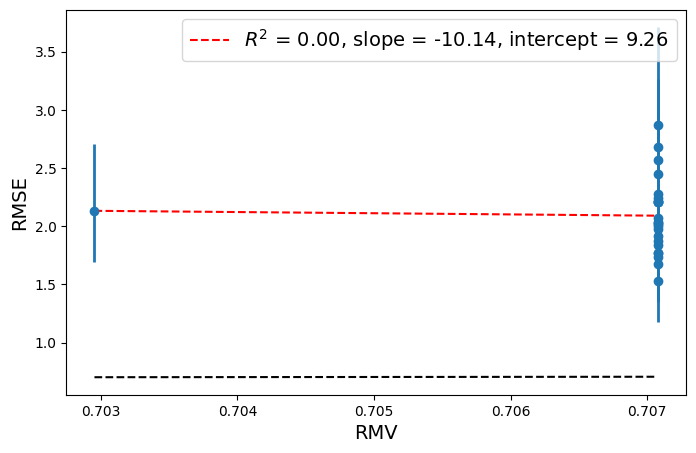

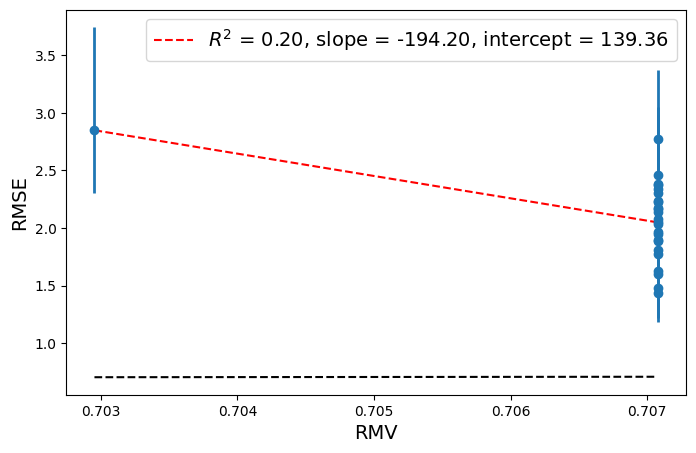

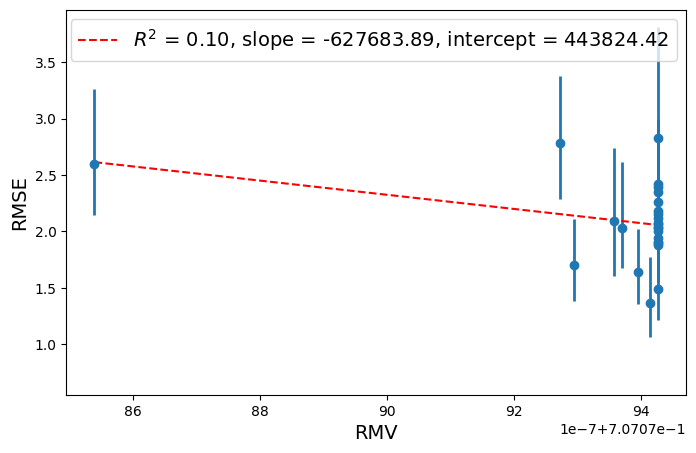

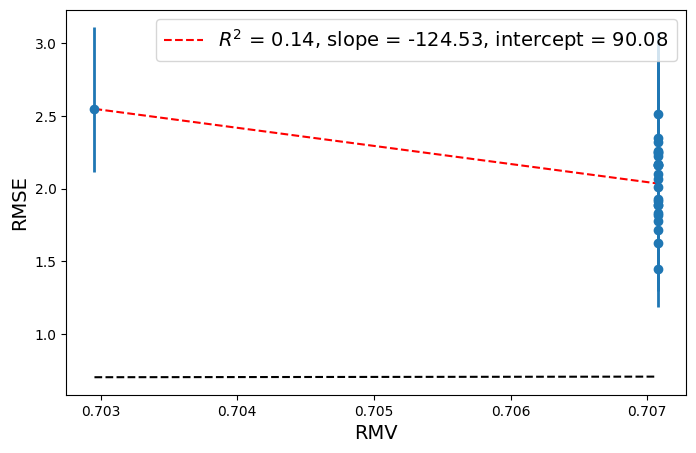

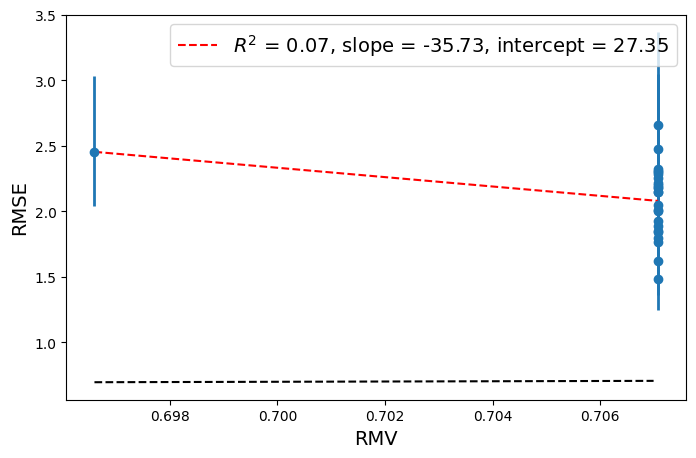

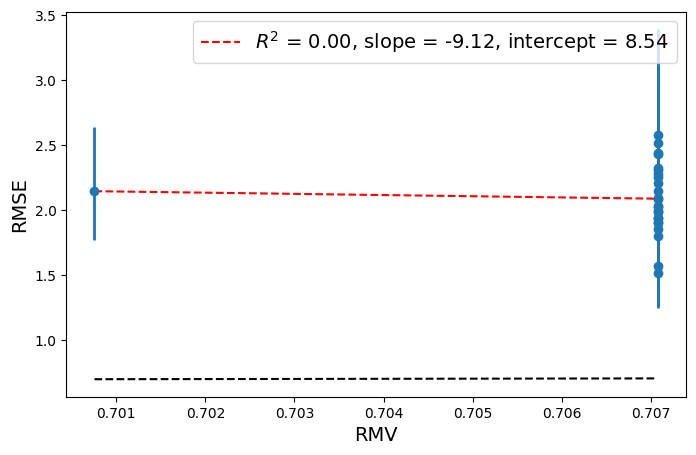

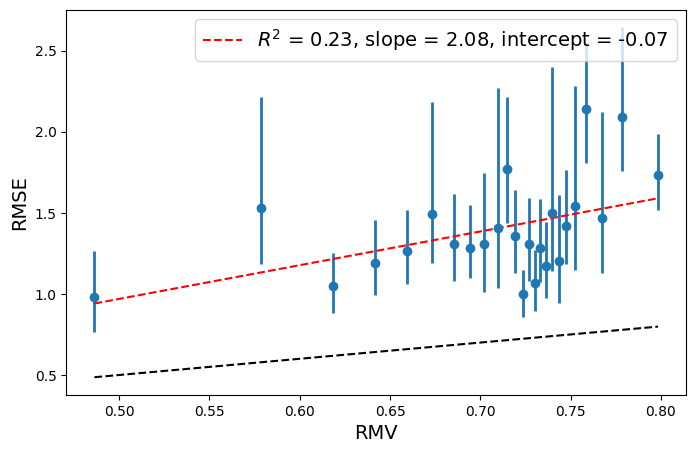

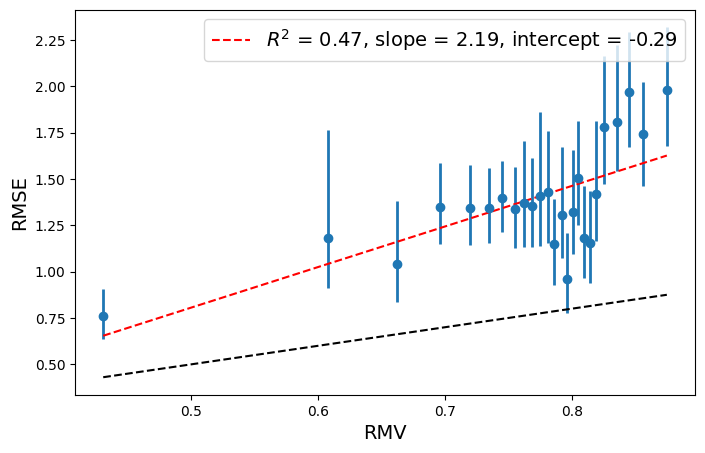

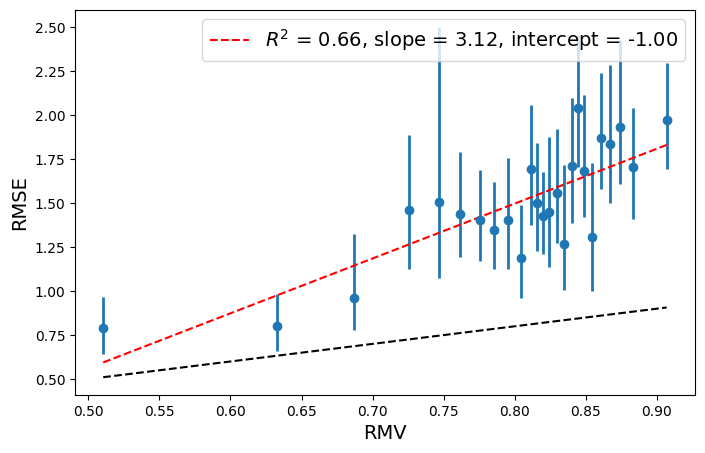

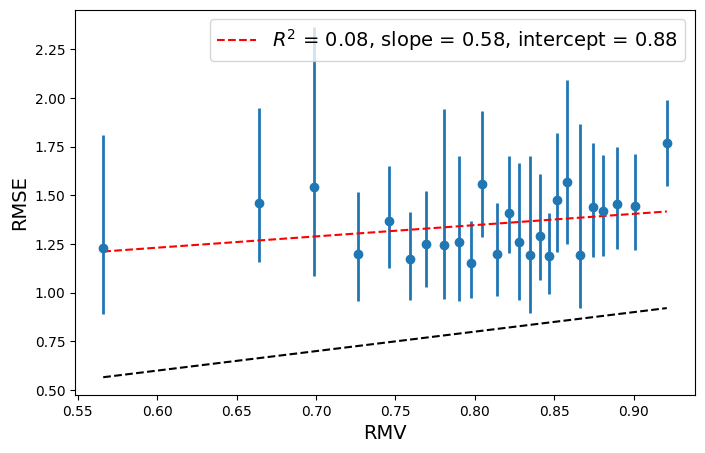

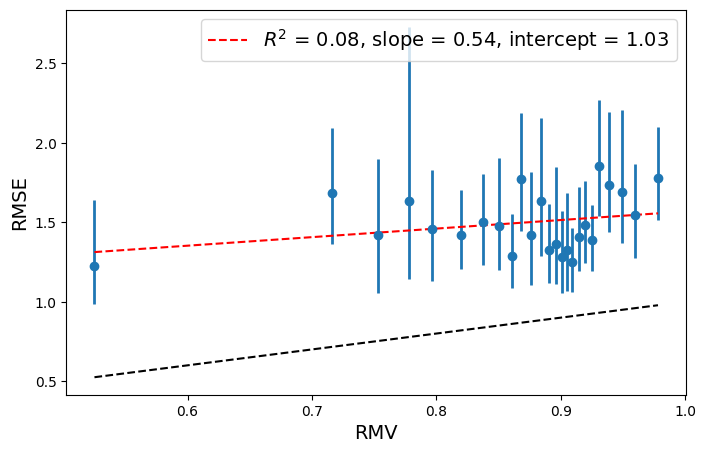

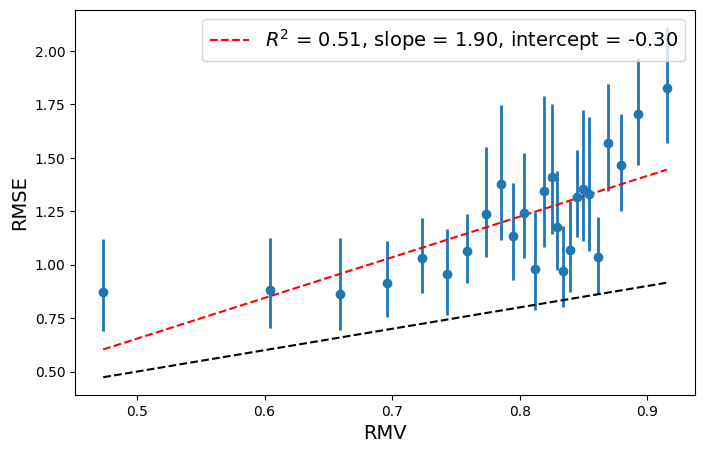

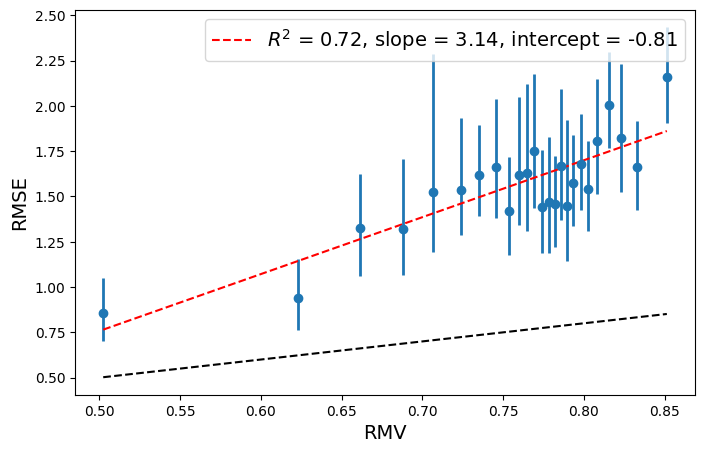

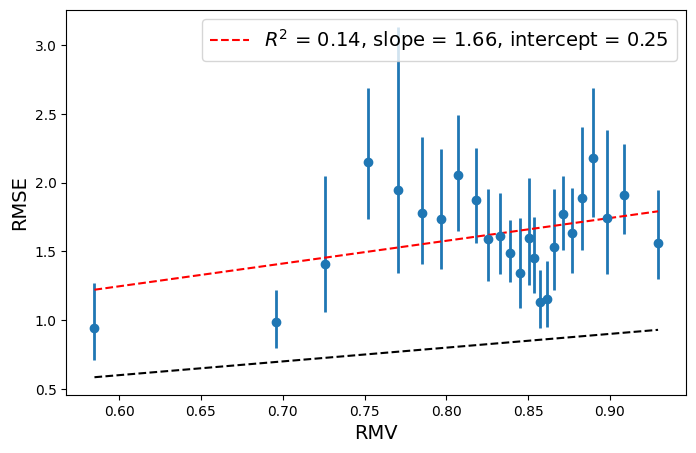

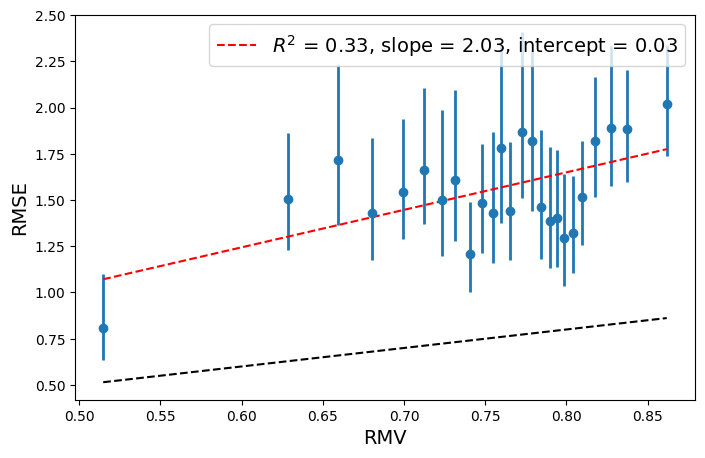

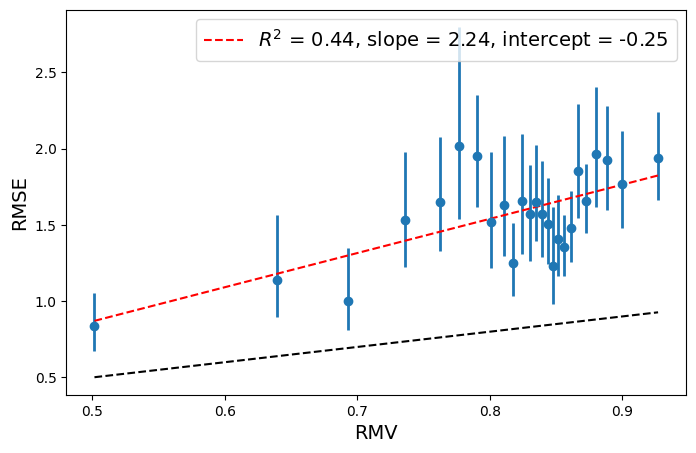

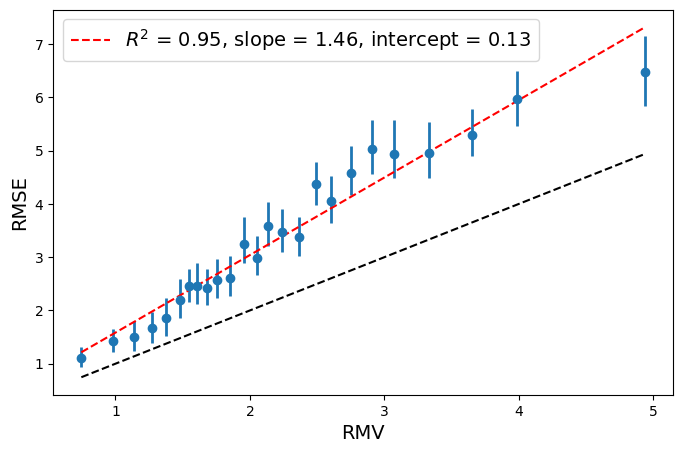

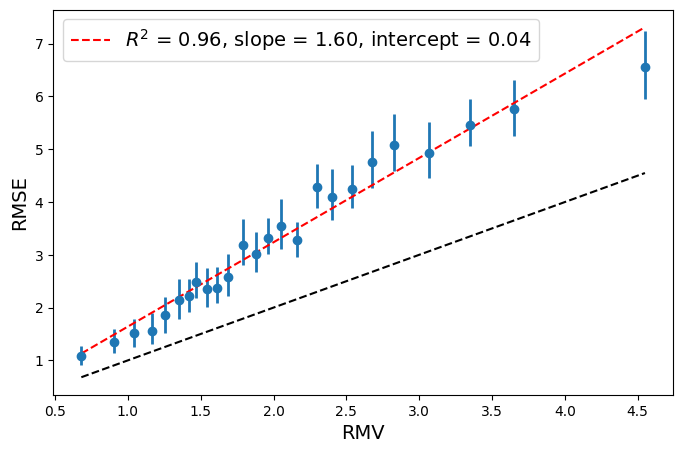

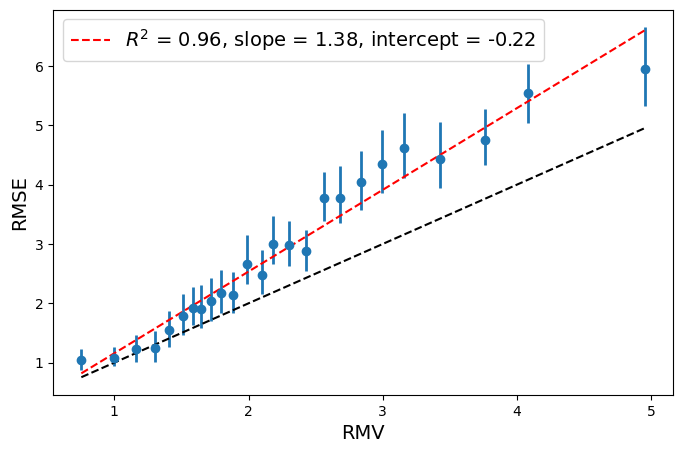

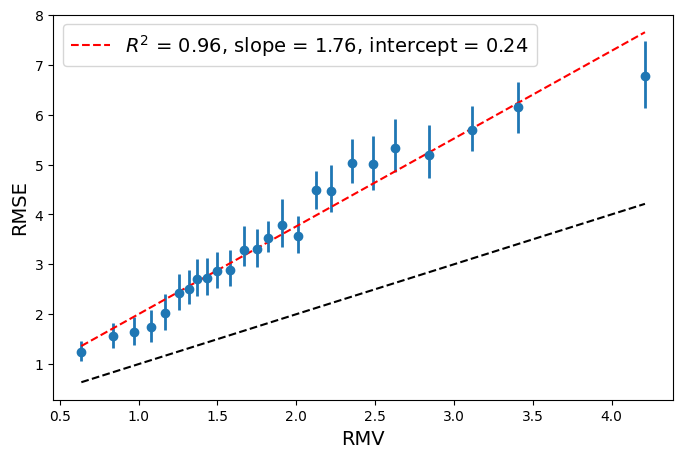

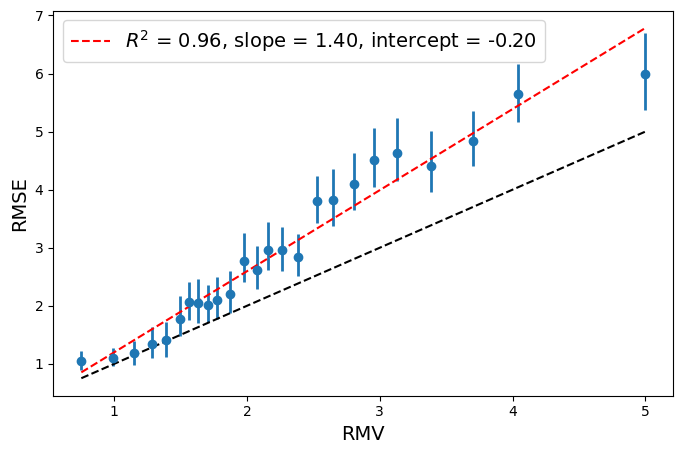

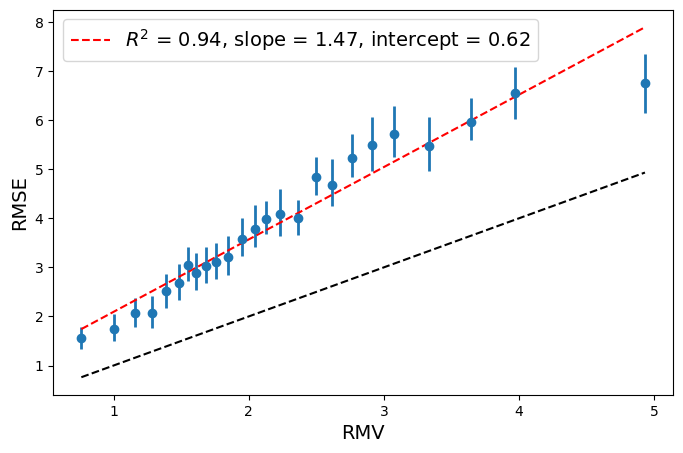

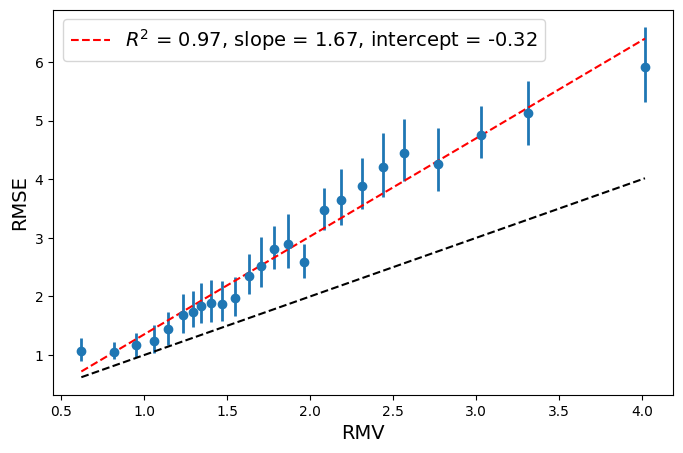

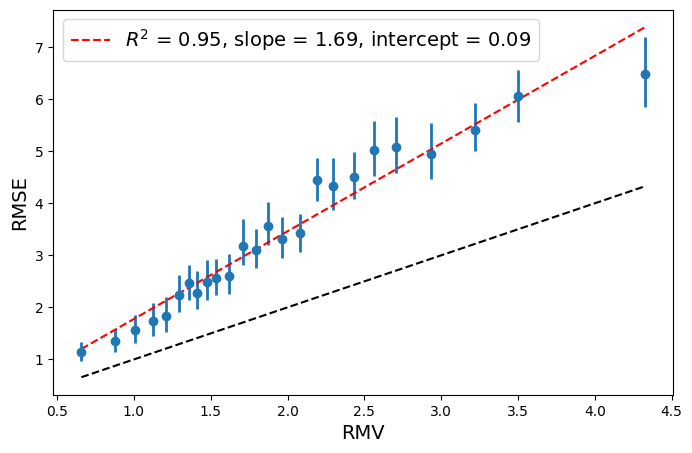

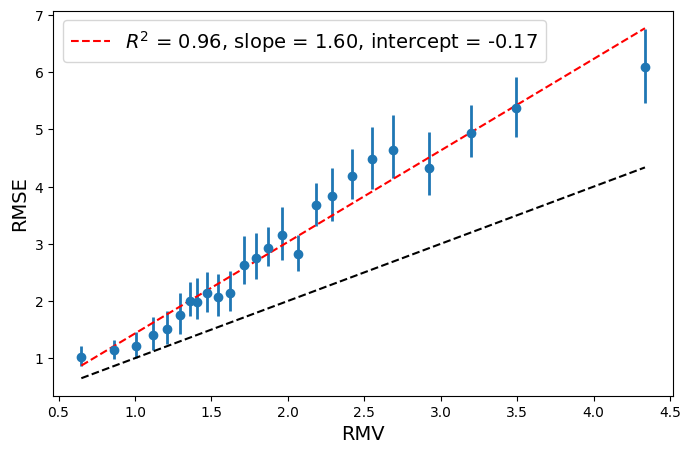

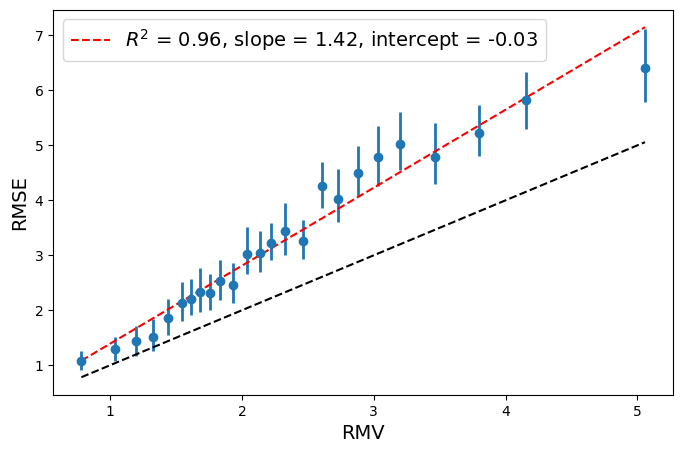

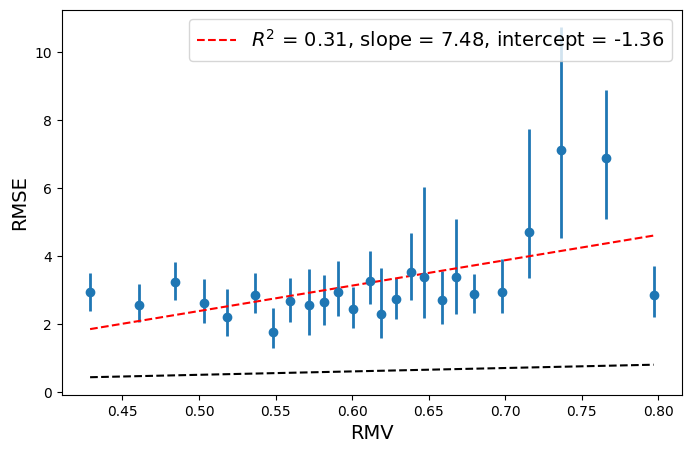

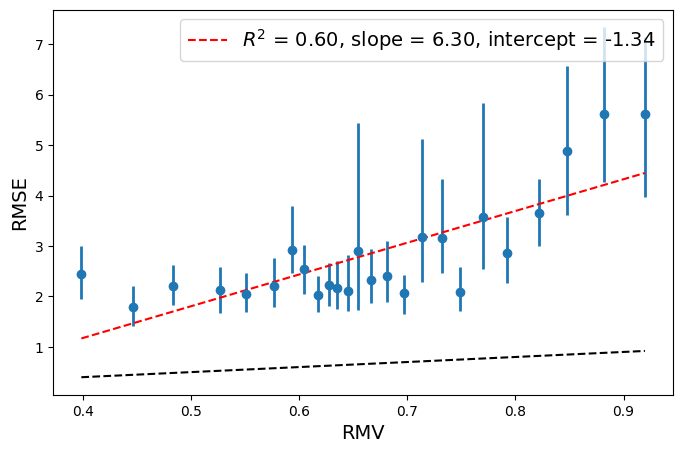

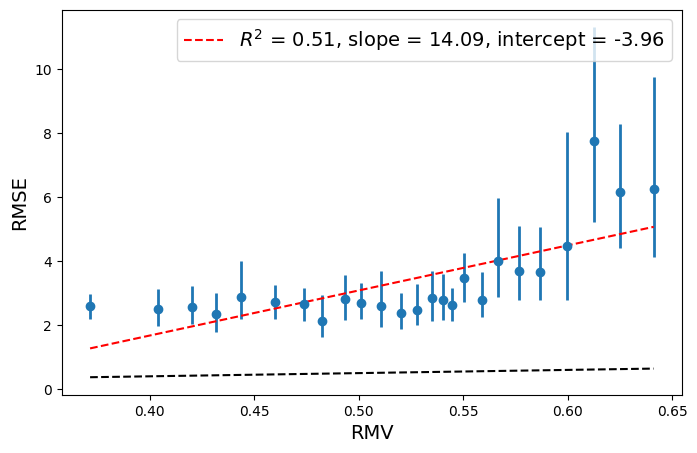

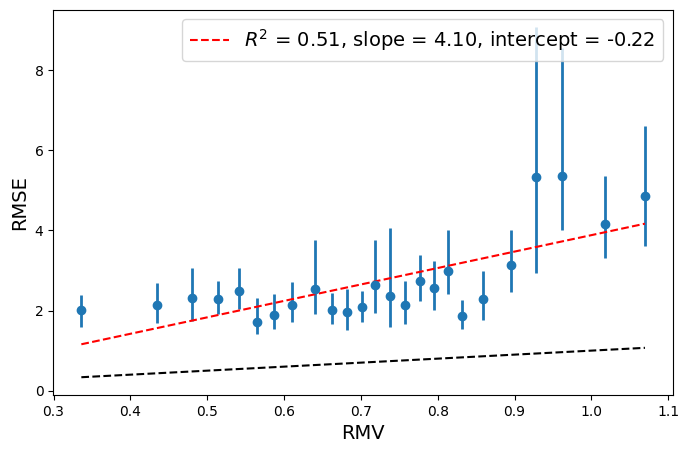

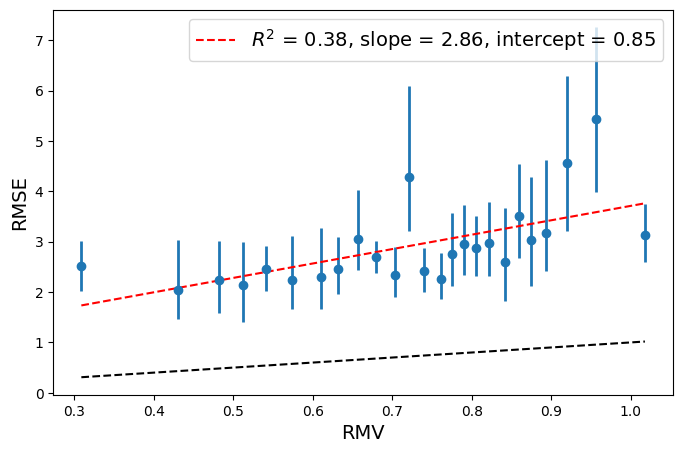

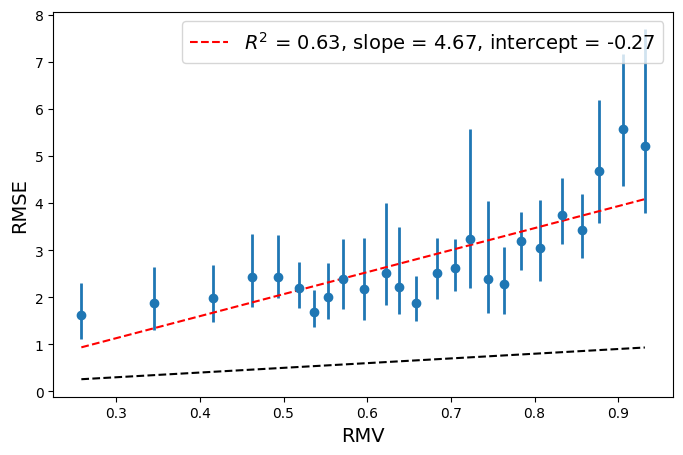

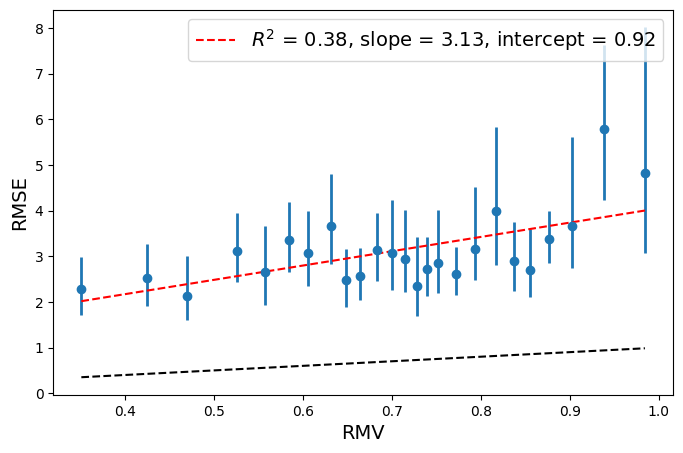

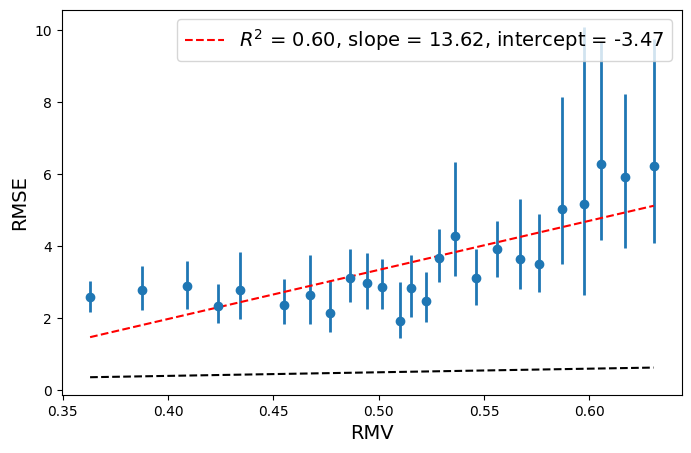

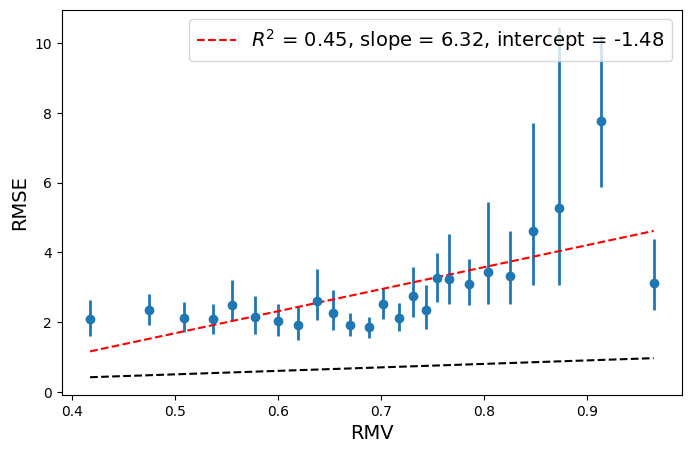

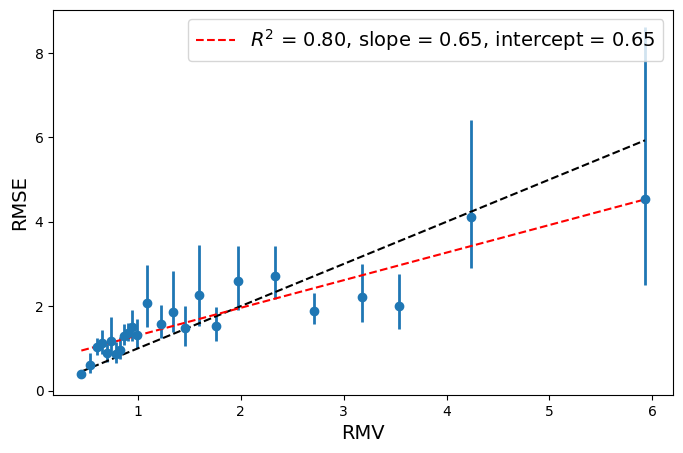

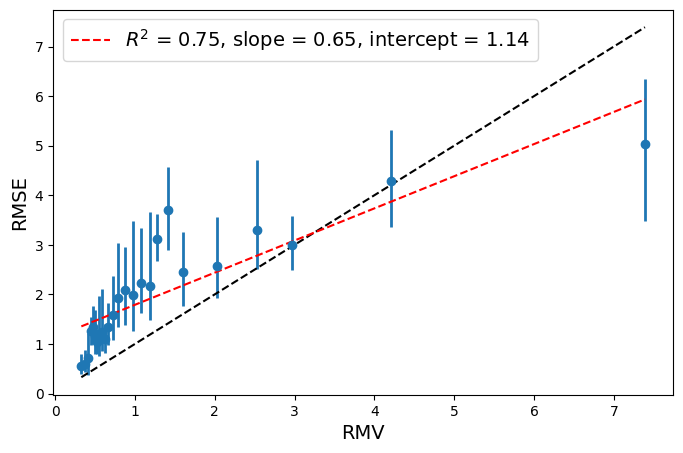

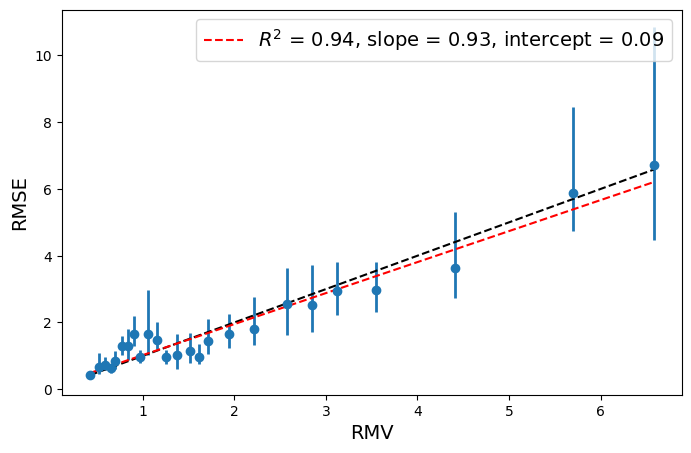

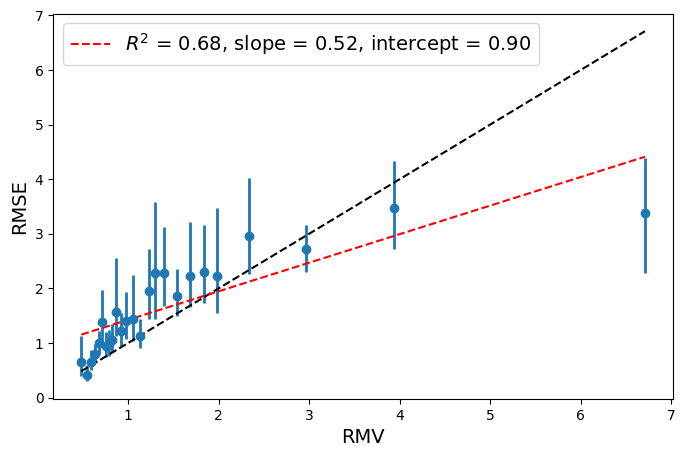

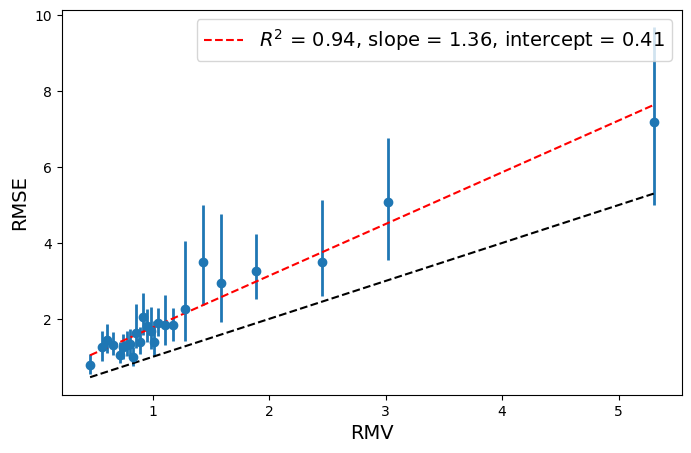

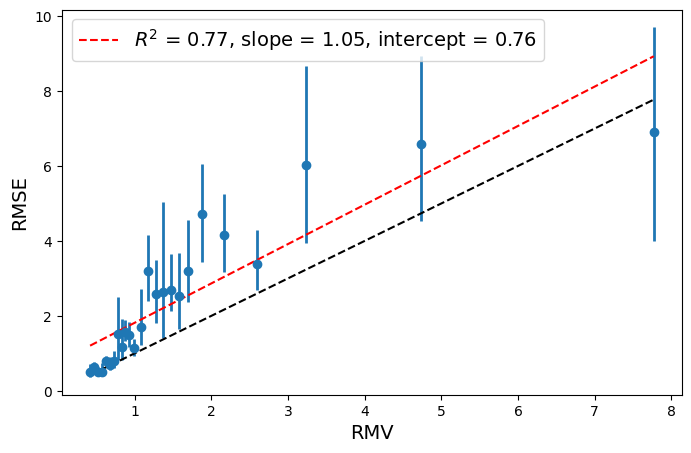

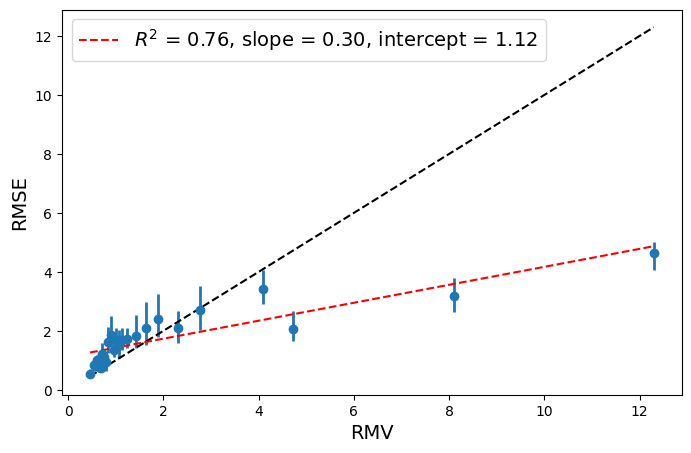

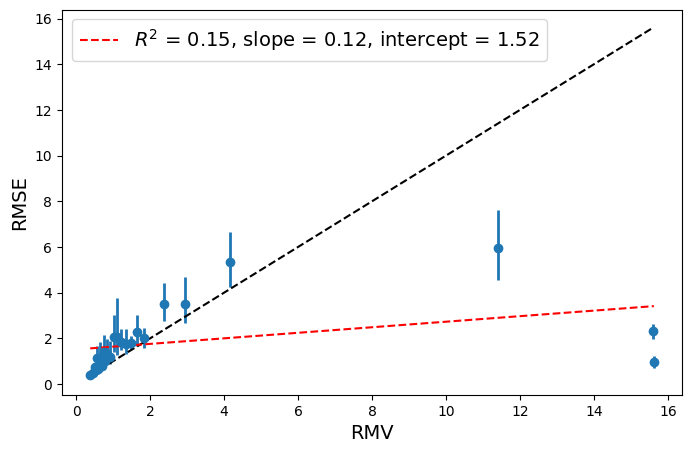

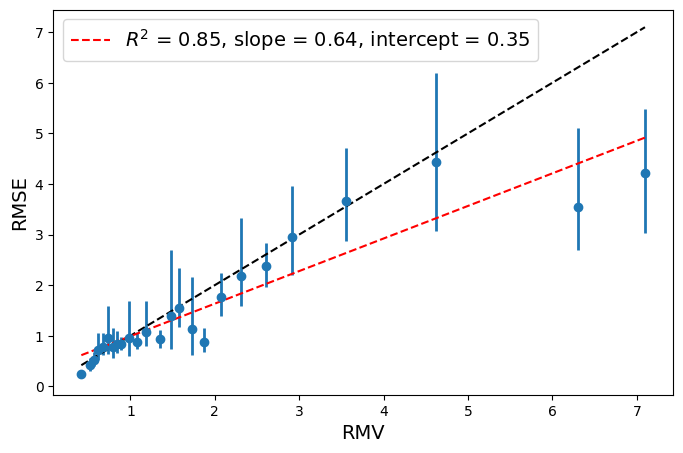

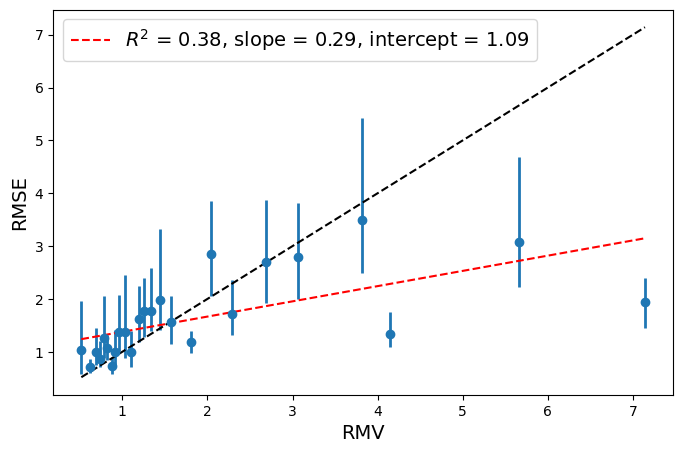

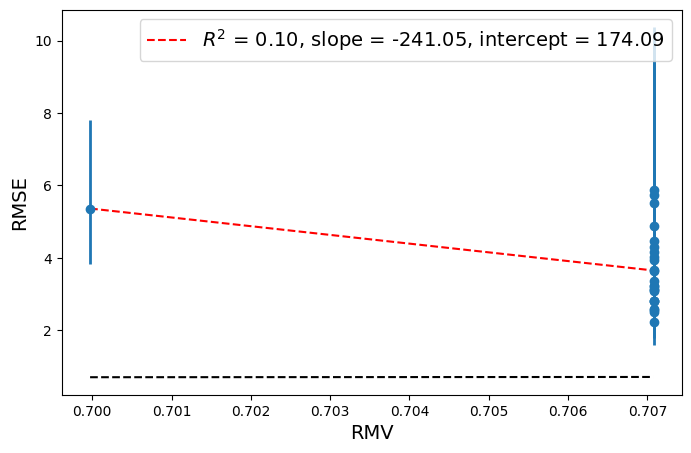

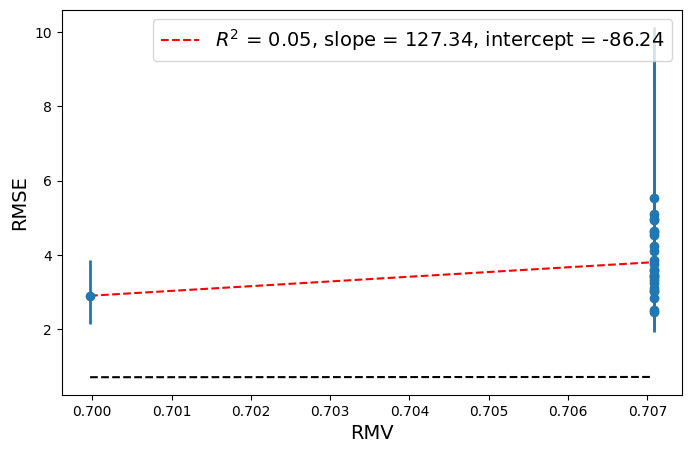

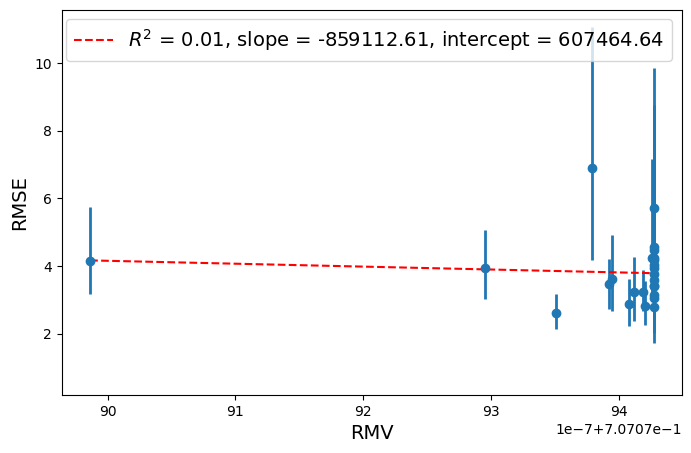

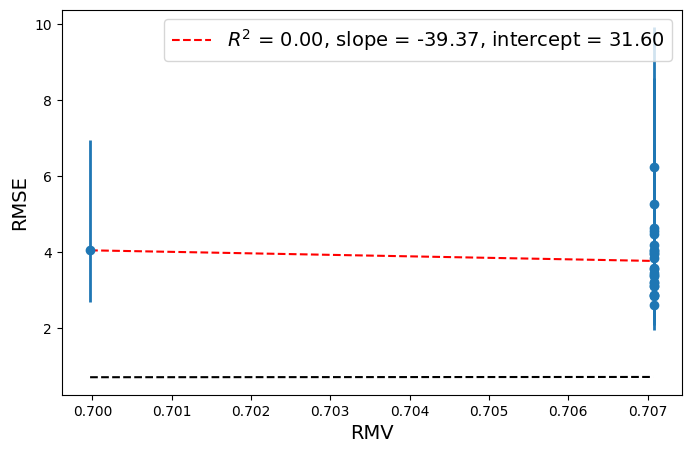

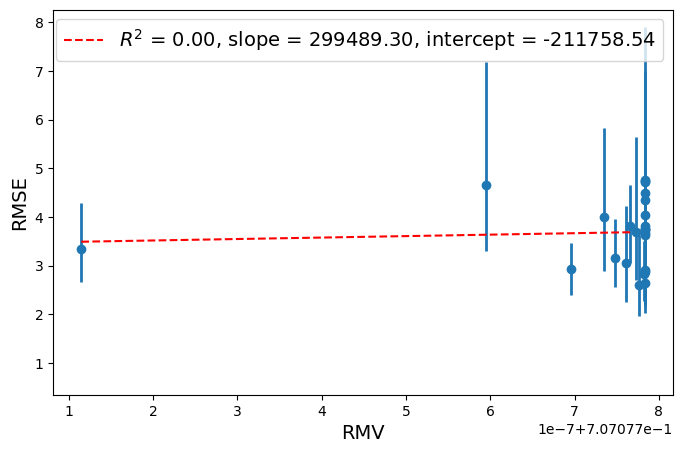

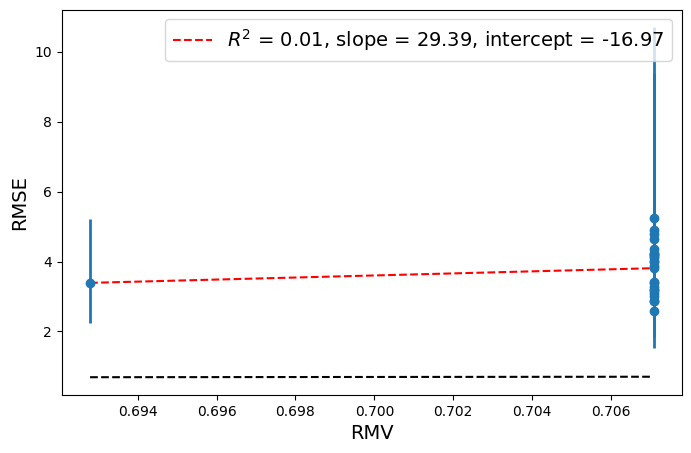

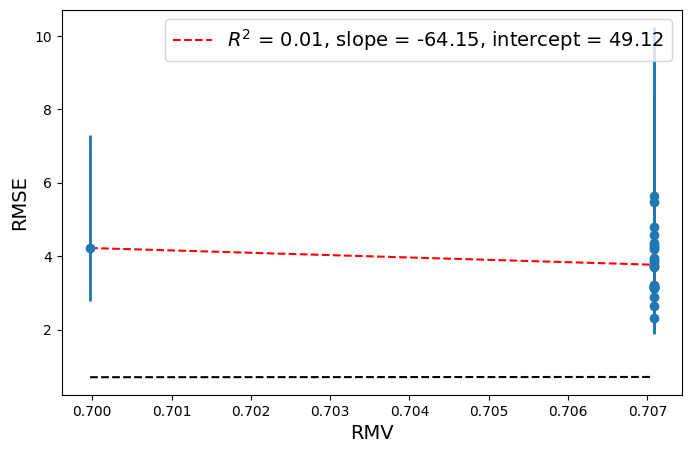

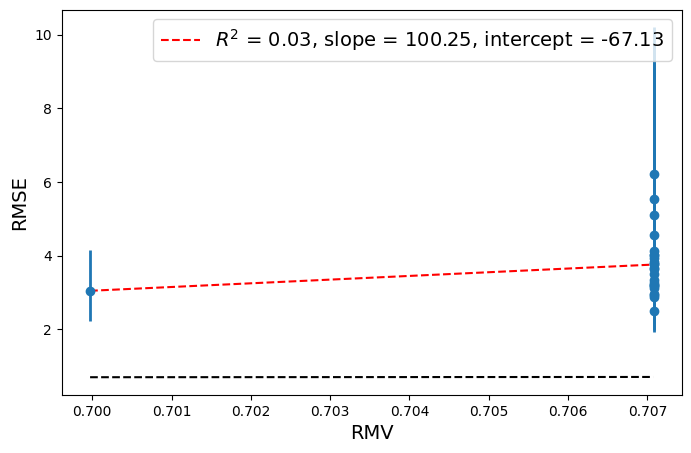

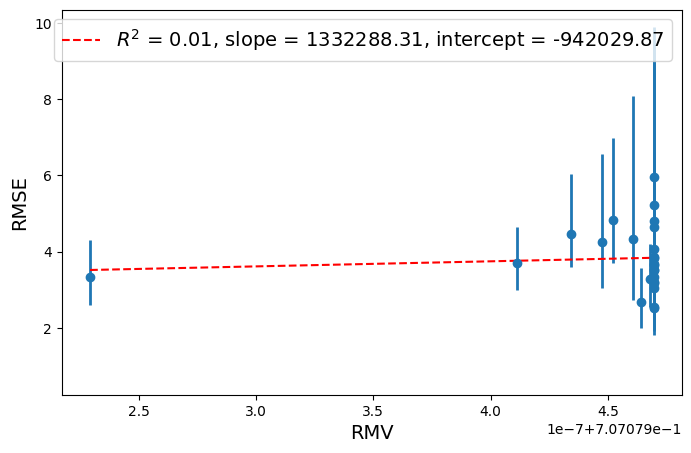

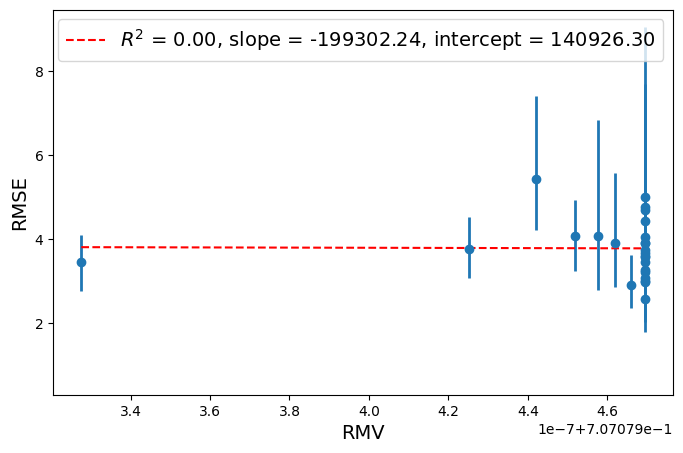

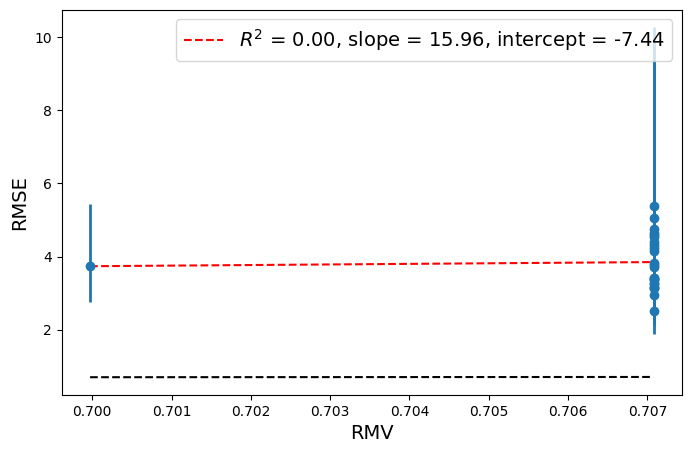

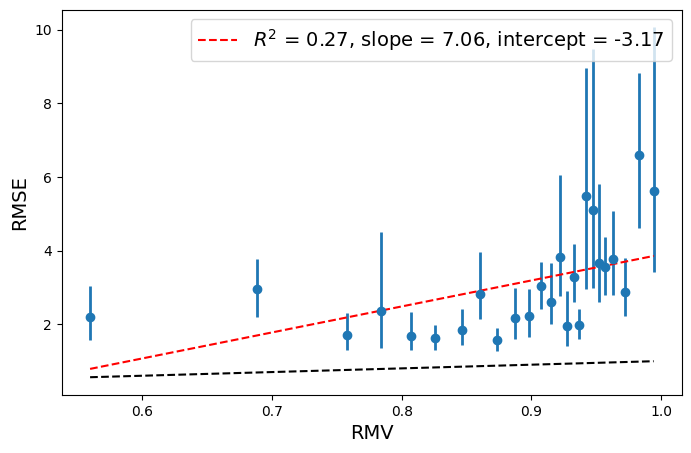

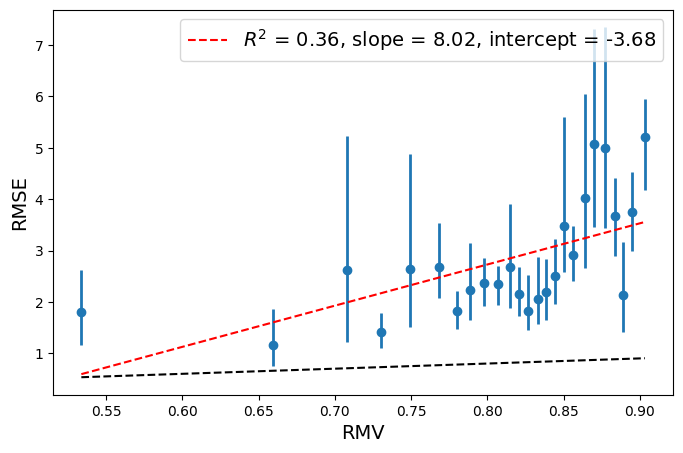

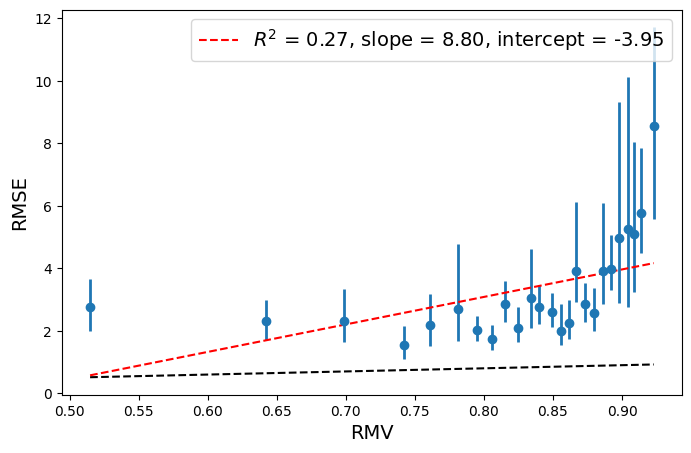

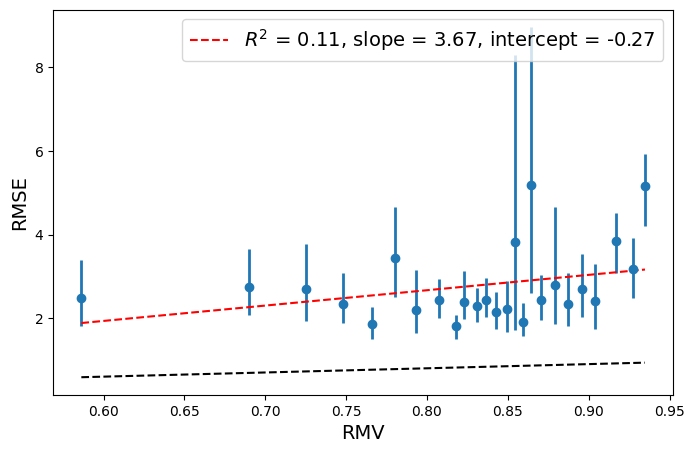

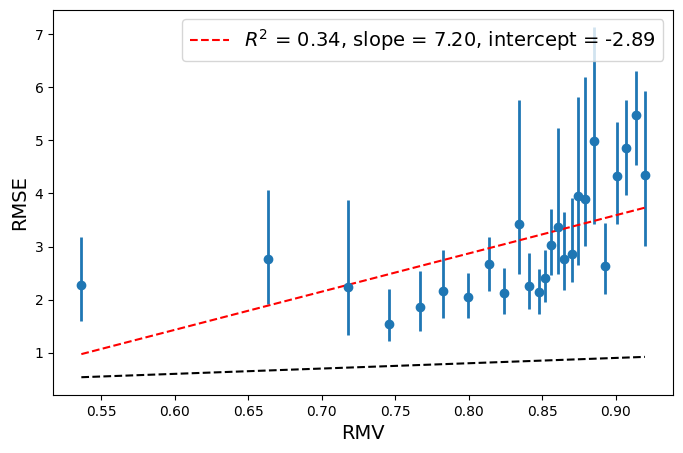

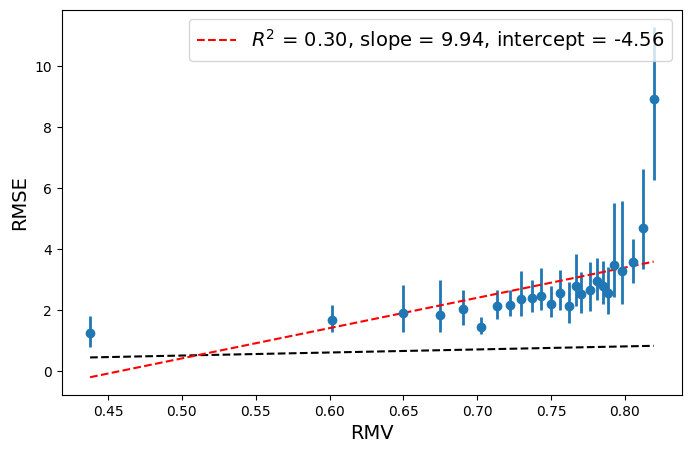

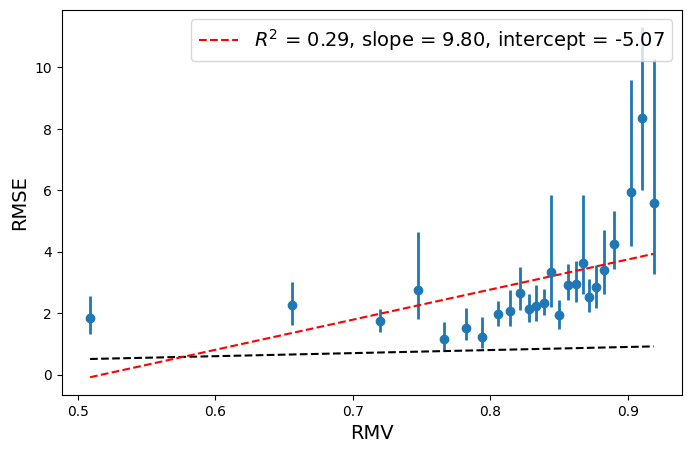

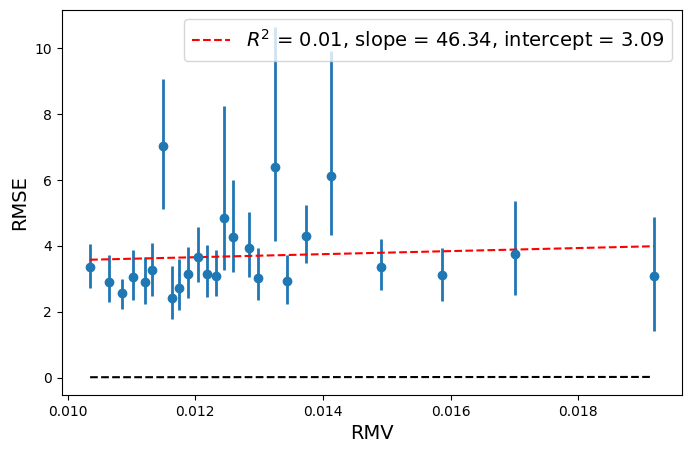

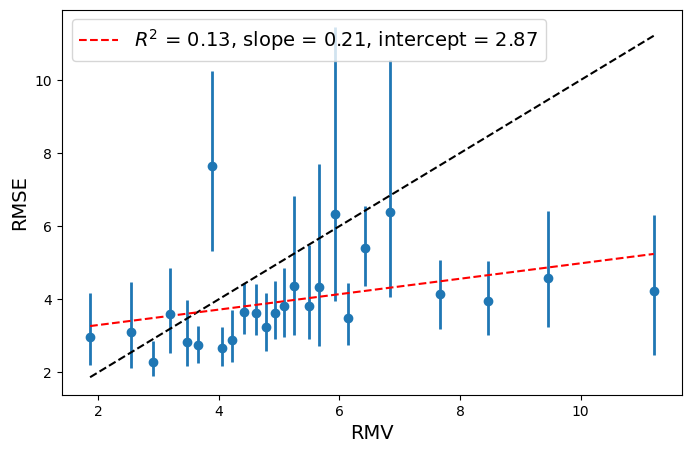

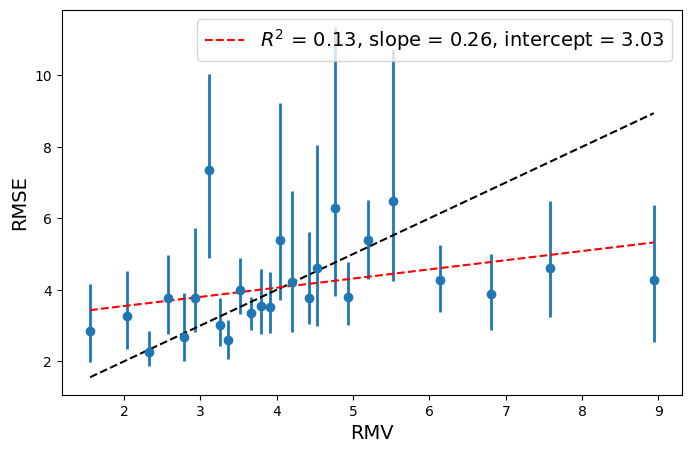

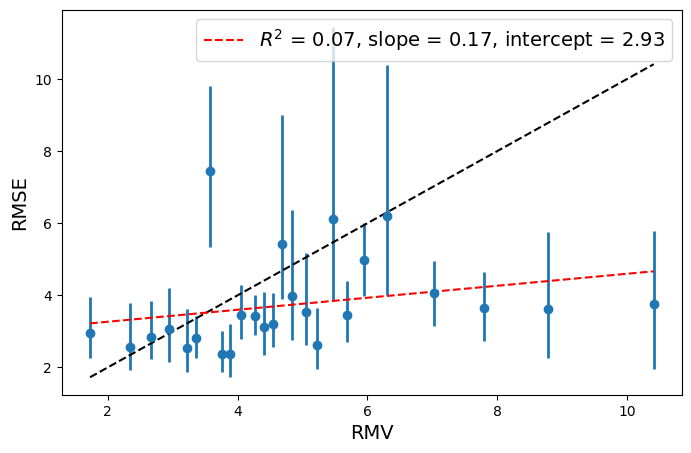

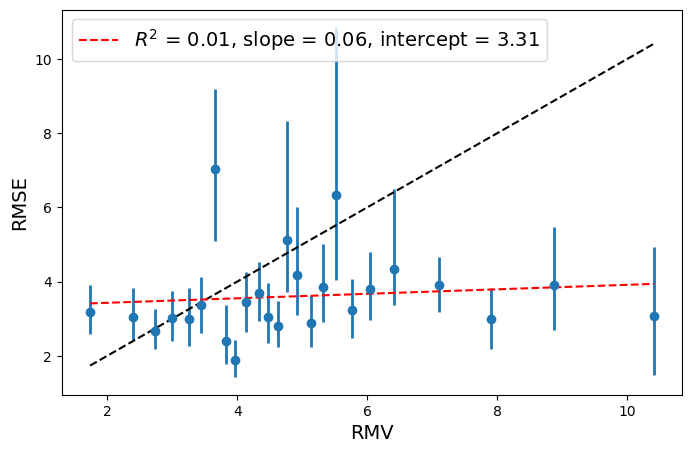

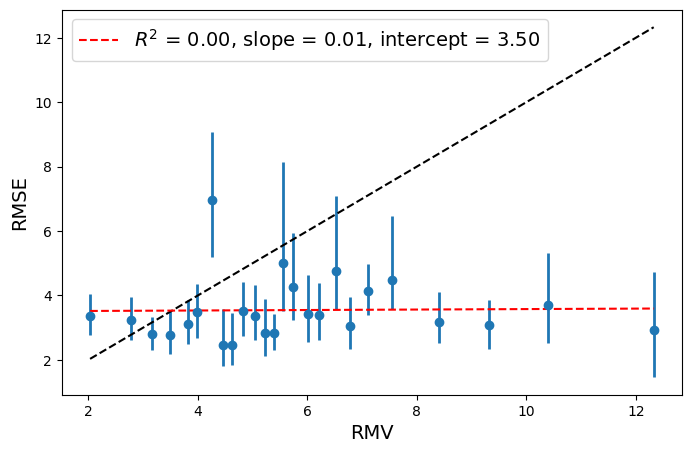

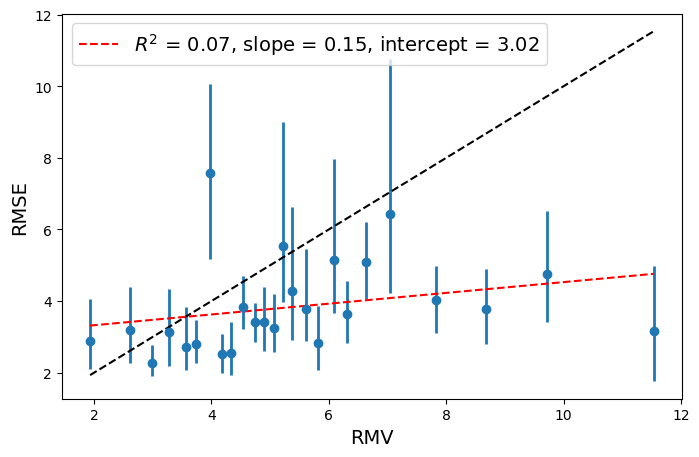

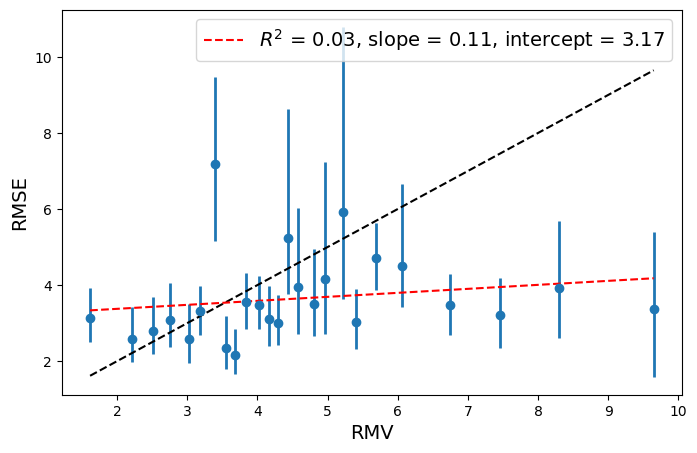

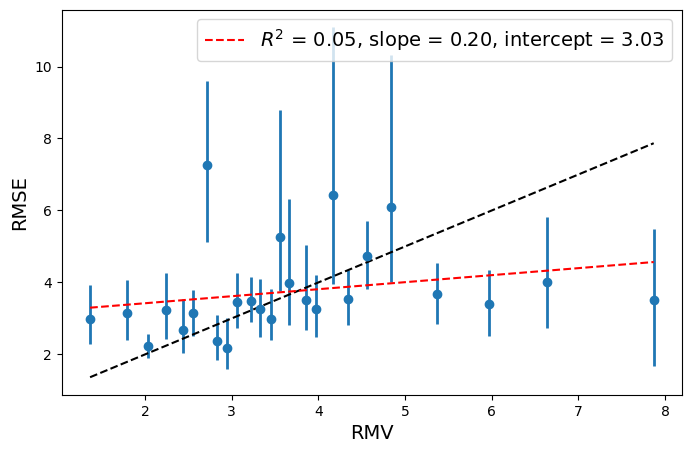

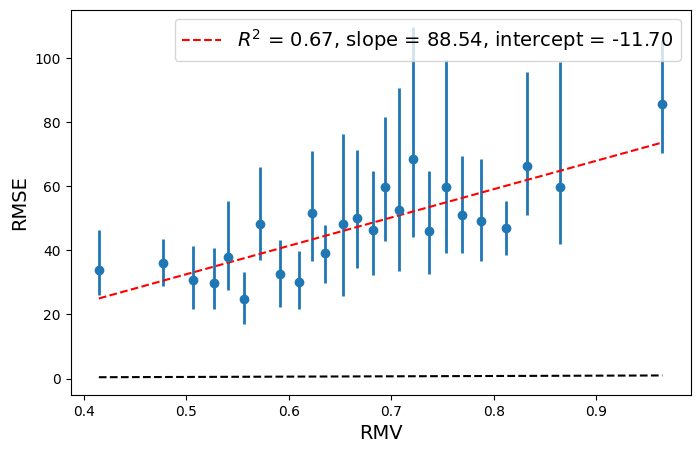

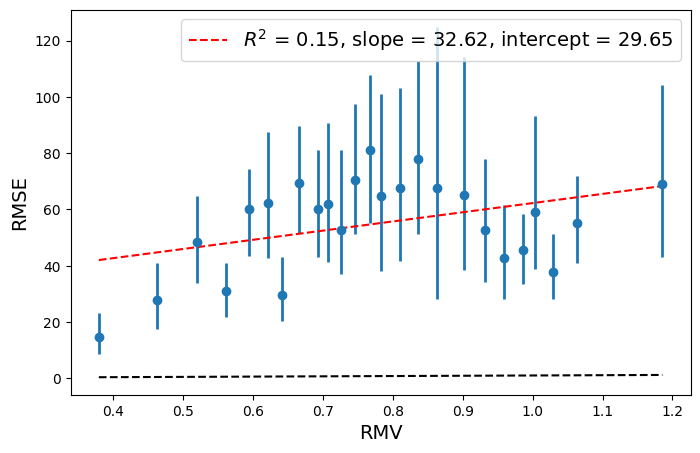

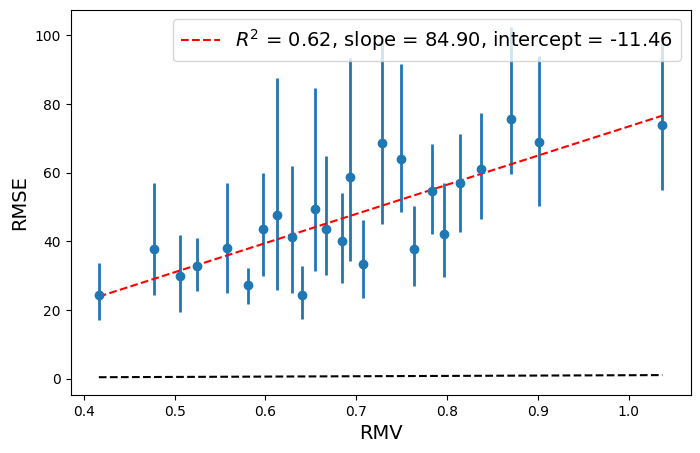

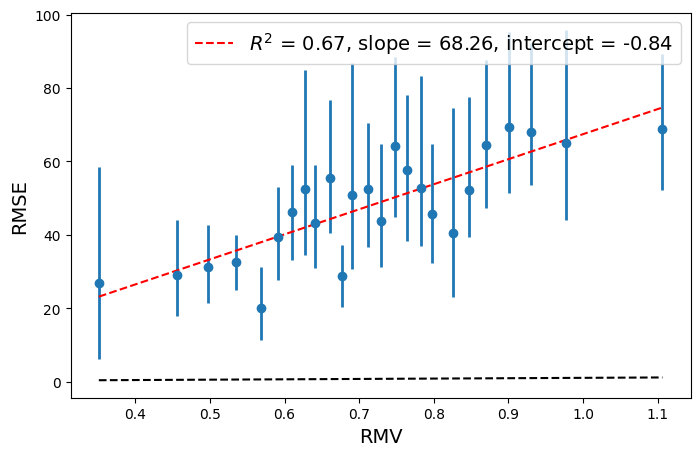

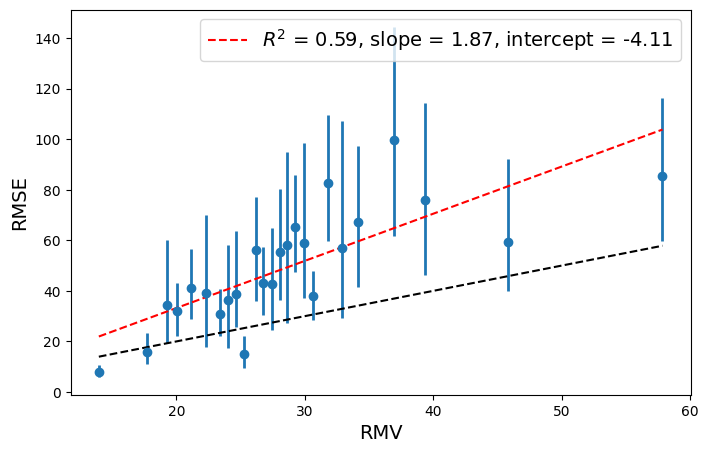

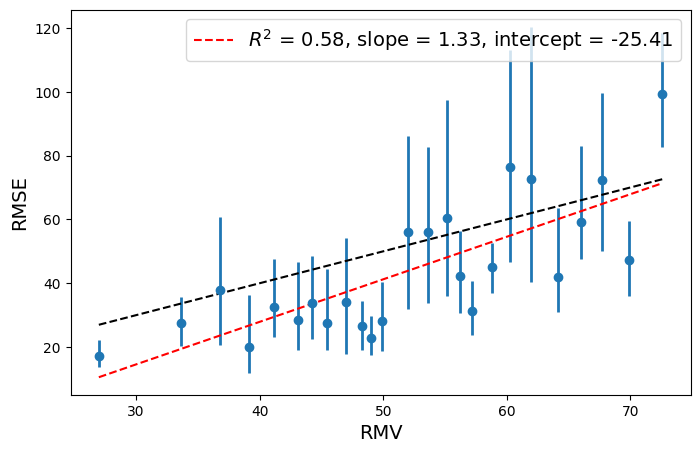

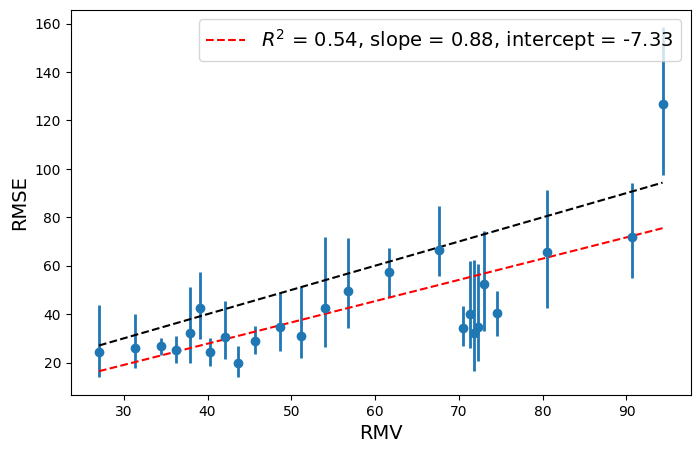

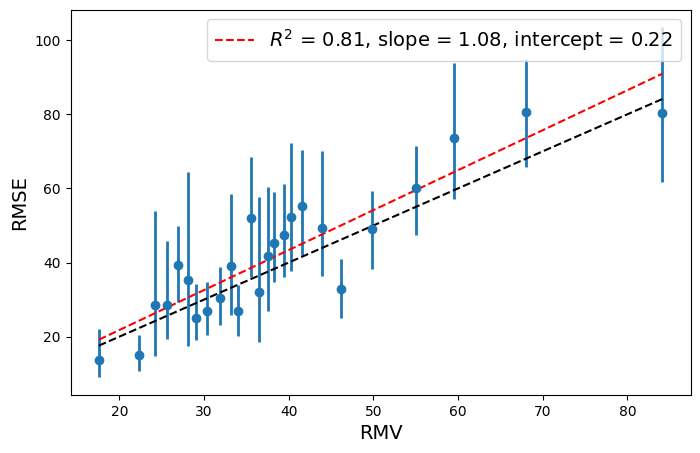

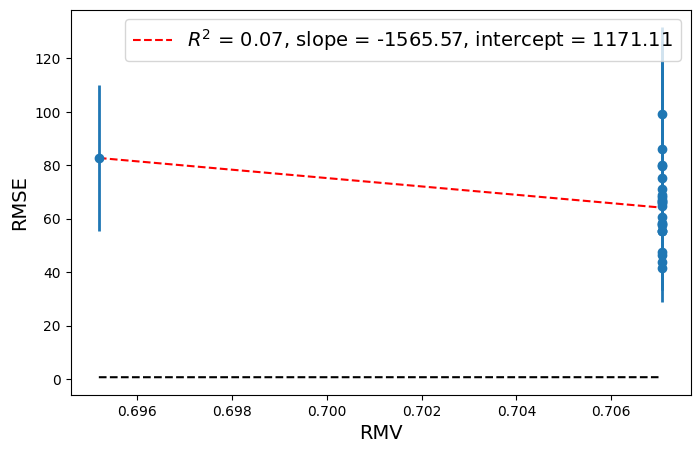

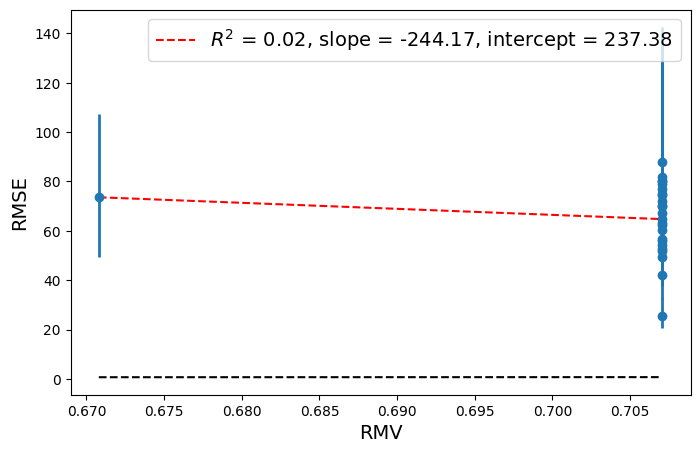

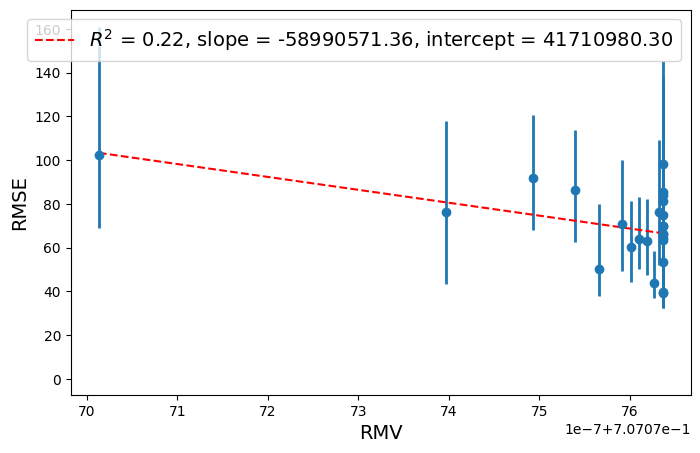

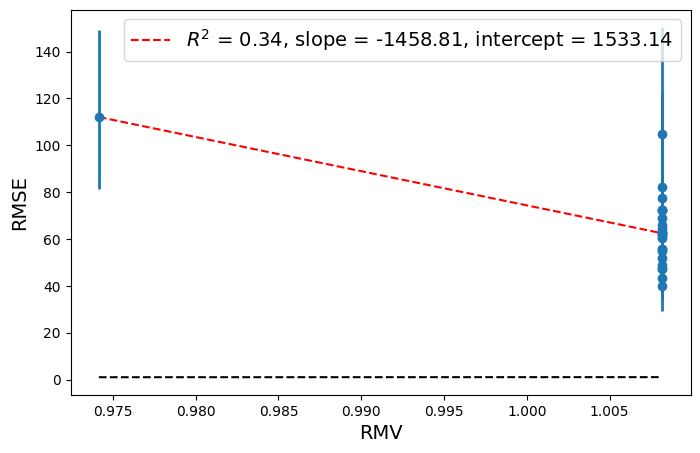

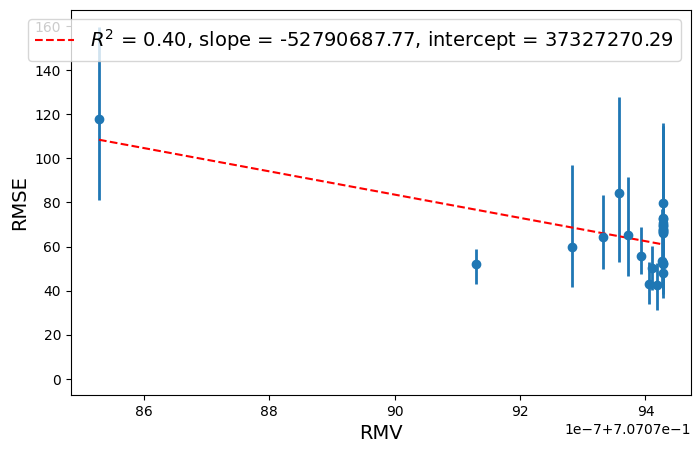

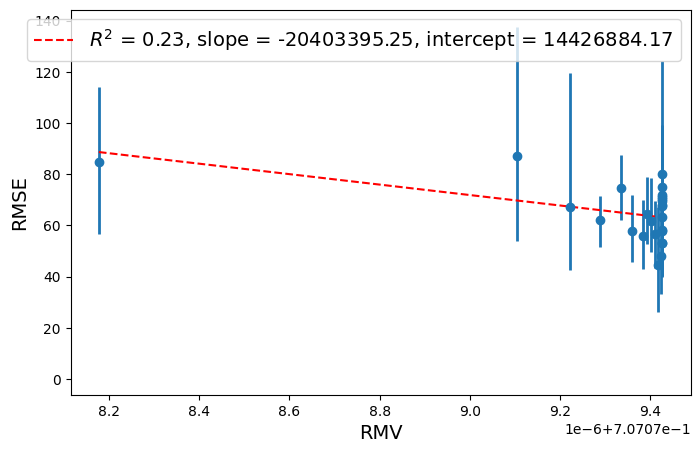

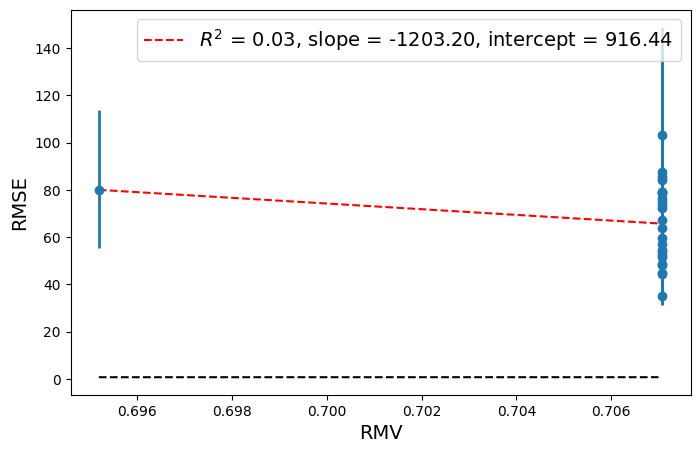

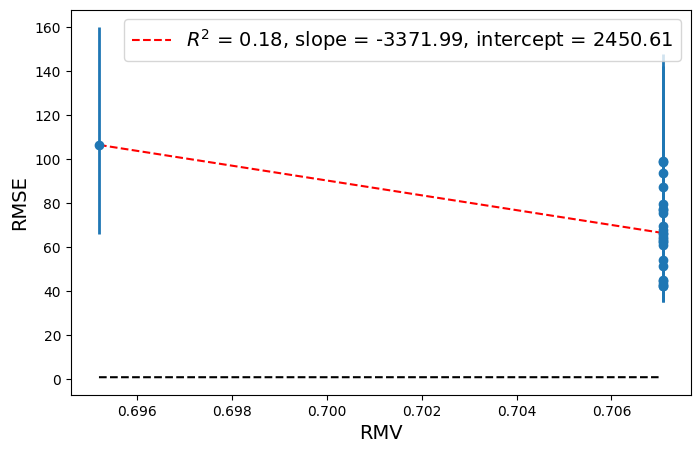

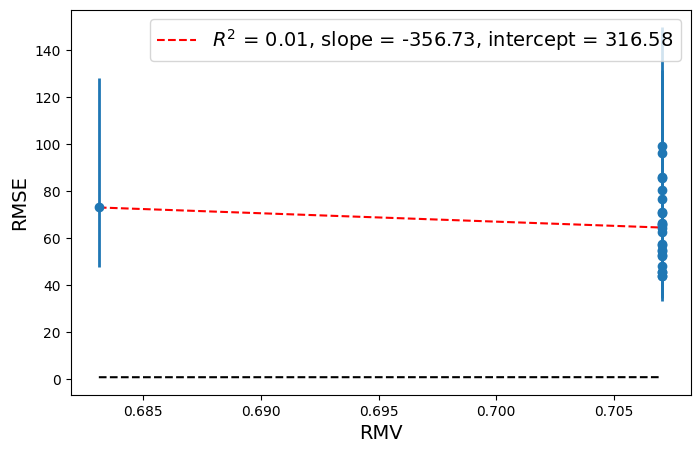

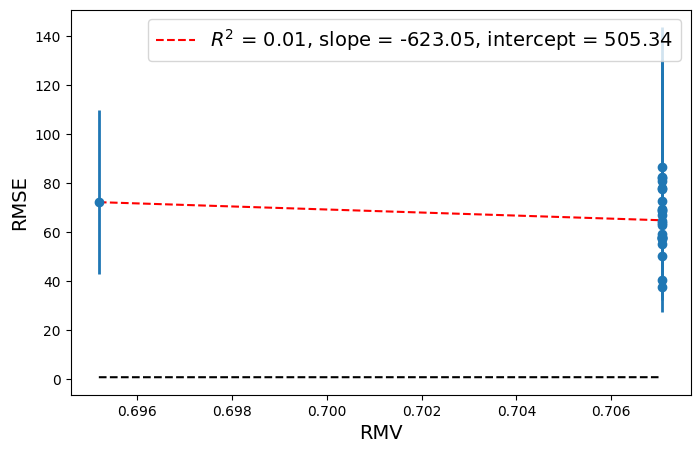

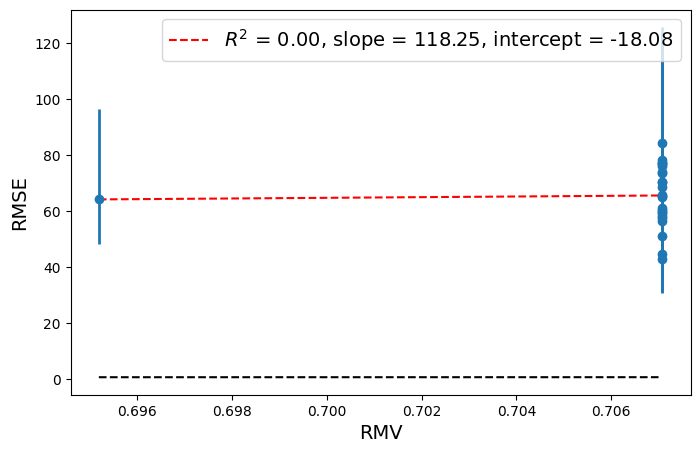

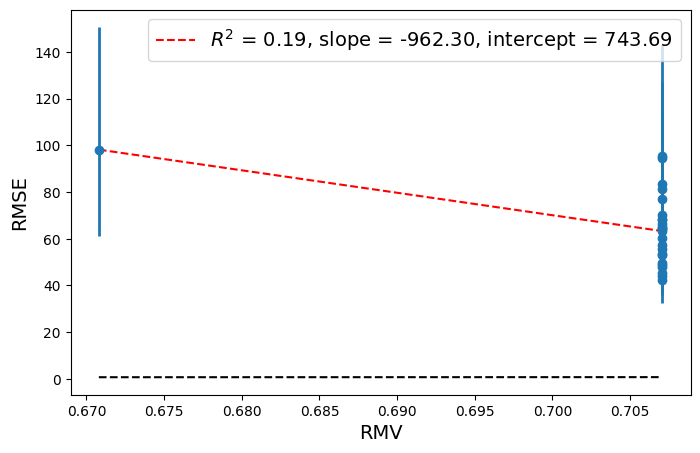

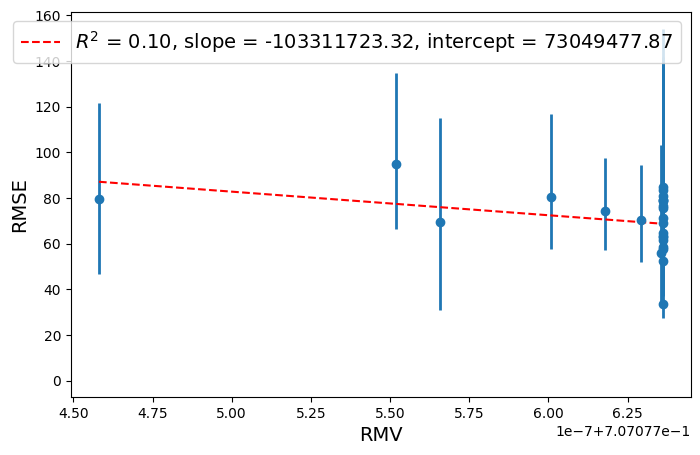

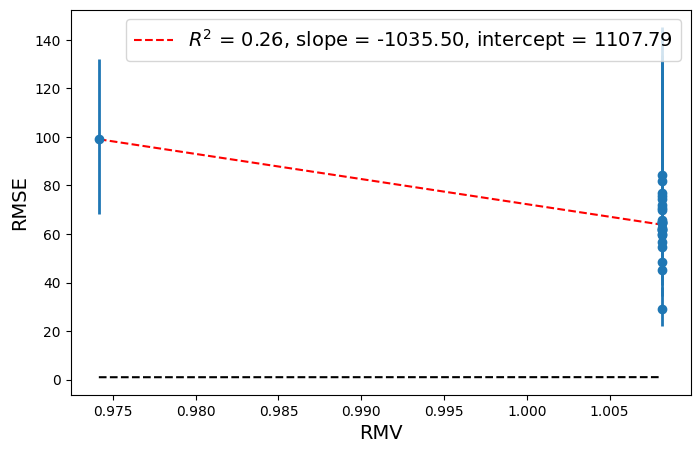

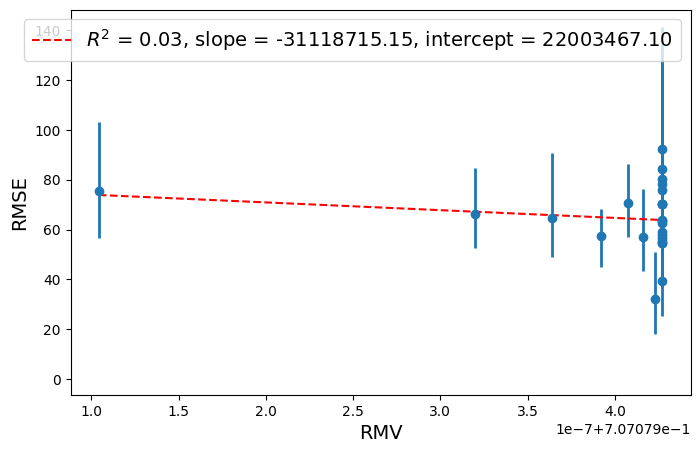

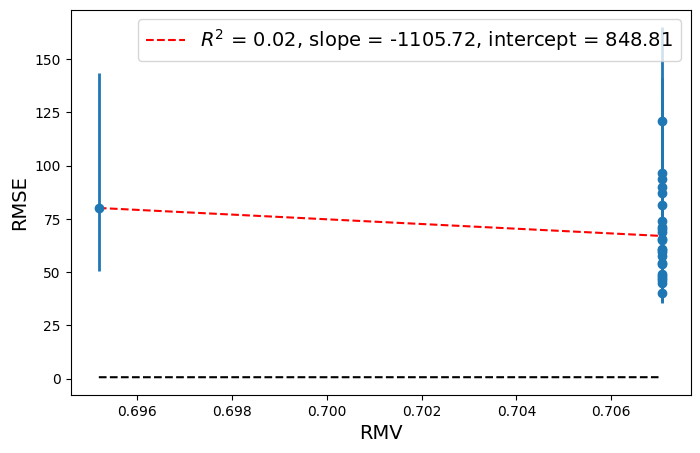

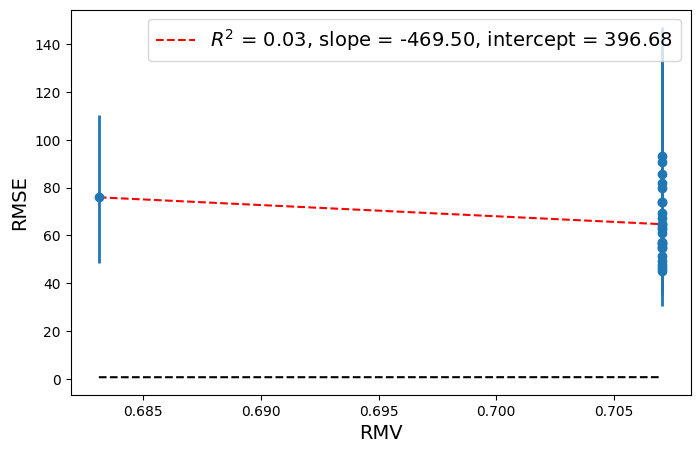

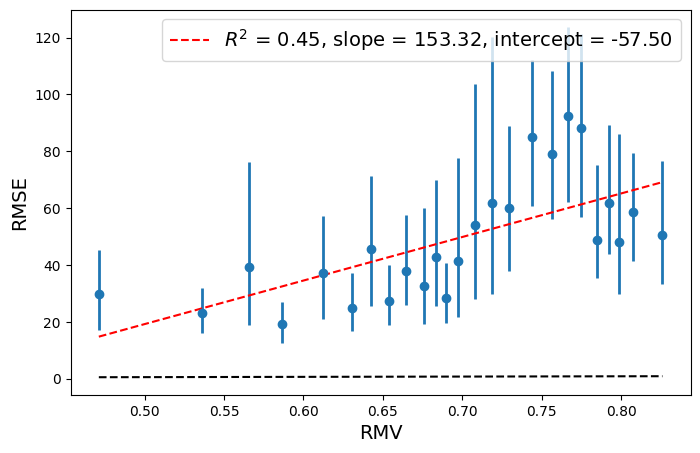

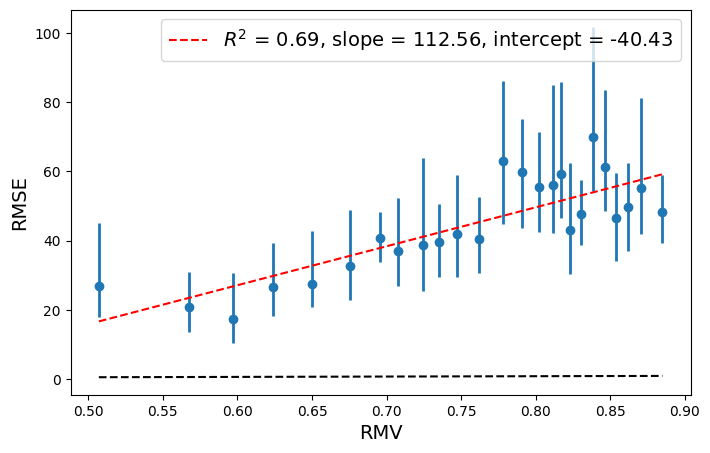

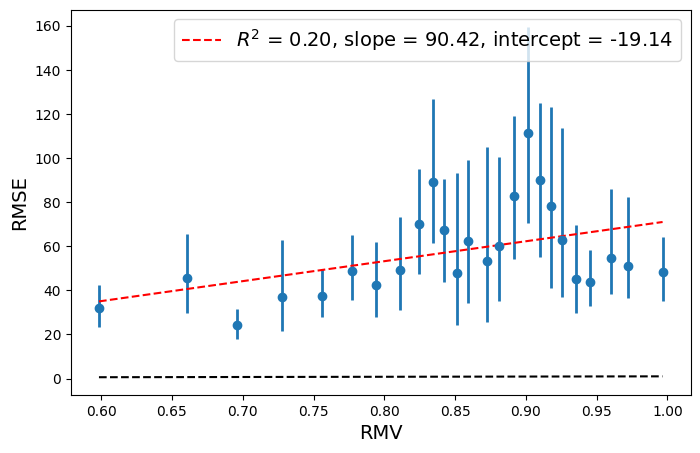

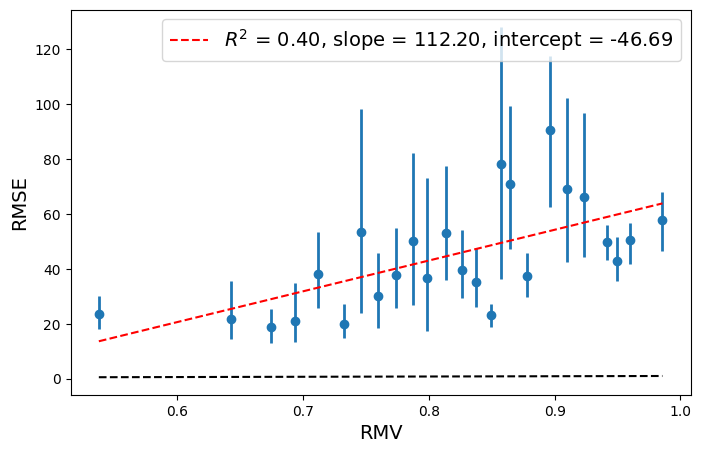

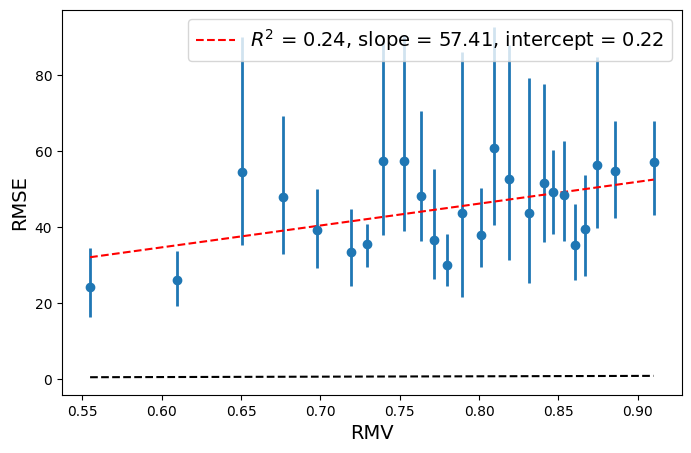

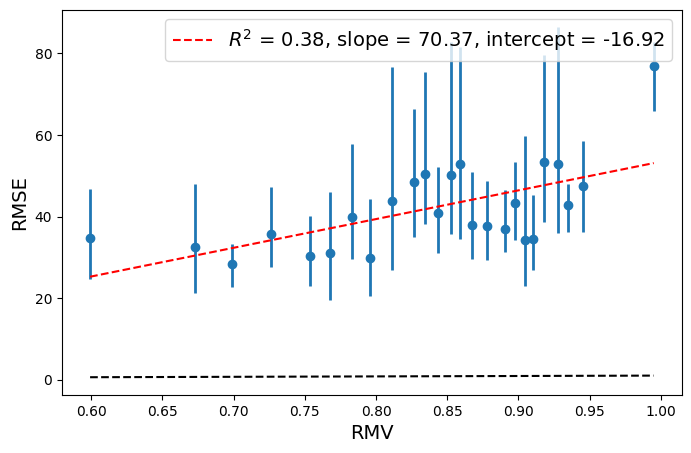

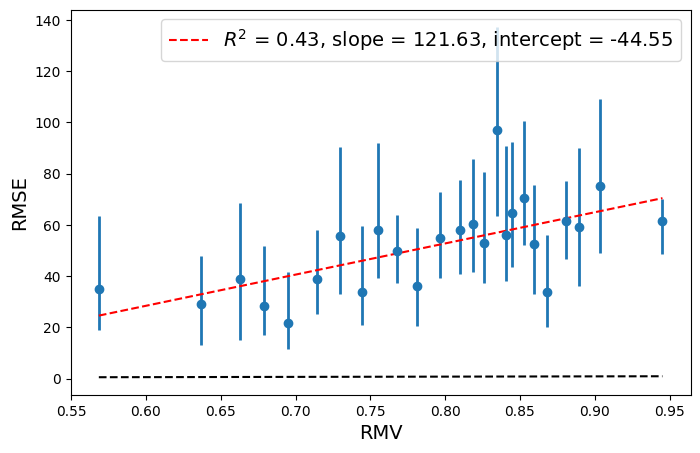

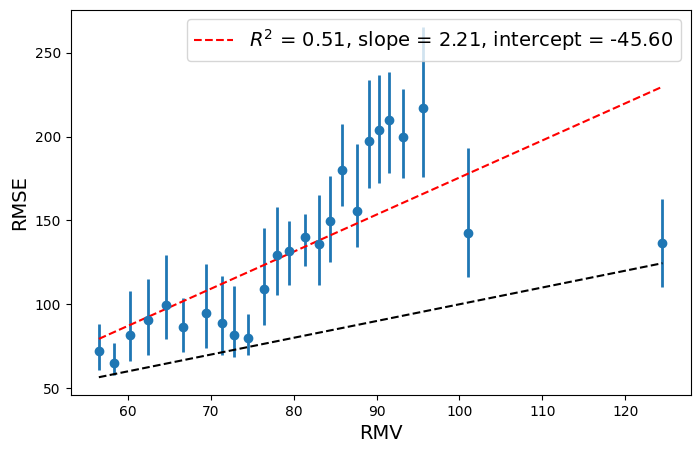

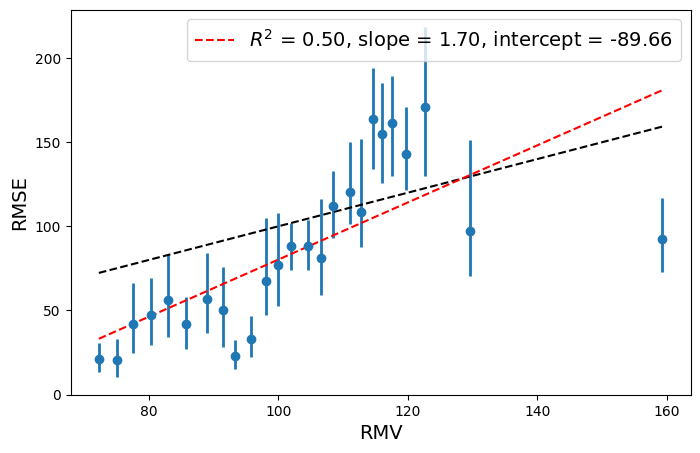

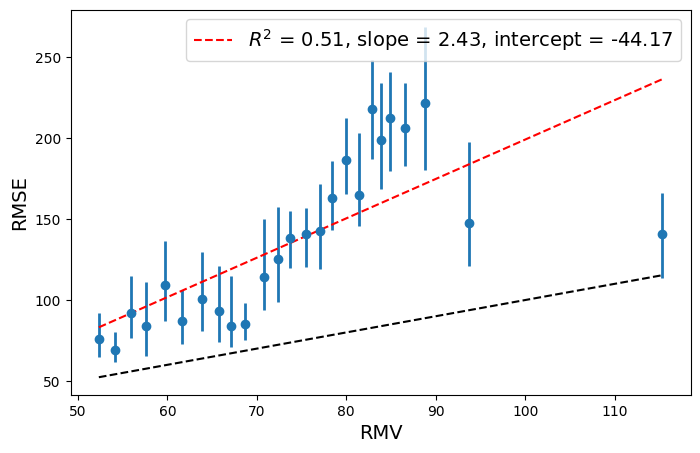

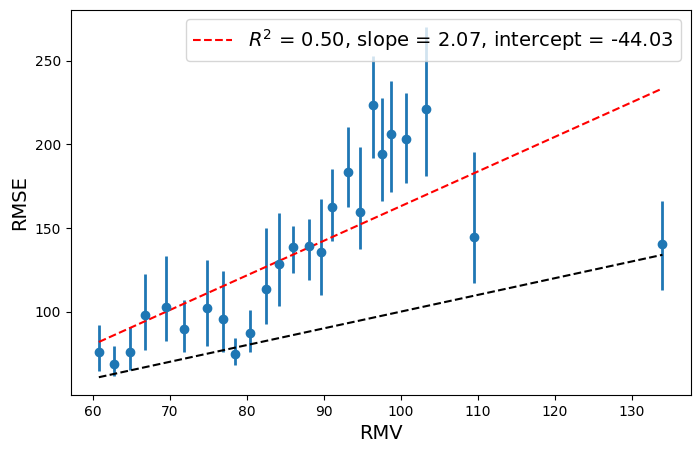

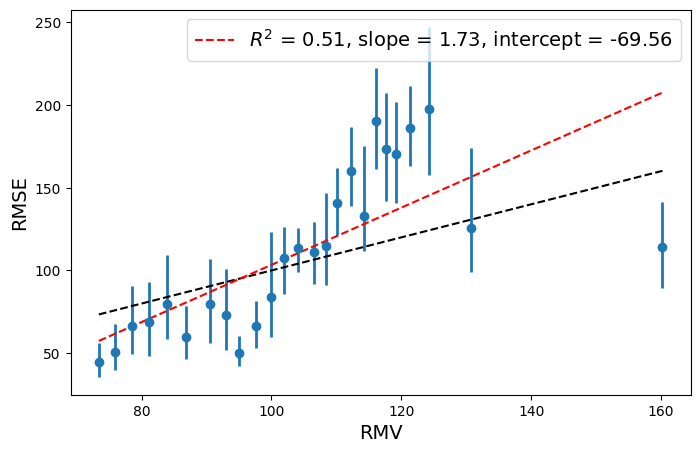

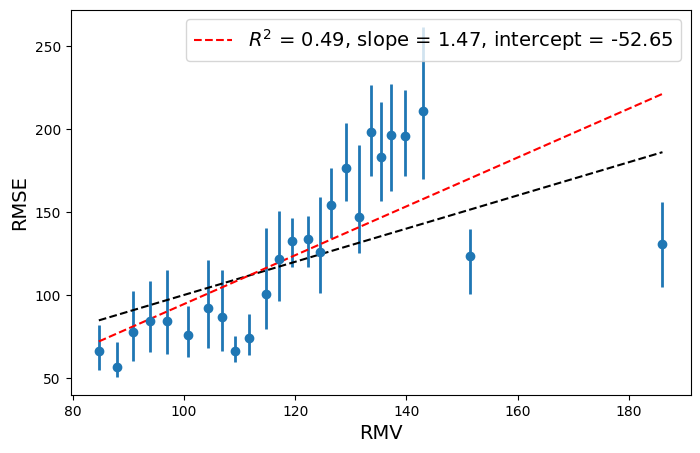

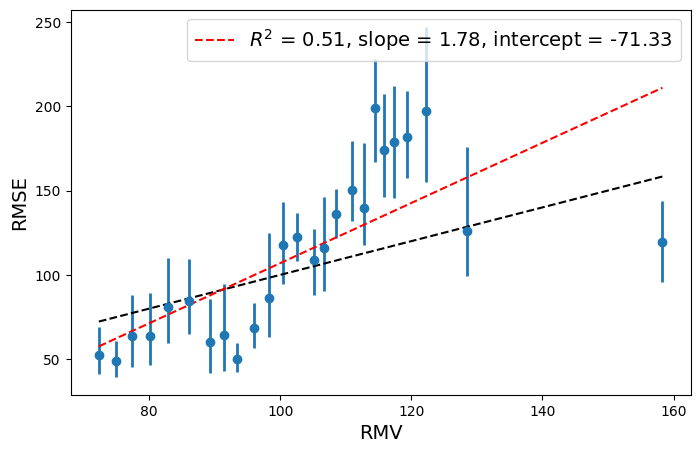

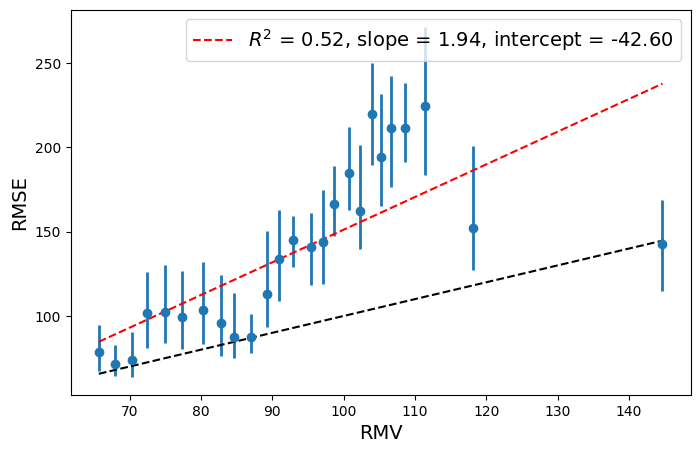

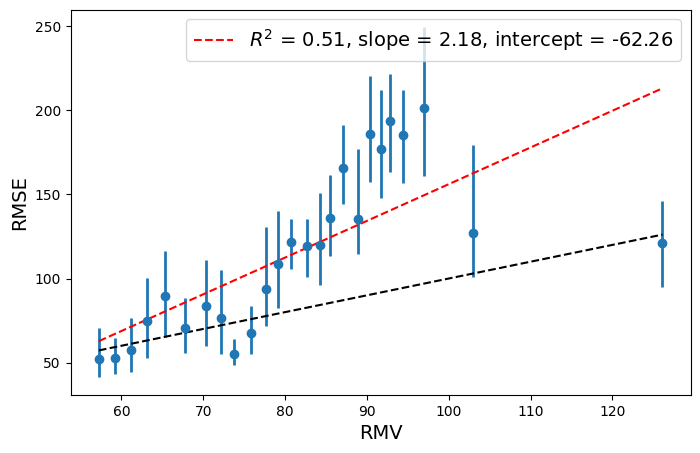

In [58]:
import pandas as pd
#['ESOL','FreeSolv','Photoswitch','Lipophilicity']
# 1) collect all runs into one DataFrame
records = []
for problem in ['Lipophilicity','ESOL','FreeSolv','Photoswitch',]:  # you can uncomment/add more problems here
    for method in ['BOS_Str','MolDAIS_SAAS', 'Mord_Mat','Mord_Mat_PCA','FP_TM','Graph_WL']:
        for run in range(10):
            df = pd.read_csv(f'predUQ/preds4UQ_{problem}_{method}_95_{run}.csv')
            print(f"Processing: {problem} | {method} | run {run}")
            R_sq, rho_rank, rho_rank_sim, mis_cal, _NLL, NLL_sim, slope, intercept = get_UQ(df)

            records.append({
                'problem':       problem,
                'method':        method,
                'run':           run,
                'R_sq':          R_sq,
                'rho_rank':      rho_rank,
                'mis_cal':       mis_cal,
                'NLL':           _NLL,
                'slope':         slope,
                'intercept':     intercept
            })

            print('\n\n')

all_metrics_df = pd.DataFrame(records)
all_metrics_df.to_csv('Calulated_UQ_metrics_95_.csv')



In [66]:
all_metrics_df = pd.read_csv('Calulated_UQ_metrics_95_.csv')


summary_dfs = {}
for problem, grp in all_metrics_df.groupby('problem'):
    summary = (
        grp
        .groupby('method')
        .agg(
            mean_R_sq=('R_sq', 'mean'),
            mean_mis_cal=('mis_cal', 'mean'),
            mean_nll=('NLL', 'mean'),
            mean_slope=('slope', 'mean'),
            mean_intercept=('intercept', 'mean'),
            mean_rho_rank=('rho_rank', 'mean'),
            std_R_sq=('R_sq', 'std'),
            std_mis_cal=('mis_cal', 'std'),
            std_nll=('NLL', 'std'),
        )
        .reset_index()
    )
    summary_dfs[problem] = summary

for problem_name in ['ESOL','FreeSolv','Photoswitch','Lipophilicity']:
  print(problem_name)
  print(summary_dfs[problem_name][['method', 'mean_R_sq','std_R_sq', 'mean_mis_cal','std_mis_cal']])
  print('\n\n')

#pd.DataFrame(summary_dfs).to_csv('Calulated_UQ_metrics_summary.csv')


import numpy as np
import pandas as pd

# define your problems and methods
problems = ['ESOL', 'FreeSolv', 'Photoswitch', 'Lipophilicity']
methods = ['MolDAIS_SAAS', 'Mord_Mat','Mord_Mat_PCA','BOS_Str','FP_TM','Graph_WL']

# prepare empty DataFrames
df_r2  = pd.DataFrame(index=methods, columns=problems, dtype=object)
df_mis = pd.DataFrame(index=methods, columns=problems, dtype=object)

for problem in problems:
    df = summary_dfs[problem].set_index('method')

    # extract arrays of (mean, std) for each method—in the order of `methods`
    r2_vals   = [tuple(df.loc[m, ['mean_R_sq','std_R_sq']].values)     for m in methods]
    mis_vals  = [tuple(df.loc[m, ['mean_mis_cal','std_mis_cal']].values) for m in methods]

    # find which method has the highest mean (for bolding)
    best_r2_idx  = int(np.argmax([m for m, _ in r2_vals]))
    best_mis_idx = int(np.argmin([m for m, _ in mis_vals]))

    # fill in the formatted strings
    for i, (mean_r2, std_r2) in enumerate(r2_vals):
        s = f"{mean_r2:.2f}$\\pm$ {std_r2:.2f}"
        if i == best_r2_idx:
            s = f"\\textbf{{{mean_r2:.2f}$\\pm$ {std_r2:.2f}}}"
        df_r2.at[methods[i], problem] = s

    for i, (mean_m, std_m) in enumerate(mis_vals):
        s = f"{mean_m:.2f}$\\pm$ {std_m:.2f}"
        if i == best_mis_idx:
            s = f"\\textbf{{{mean_m:.2f}$\\pm$ {std_m:.2f}}}"
        df_mis.at[methods[i], problem] = s

# now df_r2 and df_mis are exactly what you requested:
print("R² table:\n", df_r2.to_latex(), "\n")
print("Miscalibration‐area table:\n", df_mis.to_latex(index=False))


ESOL
         method  mean_R_sq  std_R_sq  mean_mis_cal  std_mis_cal
0       BOS_Str   0.478821  0.155887      0.191873     0.023065
1         FP_TM   0.366066  0.231875      0.174189     0.030261
2      Graph_WL   0.957267  0.007028      0.238788     0.058965
3  MolDAIS_SAAS   0.605635  0.202067      0.118993     0.048614
4      Mord_Mat   0.091165  0.087684      0.292427     0.004076
5  Mord_Mat_PCA   0.084905  0.074731      0.292399     0.004087



FreeSolv
         method  mean_R_sq  std_R_sq  mean_mis_cal  std_mis_cal
0       BOS_Str   0.488738  0.107117      0.359220     0.020706
1         FP_TM   0.305645  0.083264      0.291931     0.020918
2      Graph_WL   0.051308  0.047525      0.109422     0.138653
3  MolDAIS_SAAS   0.702688  0.250839      0.068323     0.035741
4      Mord_Mat   0.023595  0.031082      0.357389     0.004122
5  Mord_Mat_PCA   0.030219  0.024849      0.357389     0.004122



Photoswitch
         method  mean_R_sq  std_R_sq  mean_mis_cal  std_mis_cal
0       

In [63]:

MolDAIS_SAAS & 0.61$\pm$ 0.20 & \textbf{0.70$\pm$ 0.25} & \textbf{0.64$\pm$ 0.10} & 0.79$\pm$ 0.08 & \textbf{0.12$\pm$ 0.05} & \textbf{0.07$\pm$ 0.04} & \textbf{0.09$\pm$ 0.05} & 0.17$\pm$ 0.07 \\
Mord_Mat & 0.09$\pm$ 0.09 & 0.02$\pm$ 0.03 & 0.21$\pm$ 0.19 & 0.04$\pm$ 0.04 & 0.29$\pm$ 0.00 & 0.36$\pm$ 0.00 & 0.50$\pm$ 0.00 & 0.18$\pm$ 0.01 \\
Mord_Mat_PCA & 0.08$\pm$ 0.07 & 0.03$\pm$ 0.02 & 0.09$\pm$ 0.10 & 0.04$\pm$ 0.04 & 0.29$\pm$ 0.00 & 0.36$\pm$ 0.00 & 0.50$\pm$ 0.00 & 0.18$\pm$ 0.01 \\
BOS_Str & 0.48$\pm$ 0.16 & 0.49$\pm$ 0.11 & 0.57$\pm$ 0.17 & 0.67$\pm$ 0.10 & 0.19$\pm$ 0.02 & 0.36$\pm$ 0.02 & 0.49$\pm$ 0.01 & 0.14$\pm$ 0.03 \\
FP_TM & 0.37$\pm$ 0.23 & 0.31$\pm$ 0.08 & 0.43$\pm$ 0.15 & \textbf{0.85$\pm$ 0.05} & 0.17$\pm$ 0.03 & 0.29$\pm$ 0.02 & 0.49$\pm$ 0.01 & \textbf{0.05$\pm$ 0.01} \\
Graph_WL & \textbf{0.96$\pm$ 0.01} & 0.05$\pm$ 0.05 & 0.51$\pm$ 0.01 & 0.65$\pm$ 0.02 & 0.24$\pm$ 0.06 & 0.11$\pm$ 0.14 & 0.19$\pm$ 0.10 & 0.07$\pm$ 0.02 \\


'\\begin{tabular}{llll}\n\\toprule\nESOL & FreeSolv & Photoswitch & Lipophilicity \\\\\n\\midrule\n\\textbf{0.12$\\pm$ 0.05} & \\textbf{0.07$\\pm$ 0.04} & \\textbf{0.09$\\pm$ 0.05} & 0.17$\\pm$ 0.07 \\\\\n0.17$\\pm$ 0.03 & 0.29$\\pm$ 0.02 & 0.49$\\pm$ 0.01 & \\textbf{0.05$\\pm$ 0.01} \\\\\n0.29$\\pm$ 0.00 & 0.36$\\pm$ 0.00 & 0.50$\\pm$ 0.00 & 0.18$\\pm$ 0.01 \\\\\n0.24$\\pm$ 0.06 & 0.11$\\pm$ 0.14 & 0.19$\\pm$ 0.10 & 0.07$\\pm$ 0.02 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [40]:
for problem, grp in all_metrics_df.groupby('problem'):
  print(problem, grp)

ESOL    problem        method  run      R_sq  rho_rank   mis_cal       NLL  \
0     ESOL  MolDAIS_SAAS    0  0.446286  0.339638  0.093448  1.514728   
1     ESOL  MolDAIS_SAAS    1  0.389133  0.392296  0.080045  1.312721   
2     ESOL  MolDAIS_SAAS    2  0.757252  0.287294  0.063877  1.336723   
3     ESOL  MolDAIS_SAAS    3  0.187636  0.151755  0.156516  2.056584   
4     ESOL  MolDAIS_SAAS    4  0.757077  0.380842  0.156667  1.664302   
5     ESOL  MolDAIS_SAAS    5  0.429976  0.207535  0.185867  1.921855   
6     ESOL  MolDAIS_SAAS    6  0.902550  0.351505  0.161452  1.716448   
7     ESOL  MolDAIS_SAAS    7  0.554456  0.357737  0.097821  1.489123   
8     ESOL  MolDAIS_SAAS    8  0.427135  0.282745  0.174954  1.962246   
9     ESOL  MolDAIS_SAAS    9  0.784877  0.288264  0.151814  1.925517   
10    ESOL         FP_TM    0  0.225299  0.146620  0.200581  2.784723   
11    ESOL         FP_TM    1  0.470511  0.156621  0.185227  9.203018   
12    ESOL         FP_TM    2  0.663858  0.218

problem        method  run      R_sq  rho_rank   mis_cal       NLL  \
0             ESOL  MolDAIS_SAAS    0  0.446286  0.339638  0.093448  1.514728   
1             ESOL  MolDAIS_SAAS    1  0.389133  0.392296  0.080045  1.312721   
2             ESOL  MolDAIS_SAAS    2  0.757252  0.287294  0.063877  1.336723   
3             ESOL  MolDAIS_SAAS    3  0.187636  0.151755  0.156516  2.056584   
4             ESOL  MolDAIS_SAAS    4  0.757077  0.380842  0.156667  1.664302   
40        FreeSolv  MolDAIS_SAAS    0  0.794749  0.411506  0.025328  1.897707   
41        FreeSolv  MolDAIS_SAAS    1  0.834391  0.555829  0.118940  2.560664   
42        FreeSolv  MolDAIS_SAAS    2  0.801224  0.455299  0.029417  1.832124   
43        FreeSolv  MolDAIS_SAAS    3  0.660418  0.475633  0.024708  1.895164   
44        FreeSolv  MolDAIS_SAAS    4  0.885644  0.264949  0.092413  2.251659   
80     Photoswitch  MolDAIS_SAAS    0  0.491638  0.251653  0.059803  5.617002   
81     Photoswitch  MolDAIS_SAAS    1  0.580547  0.363389  0.115051  5.117746   
82     Photoswitch  MolDAIS_SAAS    2  0.708541  0.448164  0.044852  5.051390   
83     Photoswitch  MolDAIS_SAAS    3  0.424814  0.297014  0.122235  6.581243   
84     Photoswitch  MolDAIS_SAAS    4  0.520101  0.281320  0.020508  5.141529   
120  Lipophilicity  MolDAIS_SAAS    0  0.733244  0.144035  0.290125  4.510975   
121  Lipophilicity  MolDAIS_SAAS    1  0.879069  0.205433  0.193163  1.875281   
122  Lipophilicity  MolDAIS_SAAS    2  0.789058  0.200225  0.162711  1.675658   
123  Lipophilicity  MolDAIS_SAAS    3  0.682839  0.142144  0.178738  1.962993   
124  Lipophilicity  MolDAIS_SAAS    4  0.724701  0.095434  0.268207  3.414287   

        slope  intercept  
0    0.383899   0.568113  
1    0.363655   0.549098  
2    0.298419   0.527553  
3    0.257954   0.700405  
4    0.914739   0.359594  
40   0.723351   0.474842  
41   0.692224   0.983567  
42   0.638326   0.449806  
43   0.475692   0.891983  
44   1.044690   0.514575  
80   0.866713  19.703222  
81   0.521614   7.809199  
82   1.221003 -15.068760  
83   1.567492  13.410814  
84   1.123427  -1.324098  
120  0.927962   0.573201  
121  1.027856   0.359404  
122  0.891806   0.379328  
123  0.697420   0.523634  
124  0.766656   0.584963

# Explanation for equalt distributions in both models  'Mord_Mat','Mord_Mat_PCA',

<ipython-input-68-886a5791b280>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


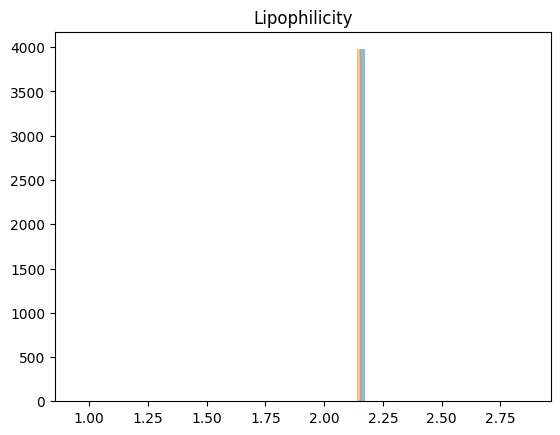

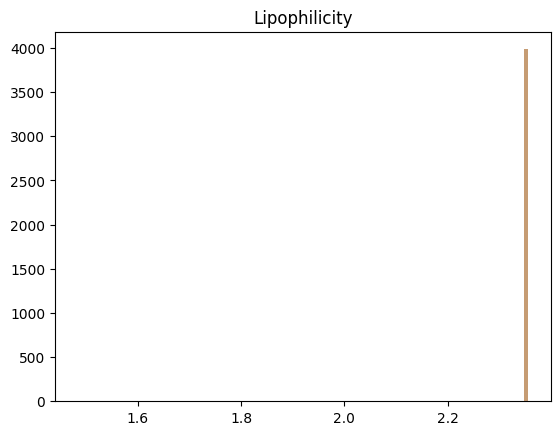

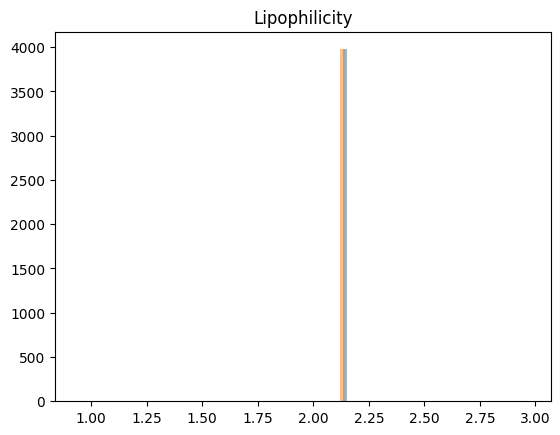

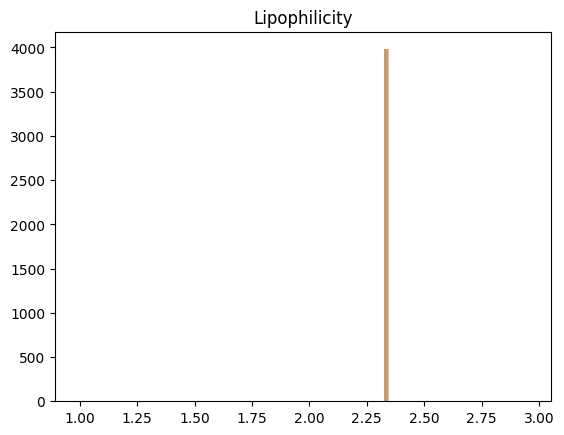

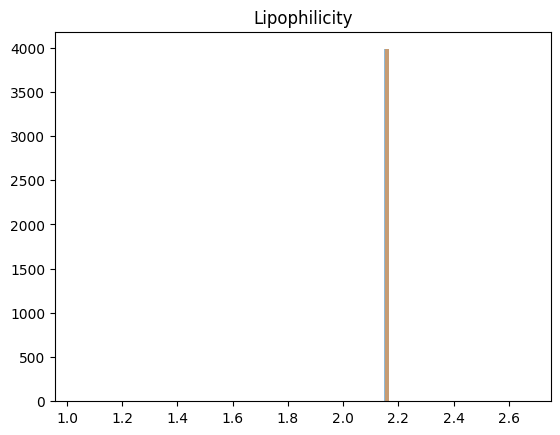

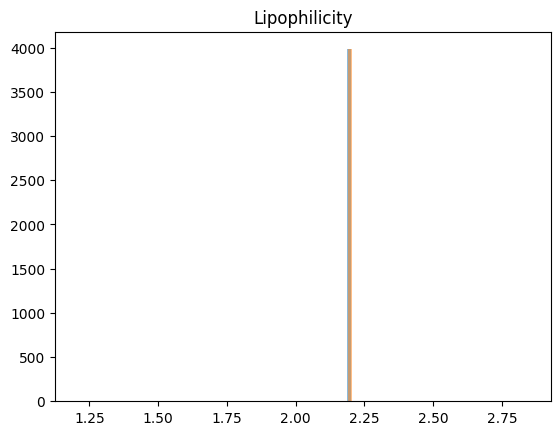

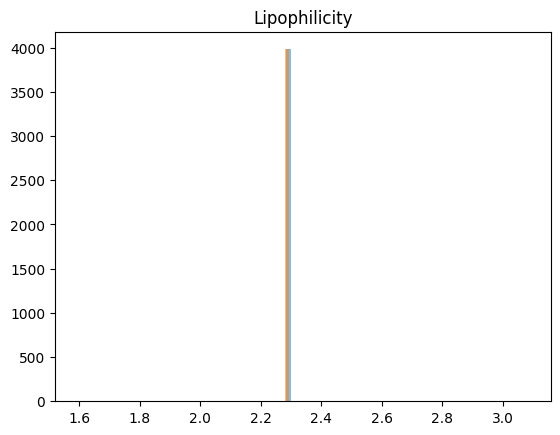

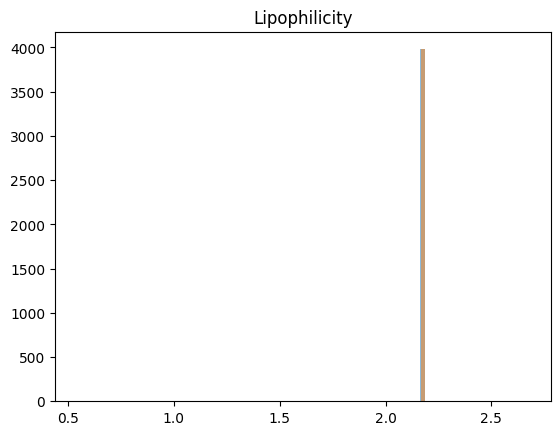

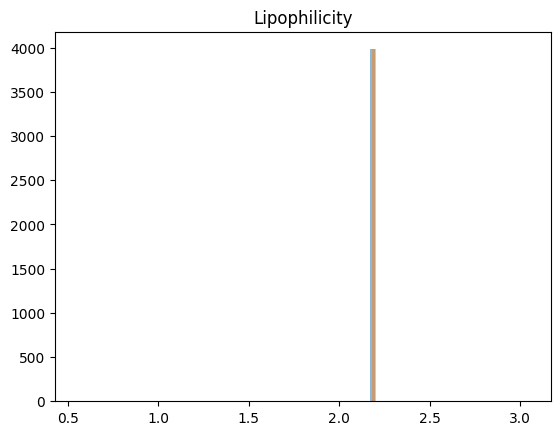

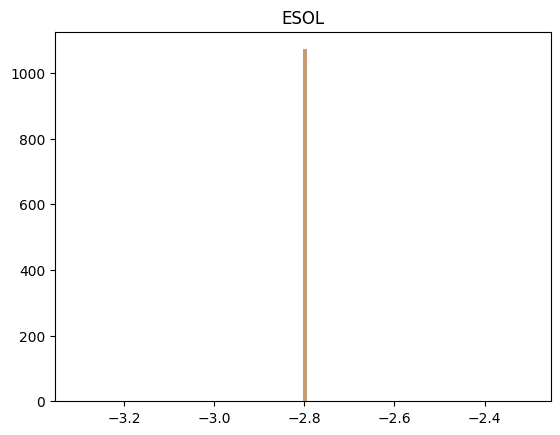

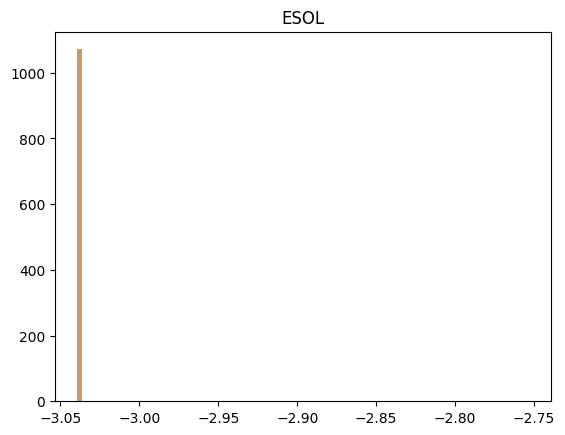

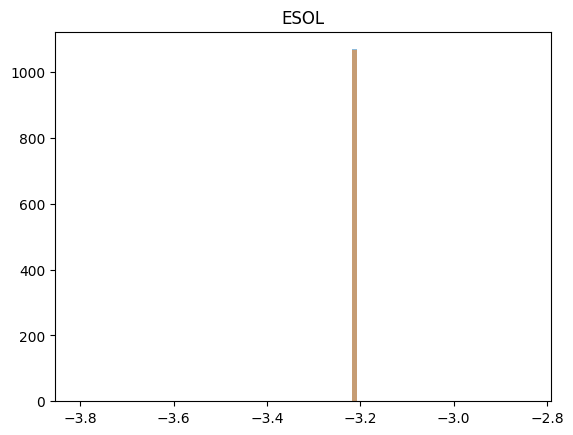

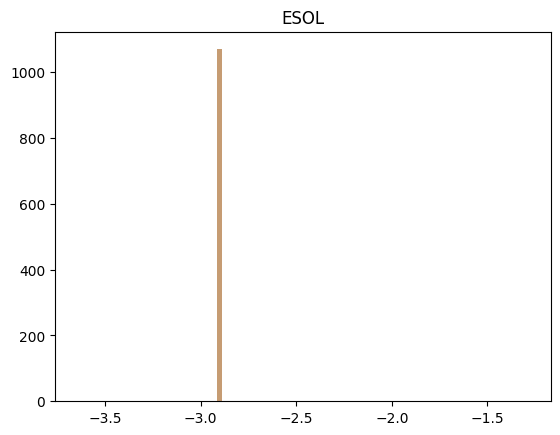

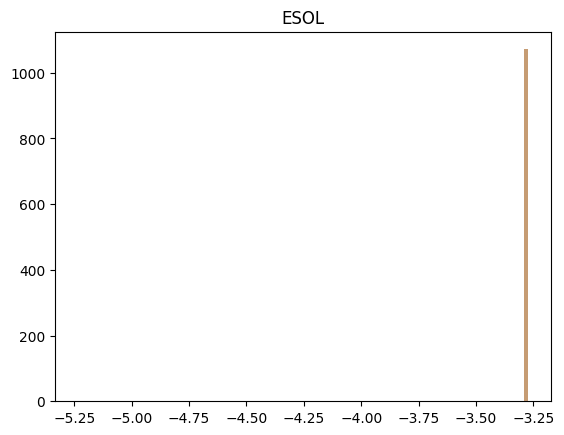

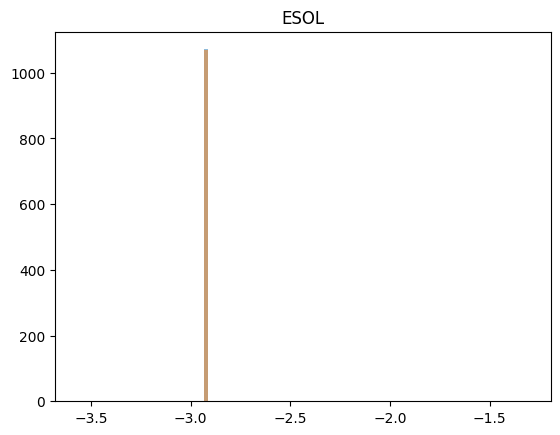

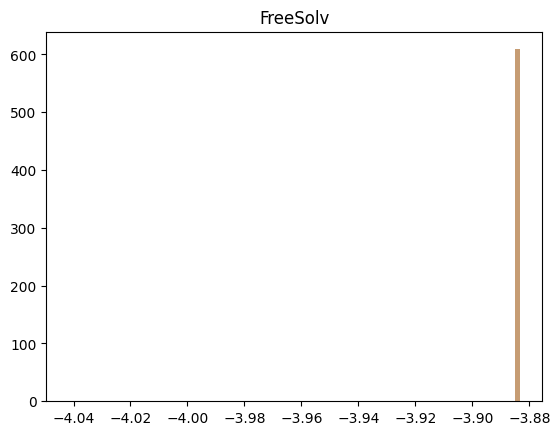

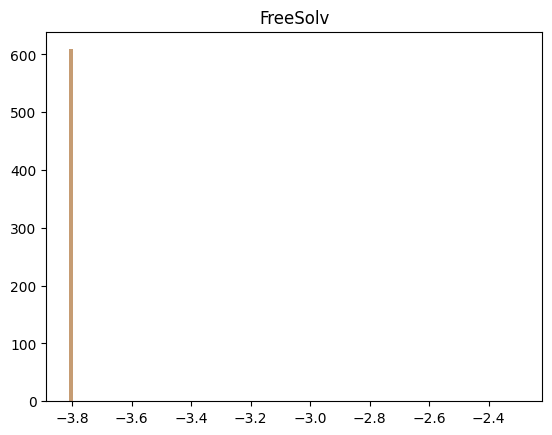

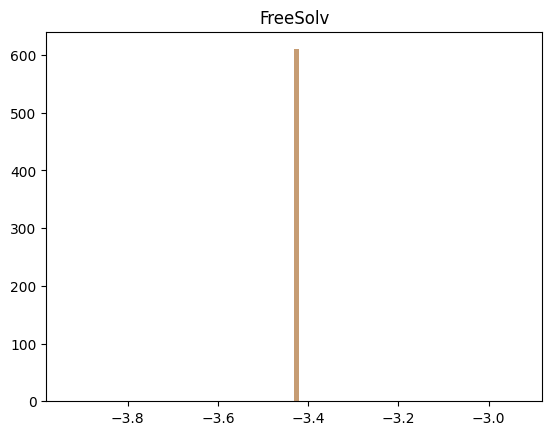

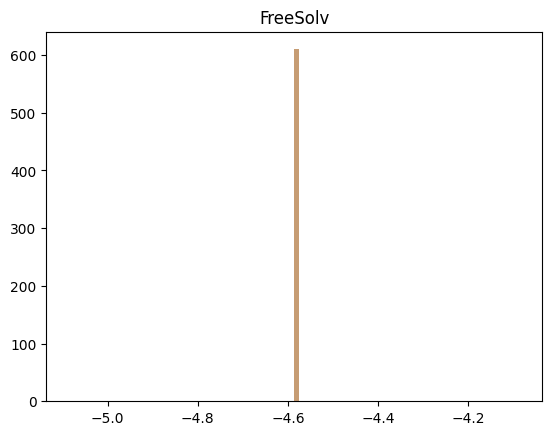

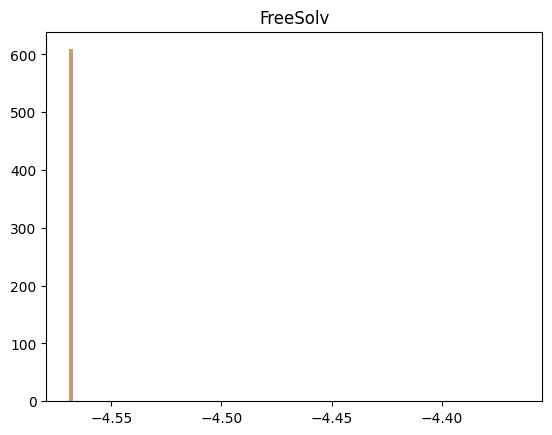

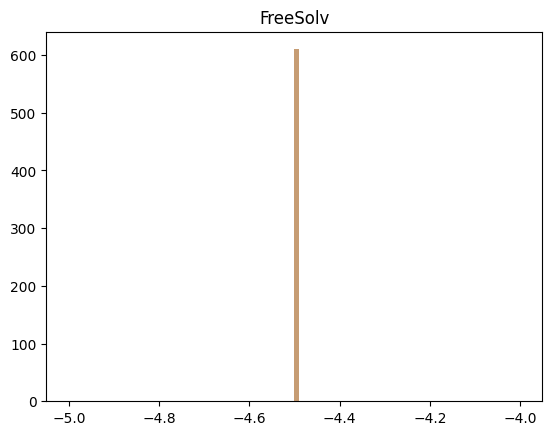

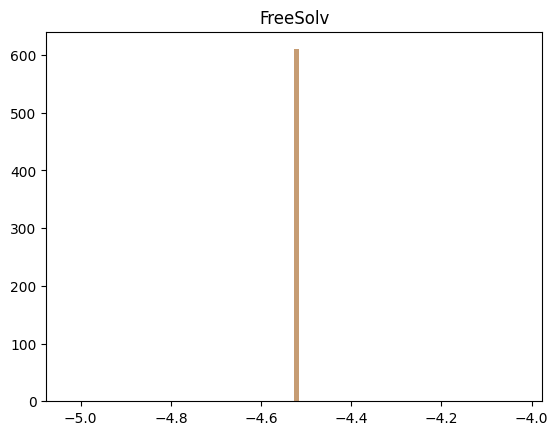

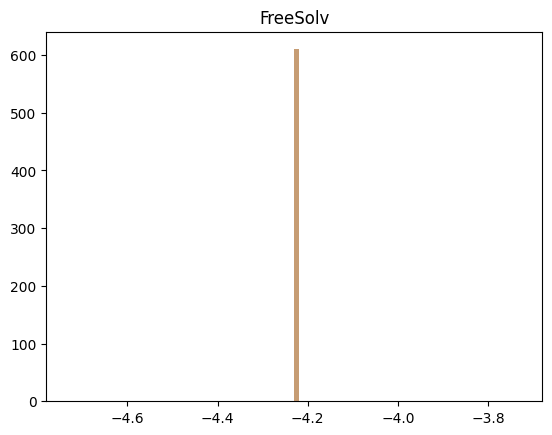

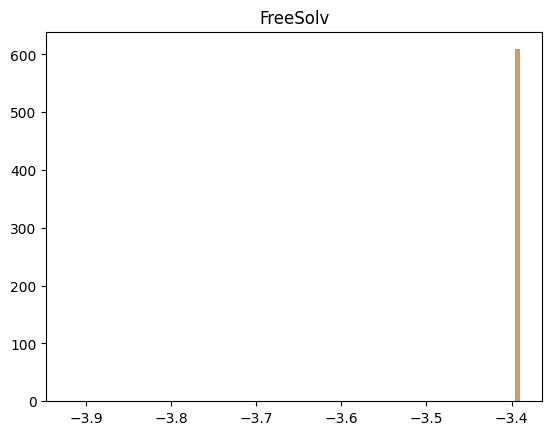

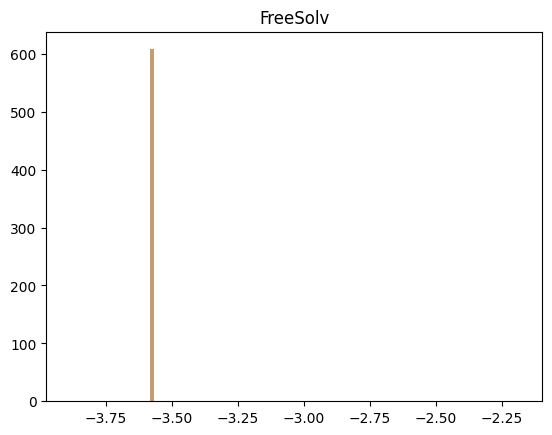

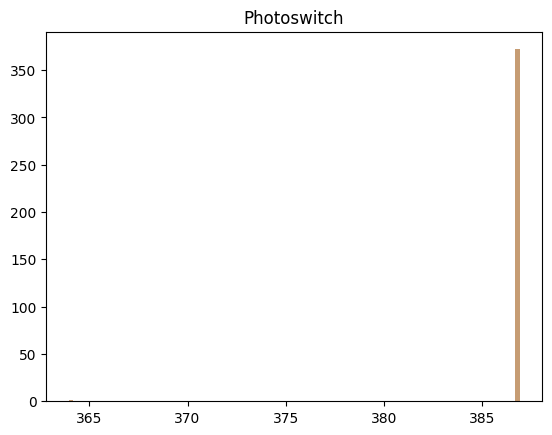

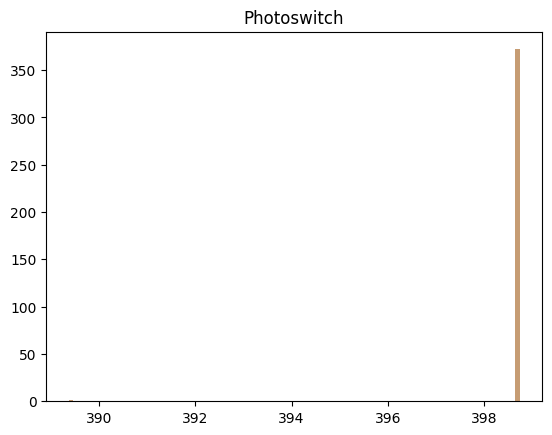

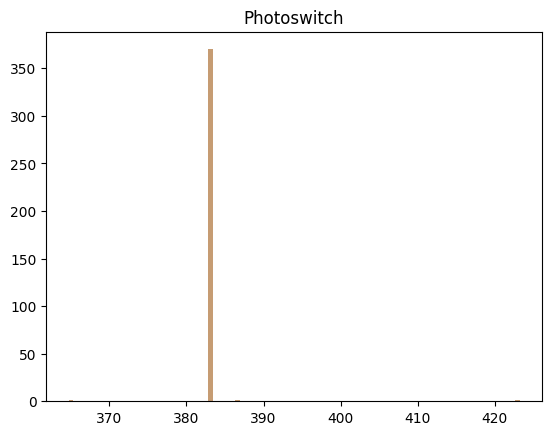

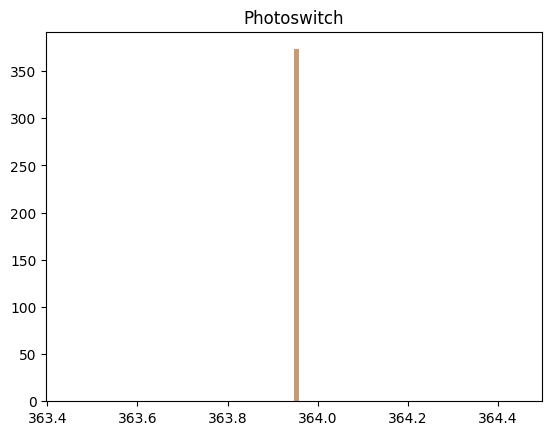

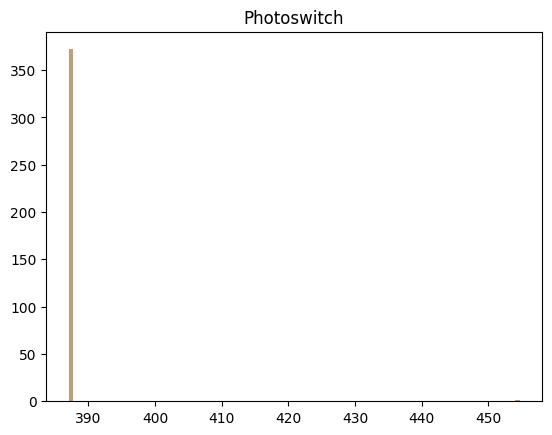

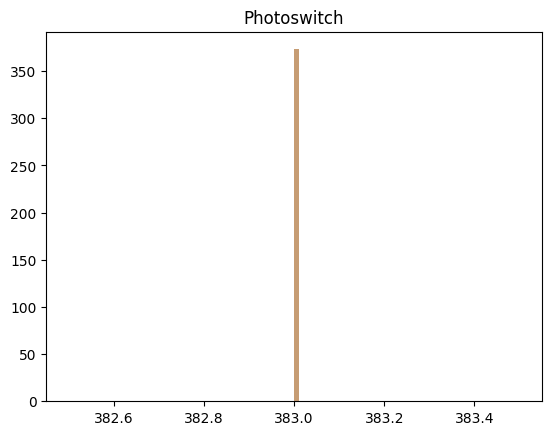

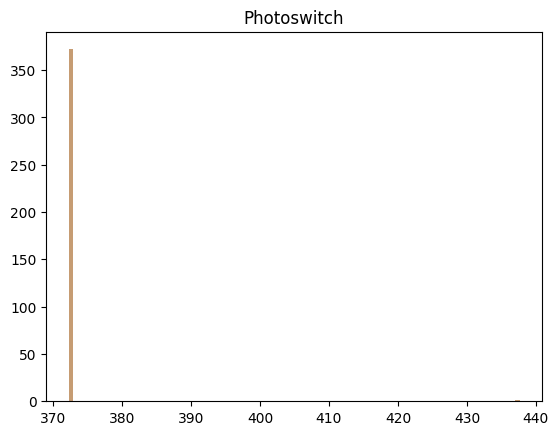

In [68]:



import pandas as pd
#['ESOL','FreeSolv','Photoswitch','Lipophilicity']
# 1) collect all runs into one DataFrame
records = []
for problem in ['Lipophilicity','ESOL','FreeSolv','Photoswitch',]:  # you can uncomment/add more problems here
    #for method in [ 'Mord_Mat','Mord_Mat_PCA',]:
        for run in range(10):
            y1 = pd.read_csv(f'predUQ/preds4UQ_{problem}_Mord_Mat_95_{run}.csv')['predicted']
            y2 = pd.read_csv(f'predUQ/preds4UQ_{problem}_Mord_Mat_PCA_95_{run}.csv')['predicted']

            plt.figure()
            plt.title(problem)
            plt.hist(y1, alpha=.5, label = 'Mord_Mat_PCA', bins = 100)
            plt.hist(y2, alpha=.5, label = 'Mord_Mat_PCA', bins = 100)
